In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import seaborn as sns
from scipy import stats
import math
from scipy.optimize import minimize, LinearConstraint
import matplotlib.ticker as mtick
import scipy.optimize
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from scipy.stats import beta

## Constructing Figures for uncertainty quantification project and Laurie's project

Histograms for each event's beta distribution draws

In [11]:
df = pd.read_csv("gfailruns_allevents_forAlex_v2.4.csv") # Import CSV of Name, TLSE, Building level, Transportation Level, Utilities Level
df = df.dropna(subset=['Buildings_Cost']) # Drop rows where DS is No Value for Buildings (should be same rows for Transportation and Utilities)
df.drop(df[df['American?'] == 0].index, inplace=True) # Dropping non-American events
df.drop(df[df['PH_LQ'] == 0].index, inplace=True) # Dropping non-LSE events
df.drop(df[df['PH_LQ'] == np.float('inf')].index, inplace=True) # Dropping allegedly infinite 2004 Pakistan event

#df7 = pd.DataFrame() # Establishing empty dataframe for each event's Htot / PopExp draws

for ii in range(0,len(df)):
    a = df.iloc[ii,9] # Htot Beta distribution shape parameter a, column name PH_LQ
    b = df.iloc[ii,10] # Htot Beta distribution shape parameter b, column name QH_LQ
    r = beta.rvs(a, b, size=1000) # Random selection of 1000 values from the beta distribution using parameters, a and b
                                    # This sampling is instantaneous for all 46 events
    r=r*df.iloc[ii,22] # Multiplying each selection by HlimLQ to get actual draw which we will work with

    df7 = df7.append(pd.DataFrame(r).T) # Appending row of Htot / PopExp draws to previously empty DataFrame
    

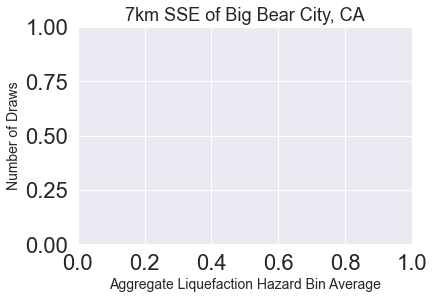

In [22]:
df = pd.read_csv("gfailruns_allevents_forAlex_v2.4.csv") # Import CSV of Name, TLSE, Building level, Transportation Level, Utilities Level
df = df.dropna(subset=['Buildings_Cost']) # Drop rows where DS is No Value for Buildings (should be same rows for Transportation and Utilities)
df.drop(df[df['American?'] == 0].index, inplace=True) # Dropping non-American events
df.drop(df[df['PH_LQ'] == 0].index, inplace=True) # Dropping non-LSE events
df.drop(df[df['PH_LQ'] == np.float('inf')].index, inplace=True) # Dropping allegedly infinite 2004 Pakistan event

df7 = pd.DataFrame() # Establishing empty dataframe for each event's Htot / PopExp draws

for ii in range(0,len(df)):
    a = df.iloc[ii,9] # Htot Beta distribution shape parameter a, column name PH_LQ
    b = df.iloc[ii,10] # Htot Beta distribution shape parameter b, column name QH_LQ
    r = beta.rvs(a, b, size=1000) # Random selection of 1000 values from the beta distribution using parameters, a and b
                                    # This sampling is instantaneous for all 46 events
    r=r*df.iloc[ii,22] # Multiplying each selection by HlimLQ to get actual draw which we will work with

    df7 = df7.append(pd.DataFrame(r).T) # Appending row of Htot / PopExp draws to previously empty DataFrame
    
    #fig, ax = plt.subplots(1, 1)
    #ax.hist(r, histtype='stepfilled', alpha=0.2, bins=20)
    #print("Completed ", ii)
    
    plt.xlabel('Aggregate Liquefaction Hazard Bin Average', fontsize=14)
    plt.ylabel('Number of Draws', fontsize=14)
    plt.title(df.iloc[ii,4], fontsize=18) # Setting the title as the location where event occurred

Constructing box and whisker plots for each event

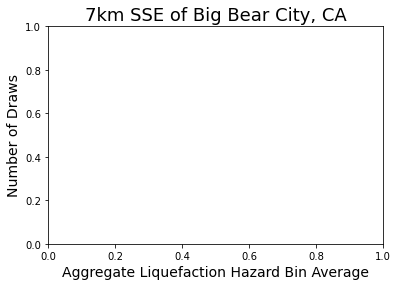

In [13]:
for ii in range(0,len(df)):
    a = df.iloc[ii,9] # Htot Beta distribution shape parameter a, column name PH_LQ
    b = df.iloc[ii,10] # Htot Beta distribution shape parameter b, column name QH_LQ
    r = beta.rvs(a, b, size=1000) # Random selection of 1000 values from the beta distribution using parameters, a and b
                                    # This sampling is instantaneous for all 46 events
    r=r*df.iloc[ii,22] # Multiplying each selection by HlimLQ to get actual draw which we will work with

    df7 = df7.append(pd.DataFrame(r).T) # Appending row of Htot / PopExp draws to previously empty DataFrame
    
    plt.xlabel('Aggregate Liquefaction Hazard Bin Average', fontsize=14)
    plt.ylabel('Number of Draws', fontsize=14)
    plt.title(df.iloc[ii,4], fontsize=18) # Setting the title as the location where event occurred
    

In [19]:
sns.set_style("whitegrid") # Allowing axes text to have white background
sns.set(font_scale=2)  # Increasing axes text size

# Intermediate Plot 1

In [29]:
df

eventcode      time  year  mag  \
0                   ci10012262   8/13/78  1978  5.1   
1                     ci134894  11/24/87  1987  6.2   
2                    ci3019681   4/23/92  1992  6.1   
3                    ci3105173   5/17/93  1993  6.1   
4                    ci3329122    4/9/68  1968  6.6   
5                    ci3347678    2/9/71  1971  6.6   
7                     ci628016  11/24/87  1987  6.6   
8                     ci700917    7/8/86  1986  6.0   
9                     ci731691   10/1/87  1987  5.9   
25                ld2002042000   4/20/02  2002  5.3   
26                  nc10085763   7/21/86  1986  6.4   
27                   nc1053043   5/25/80  1980  6.1   
28                   nc1053045   5/25/80  1980  6.0   
29                   nc1053054   5/25/80  1980  6.1   
30                   nc1053177   5/27/80  1980  6.2   
31                   nc1091100    5/2/83  1983  6.7   
32                     nc17204   4/24/84  1984  6.2   
33                    nc228027   8/17/91  1991  6.0   
34                    nc269151   4/25/92  1992  7.2   
35                     nc32321  11/23/84  1984  6.1   
36                    nm606657   4/18/08  2008  5.2   
37                  nn00725272   5/15/20  2020  6.5   
65                  us70008jr5   3/31/20  2020  6.5   
77                   ushis2396   8/18/59  1959  7.3   
78                  usp0000ad8   3/28/75  1975  6.1   
86                  usp000155j   1/24/80  1980  5.8   
88                  usp0001zbv  10/28/83  1983  6.9   
158                 uw10313838   9/21/93  1993  6.0   
159                 ci14383980   7/29/08  2008  5.4   
160                  ci9108652  10/16/99  1999  7.1   
161                 nc21123384    9/3/00  2000  4.9   
163                   se609212   8/23/11  2011  5.8   
164                  ci3031111   6/28/92  1992  7.3   
184                 nc21323712  12/22/03  2003  6.5   
185               ak002e435qpj   11/3/02  2002  7.9   
186               ak018fcnsk91  11/30/18  2018  7.1   
187                 ci14607652    4/4/10  2010  7.2   
188                  ci3144585   1/17/94  1994  6.7   
189                 ci38457511    7/6/19  2019  7.1   
190                  nc1046962    8/6/79  1979  5.8   
191                   nc216859  10/18/89  1989  6.9   
192                 nc72282711   8/24/14  2014  6.0   
194  official19640328033616_30   3/28/64  1964  9.2   
195                 us10006jxs    9/3/16  2016  5.8   
196                  ushis2810   4/29/65  1965  6.7   
197                 uw10530748   2/28/01  2001  6.8   
198                  ci3031425   6/28/92  1992  6.3   

                                         location    HaggLQ  ExpPopLQ  \
0                     12km S of Santa Barbara, CA     0.200       150   
1                     17km WNW of Westmorland, CA    15.000       200   
2          17km NNE of Thousand Palms, California     0.390       320   
3                  46km E of Big Pine, California     0.540         0   
4                   5km NNE of Ocotillo Wells, CA    90.000     11000   
5                      10km SSW of Agua Dulce, CA    22.000     30000   
7                       22km W of Westmorland, CA    60.000      9100   
8                   6km SSW of Morongo Valley, CA     1.200       630   
9                         2km SSW of Rosemead, CA     9.300     29000   
25                                       New York     0.093         7   
26                             Central California     3.400        20   
27                             Central California     4.000         0   
28                   Long Valley area, California     0.700         0   
29                             Central California     0.690         0   
30                             Central California     0.870         1   
31                             Central California   110.000      1600   
32                            Northern California    19.000     21000   
33                            Northern California     0.072       

In [ ]:
for iii in range(0,df7.shape[0]):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sns.histplot(x=df7.iloc[iii,:], kde=True) # Plots histogram and associated PDF
    
    plt.xlabel('Aggregate Liquefaction Hazard Distribution', fontsize=28)
    #plt.ylabel('Aggregate Liquefaction Hazard Mean', fontsize=28)
    plt.title(str(df.iloc[iii,4])+', HaggLQ = '+str(df.iloc[iii,5]), fontsize=36) # Setting the title as the location where event occurred

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


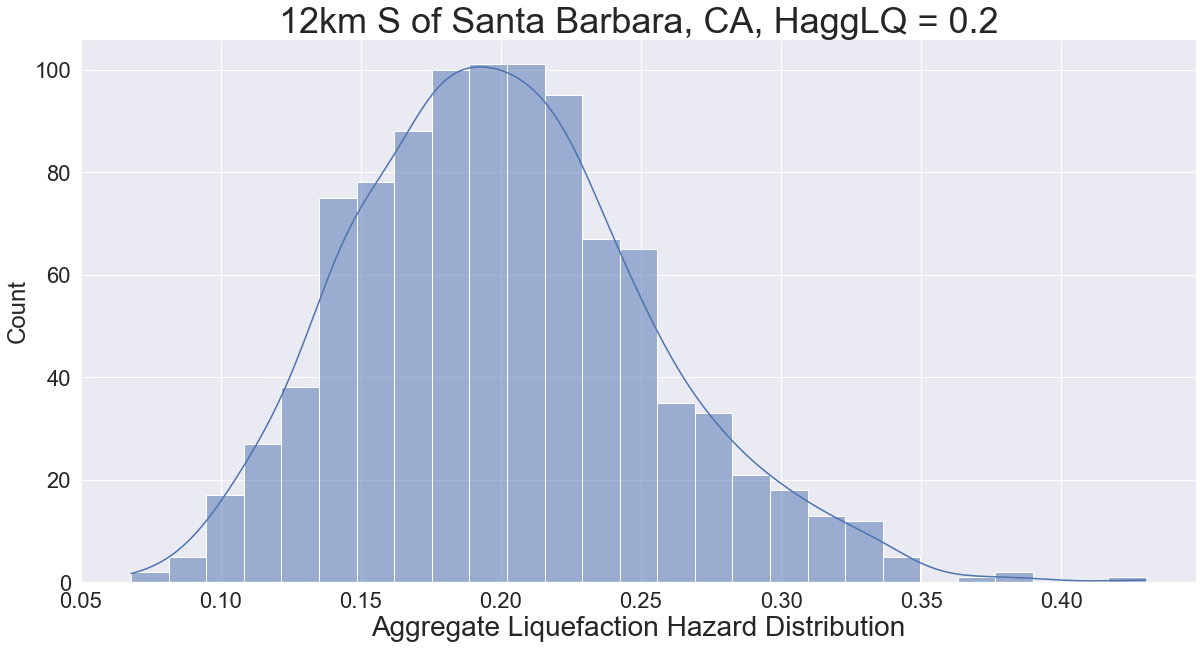

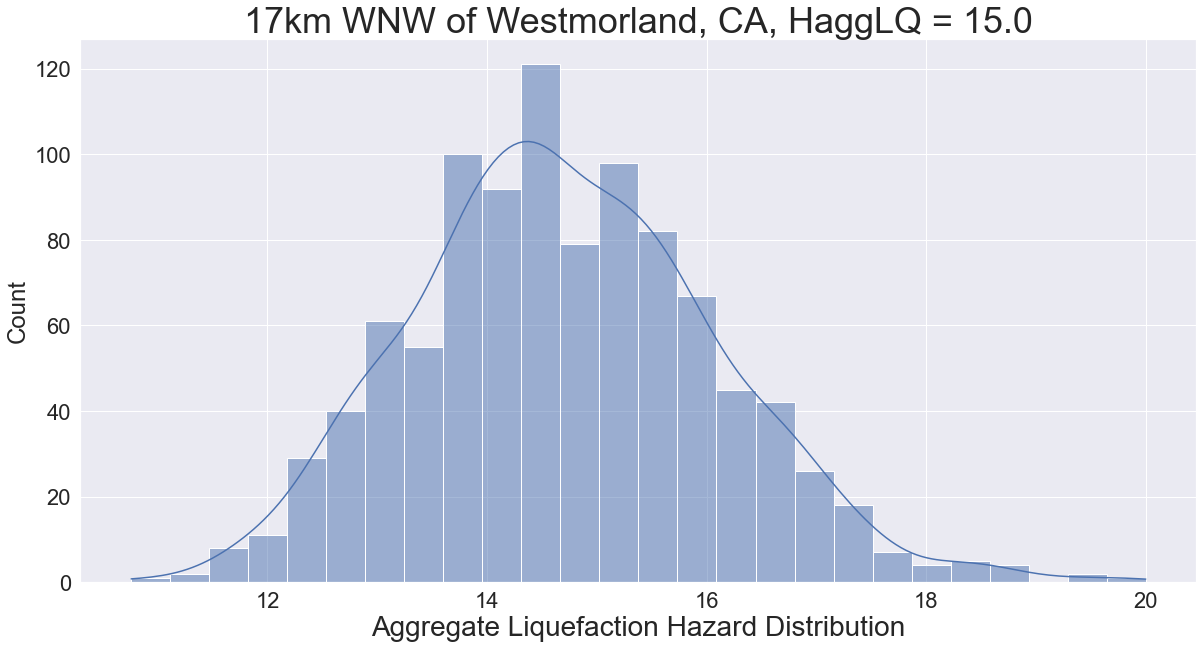

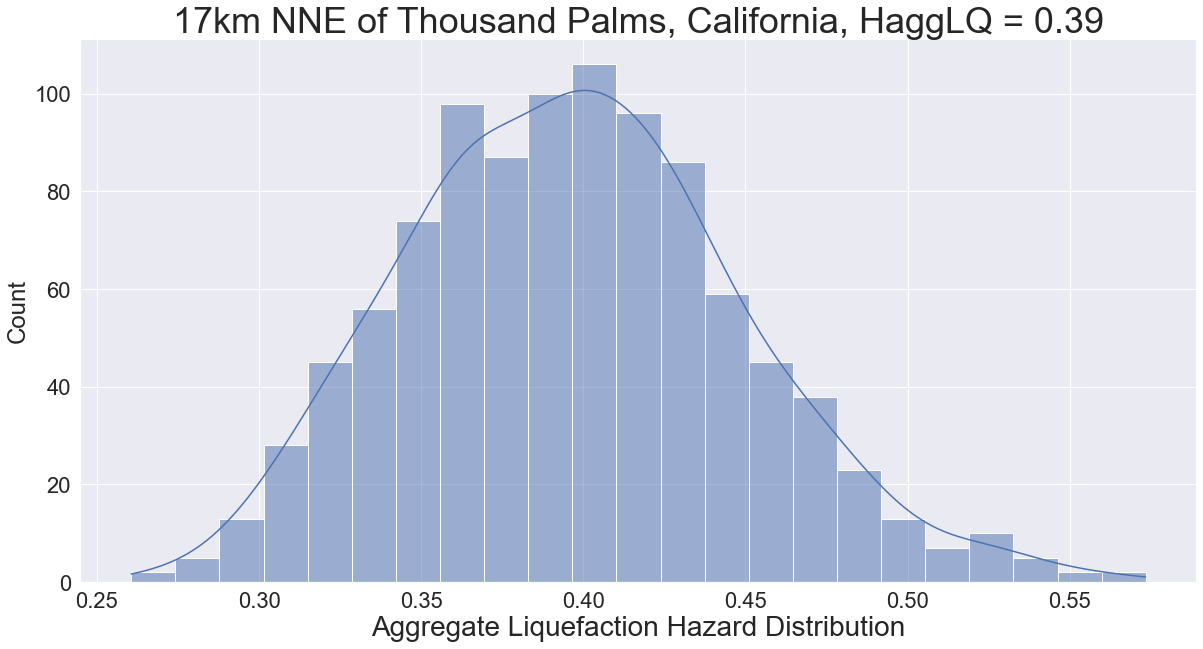

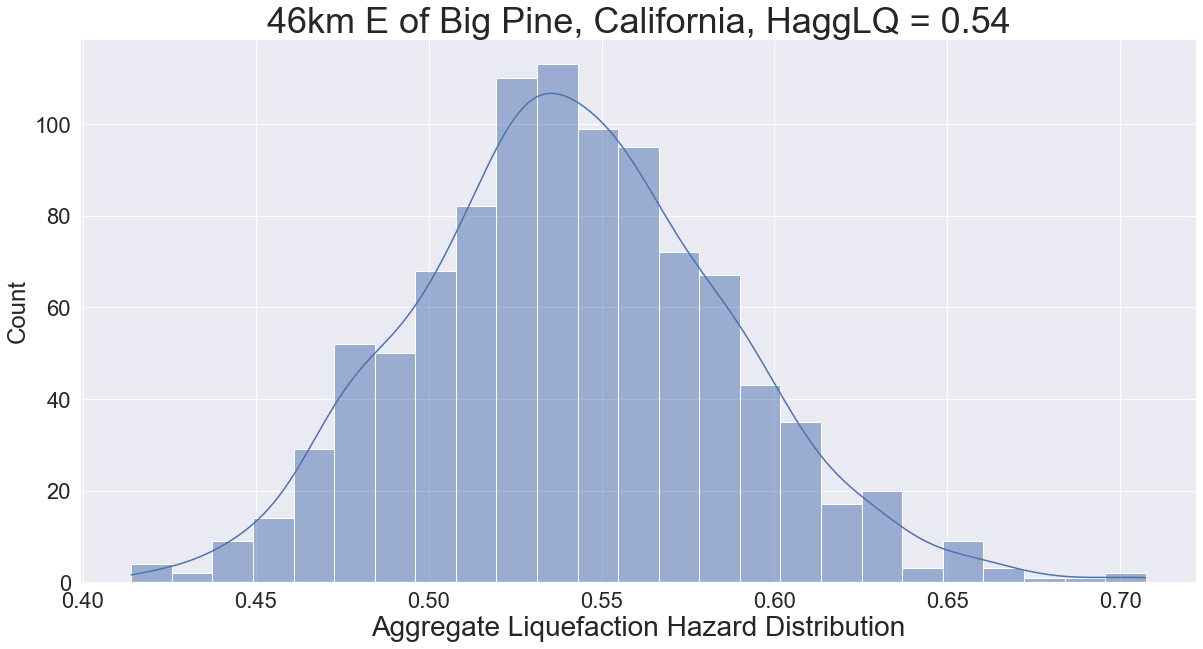

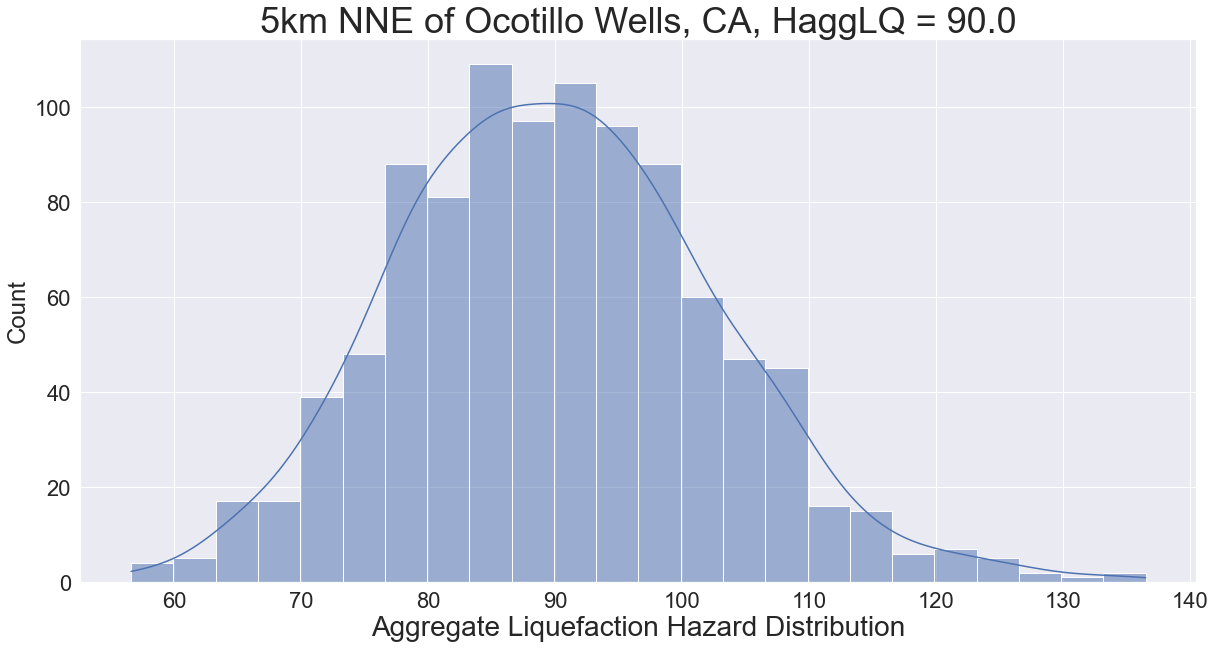

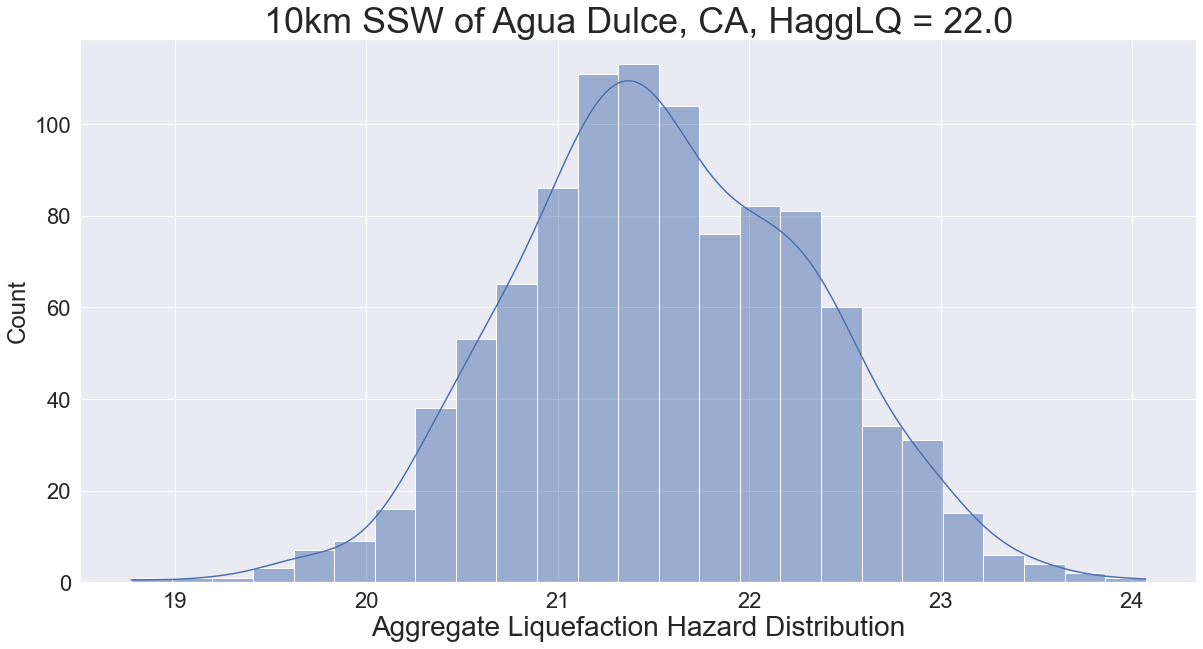

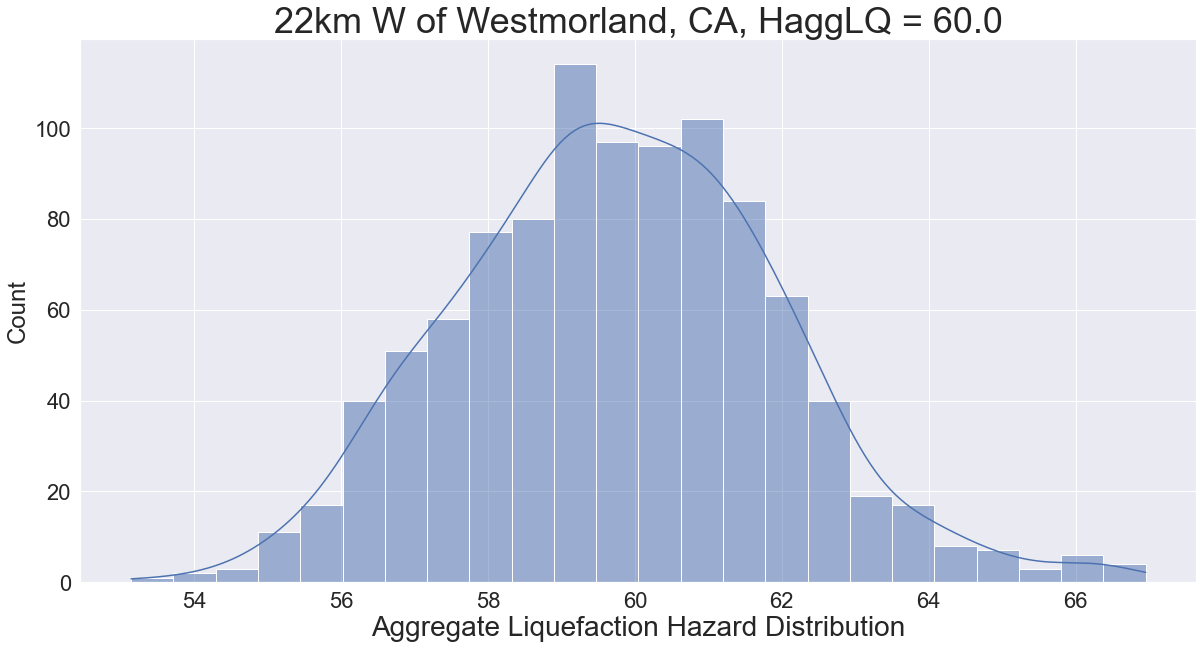

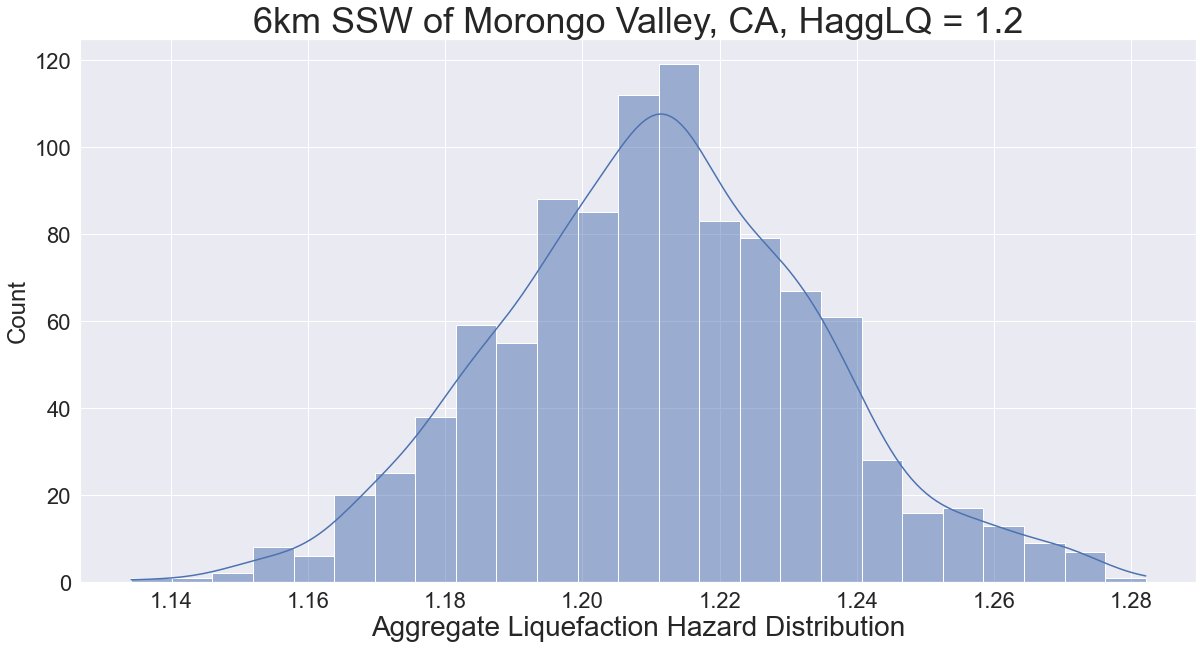

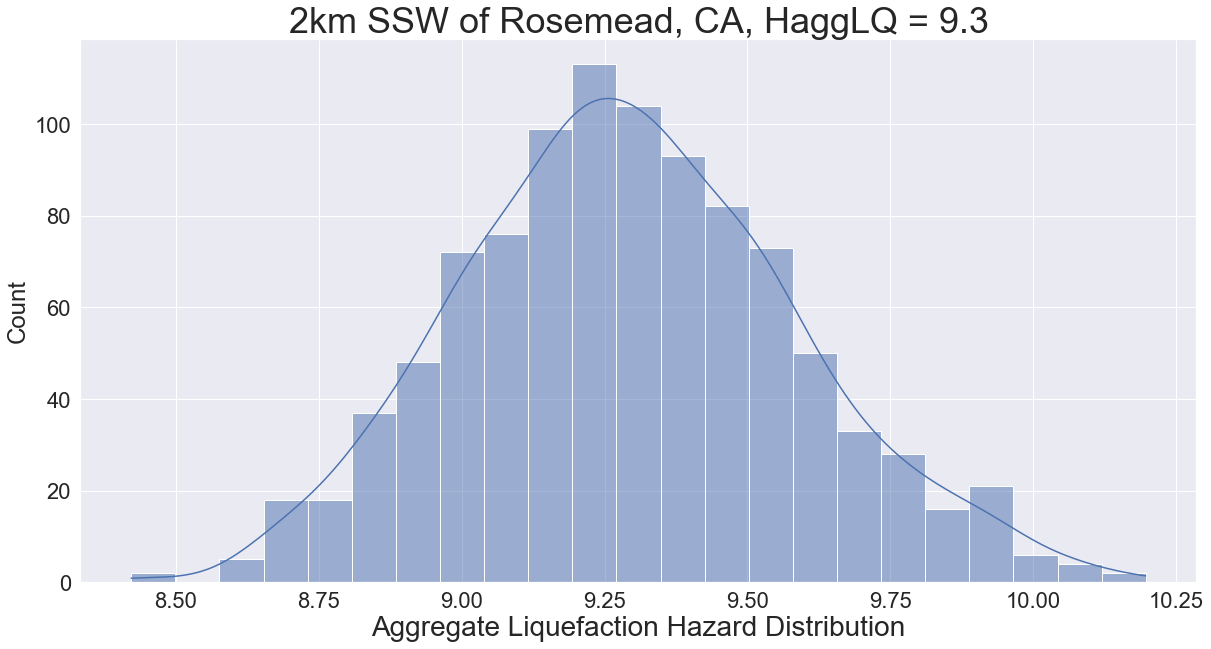

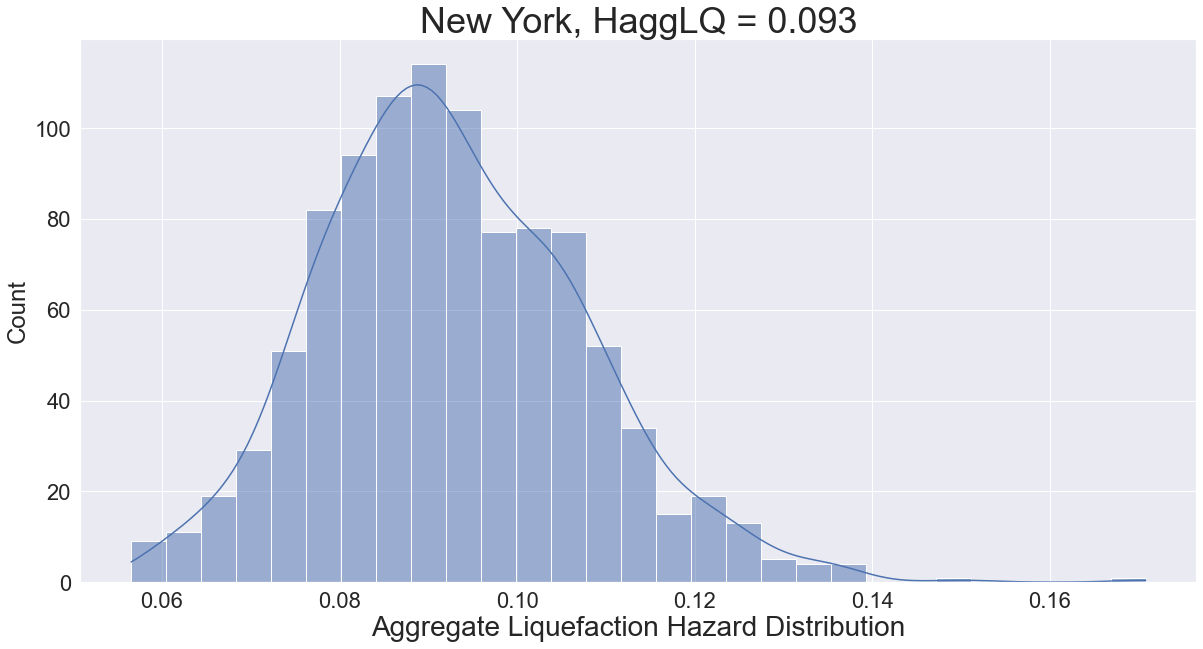

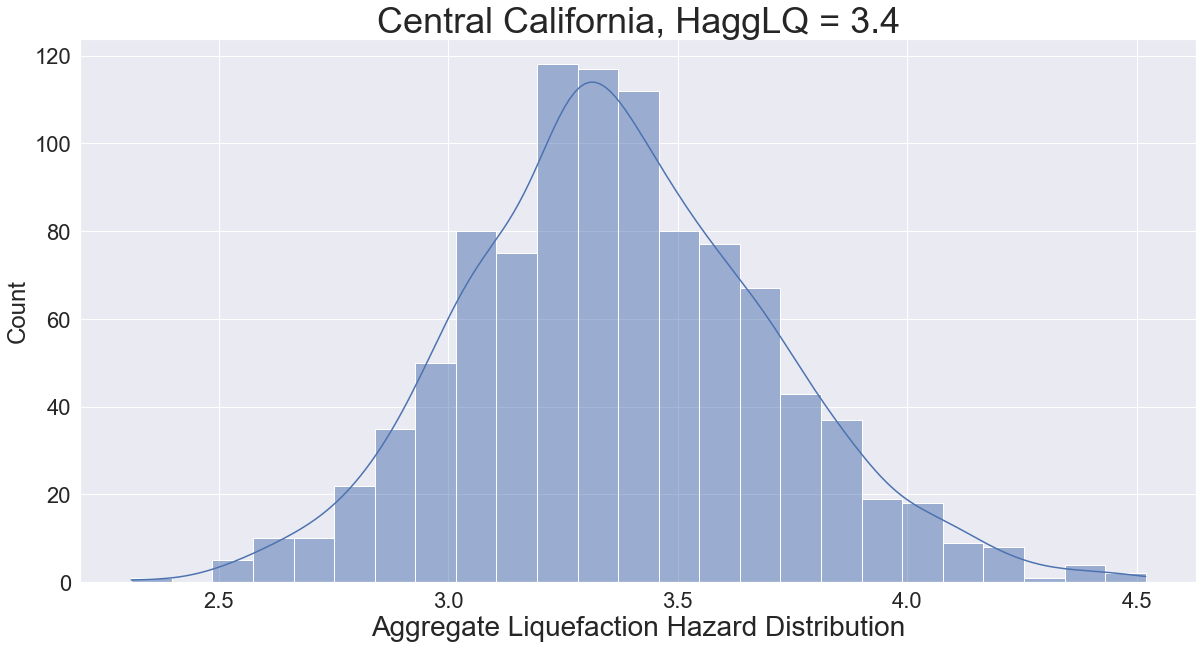

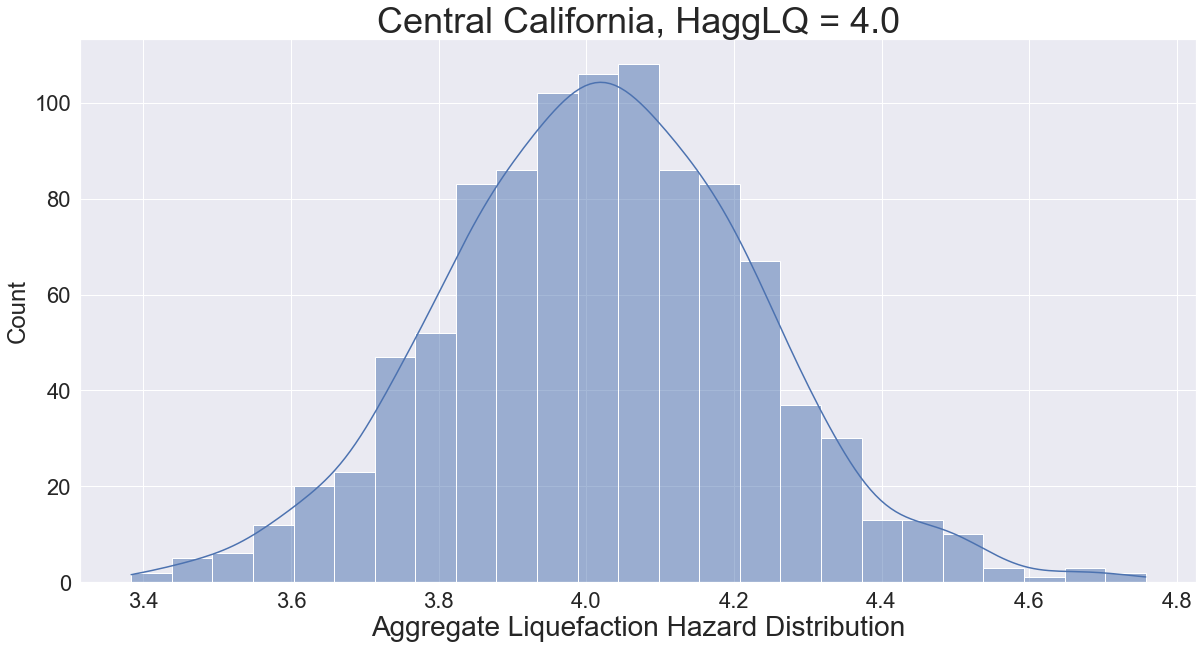

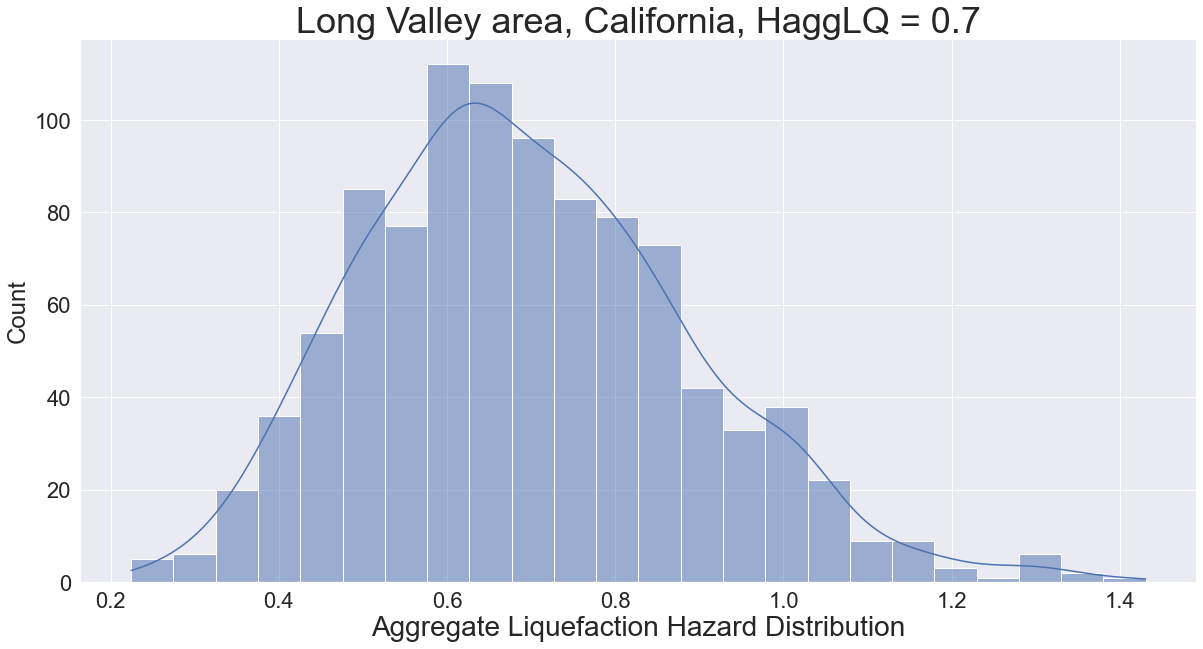

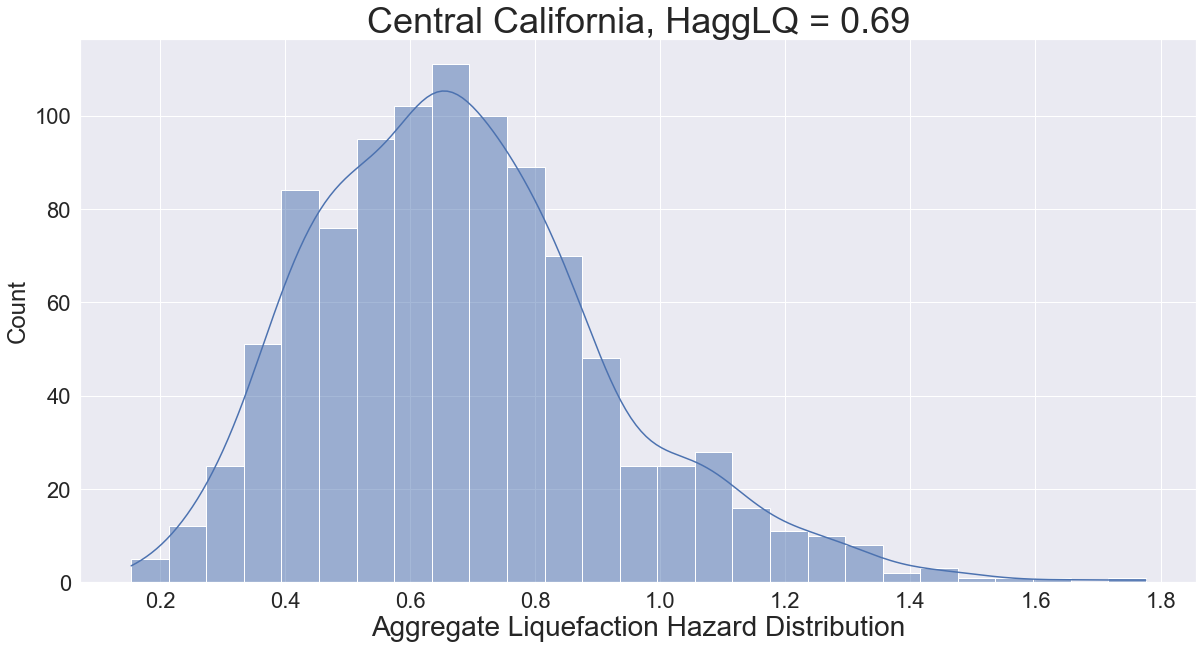

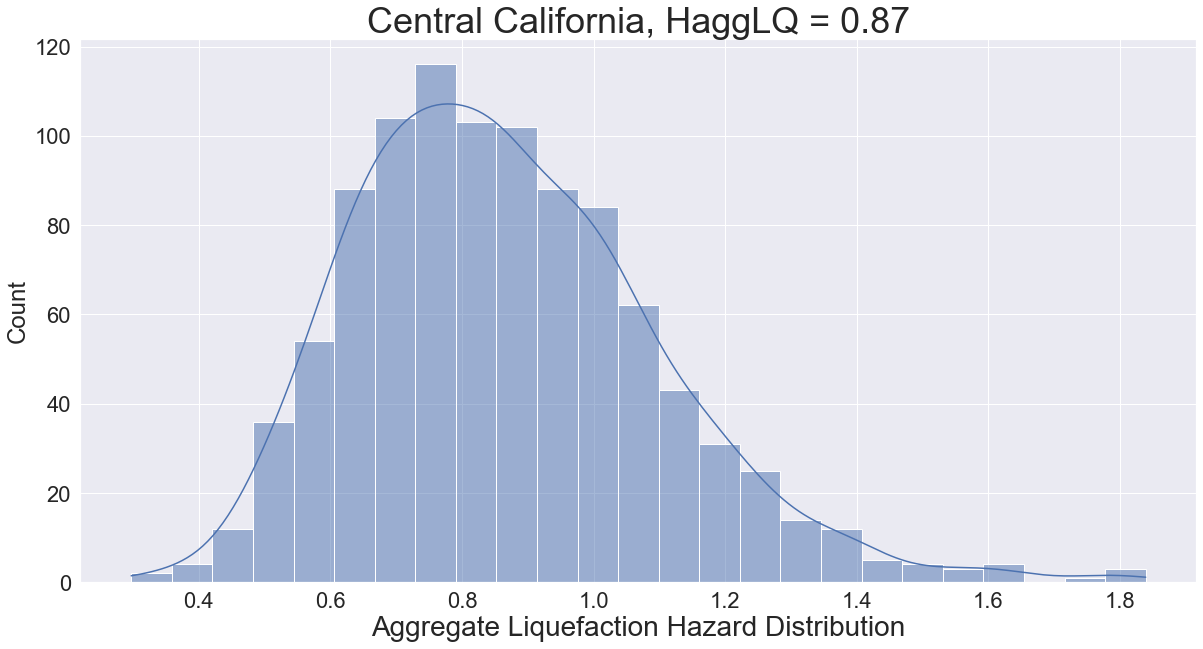

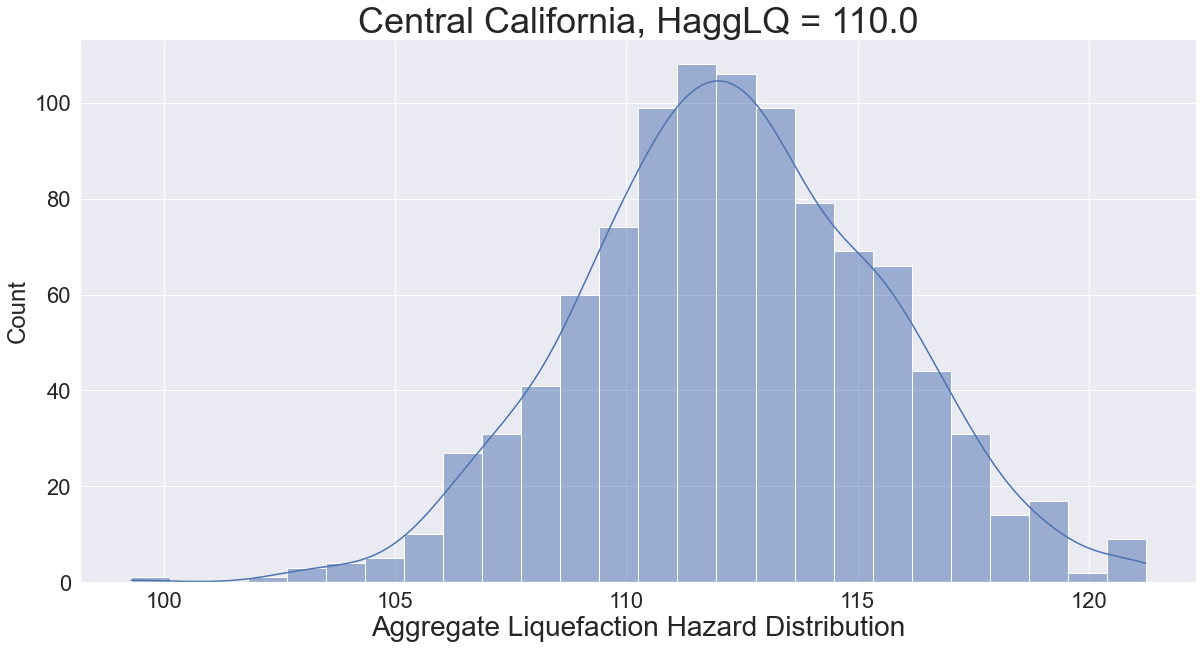

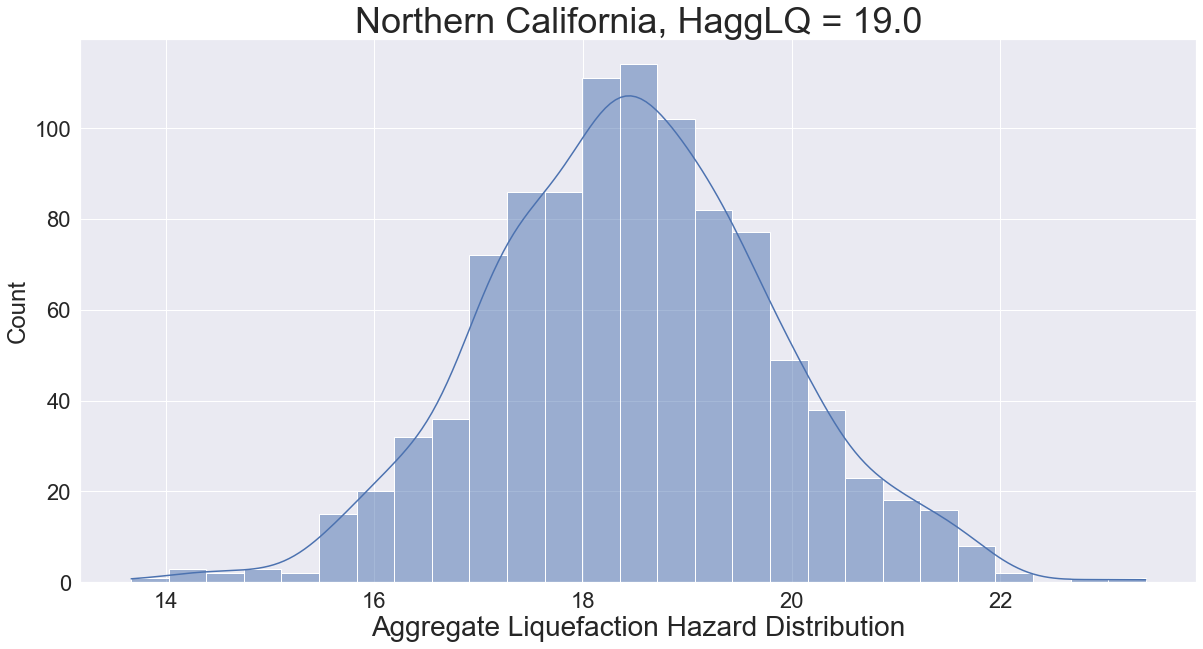

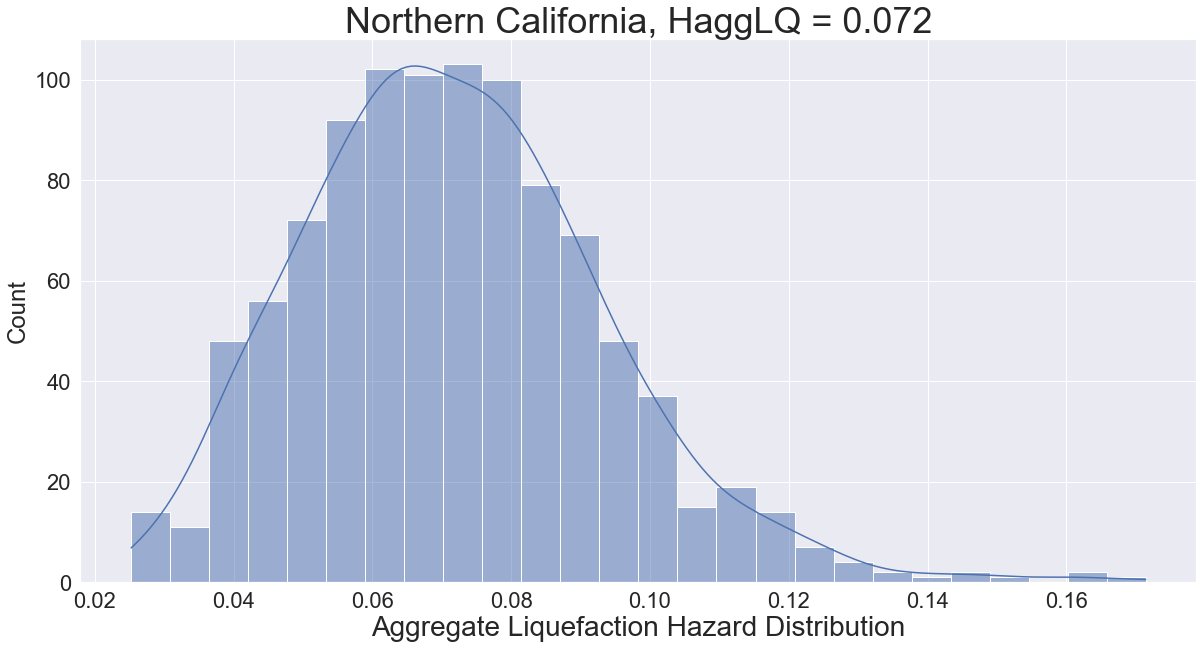

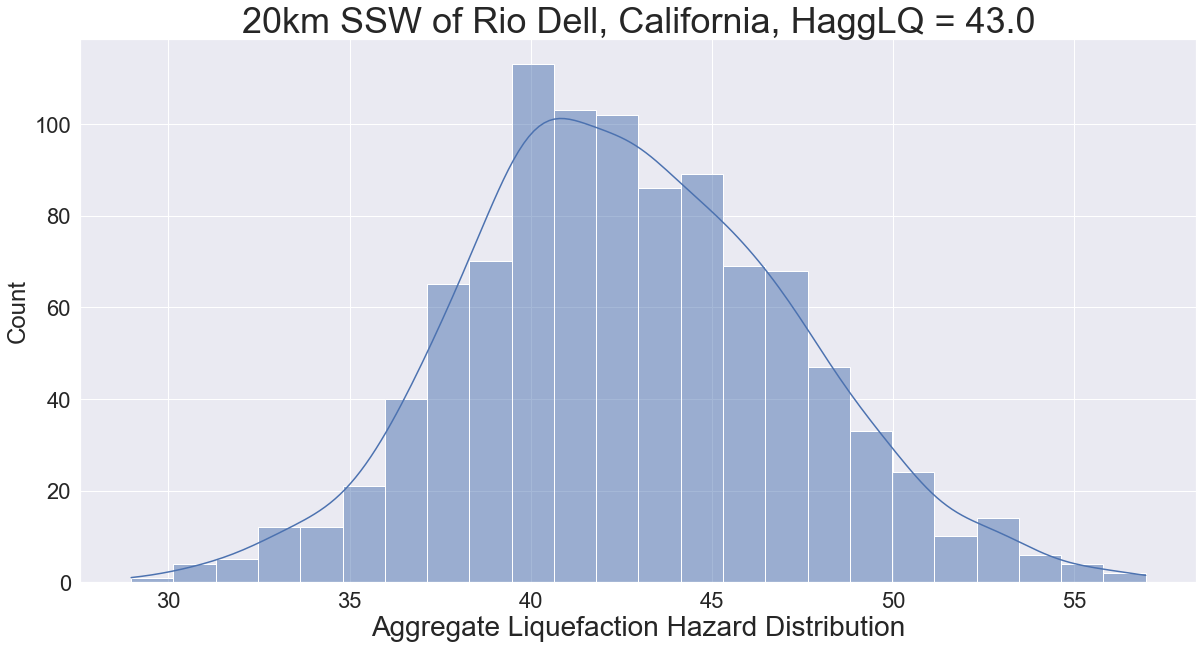

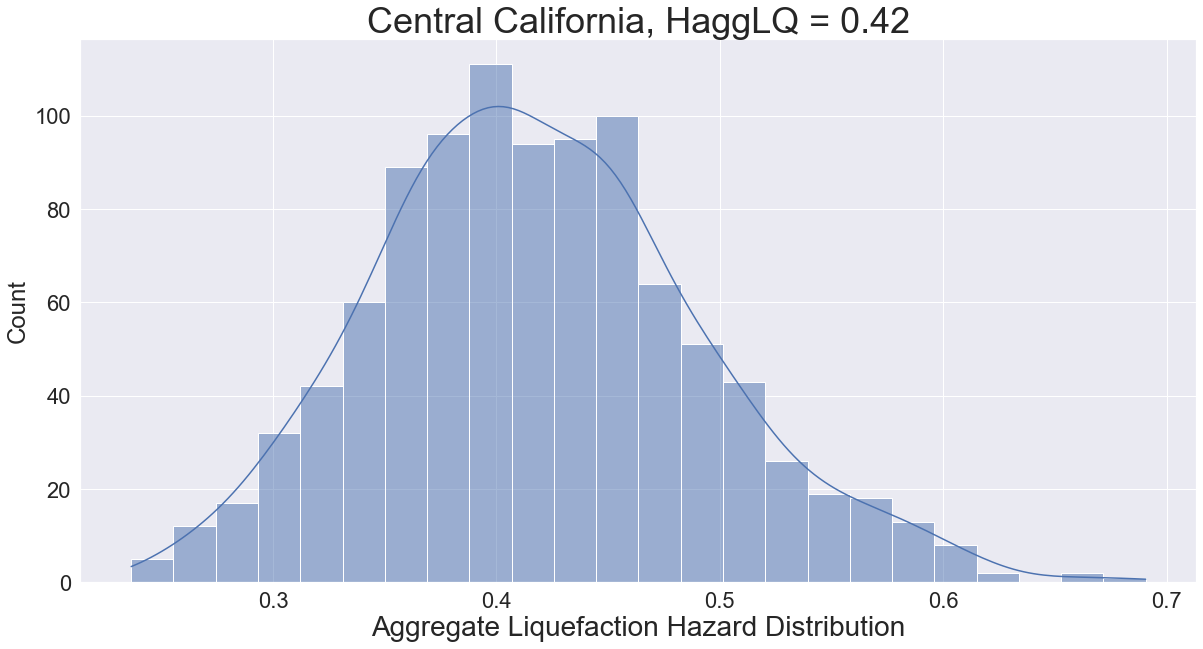

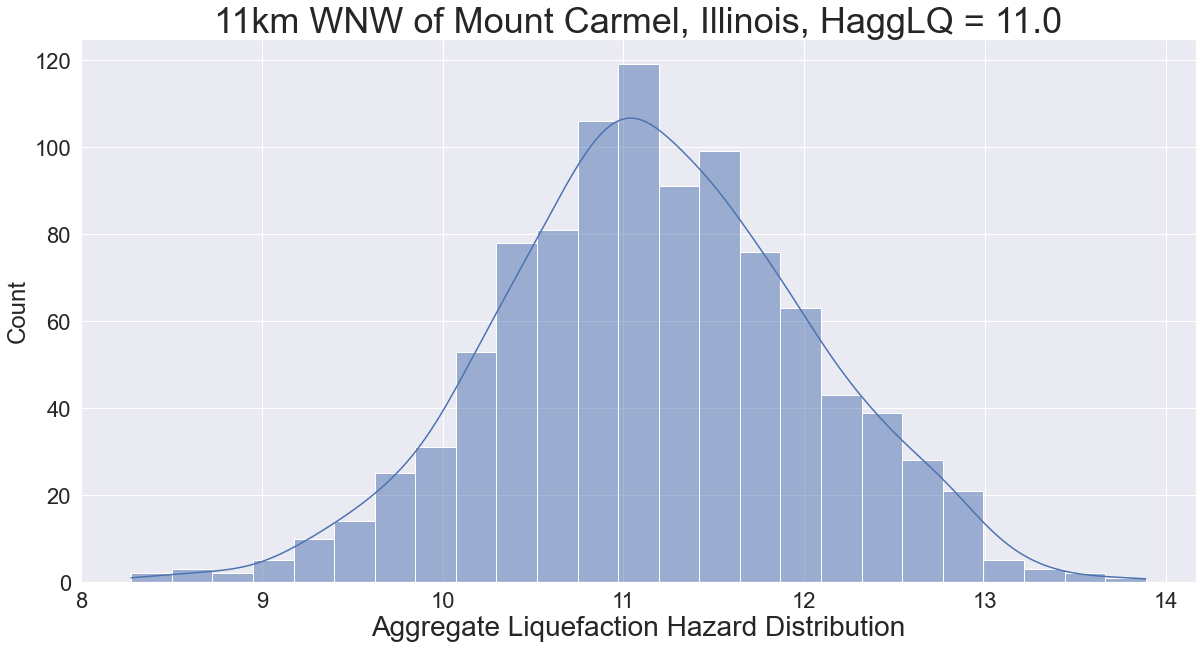

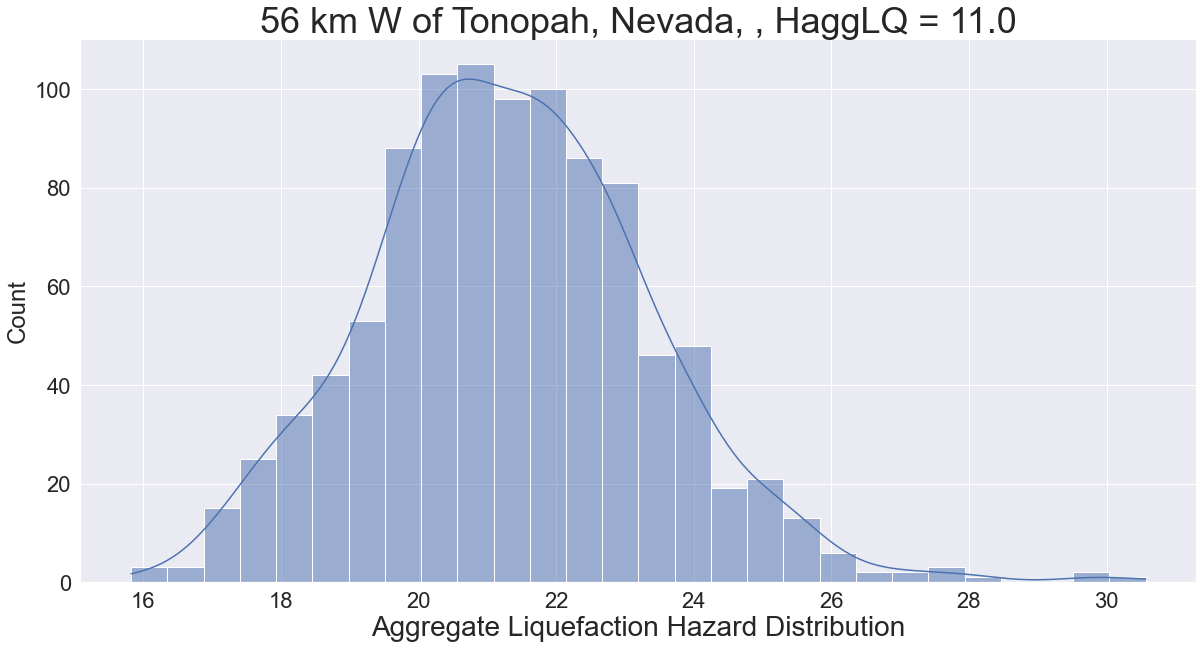

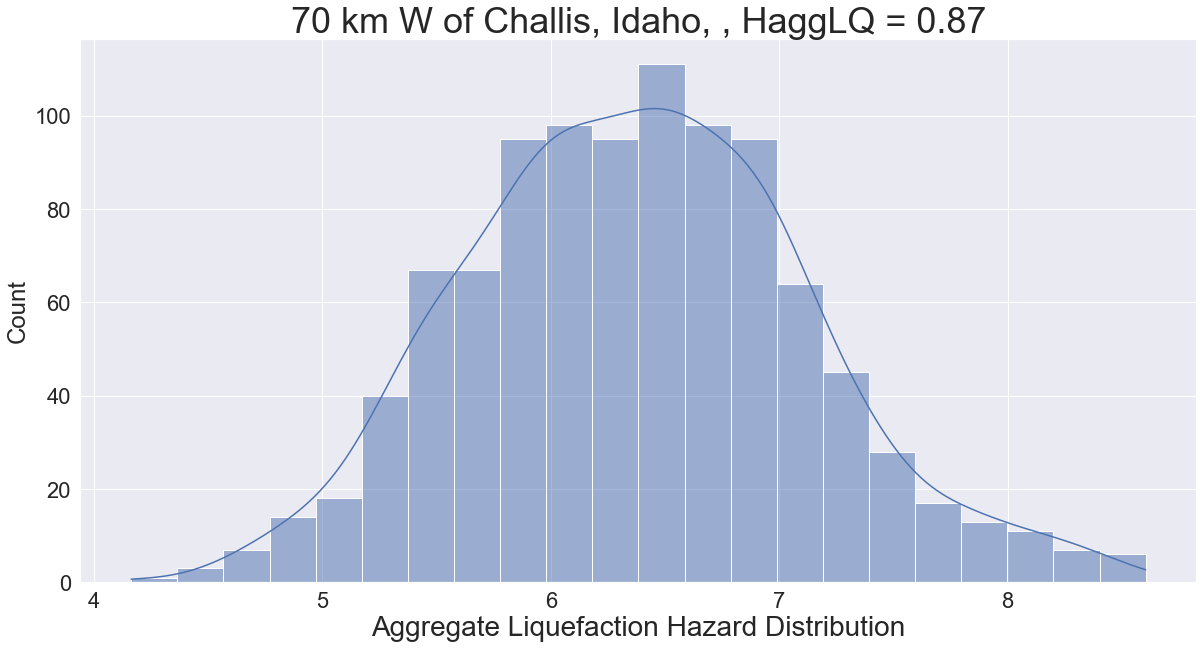

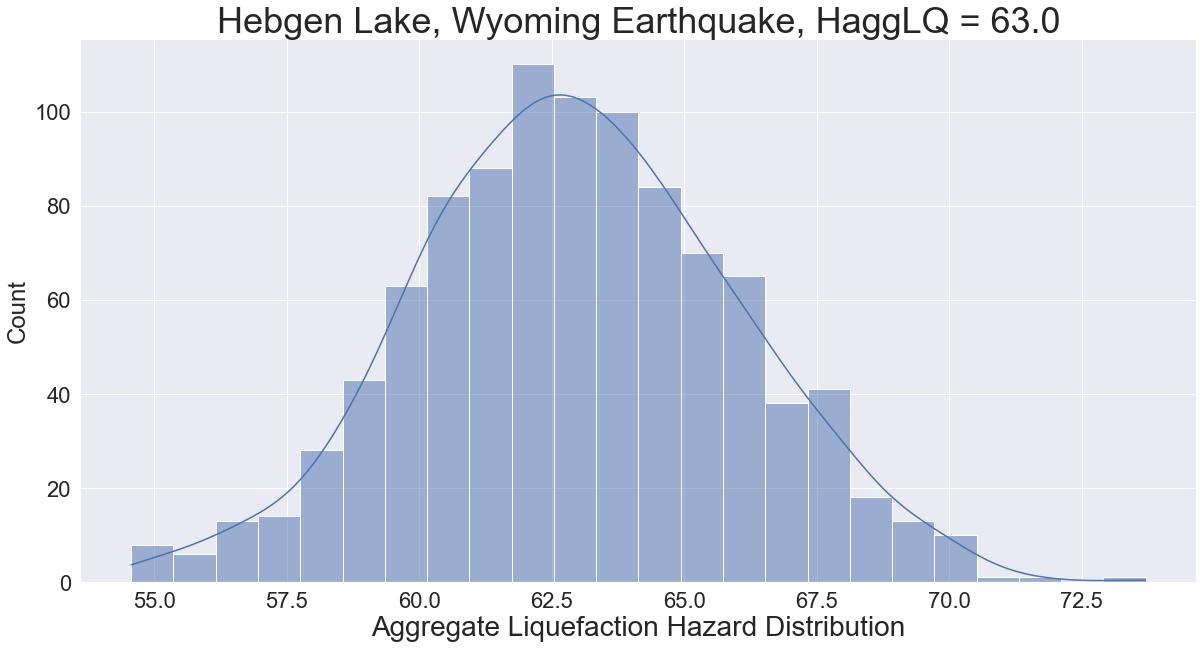

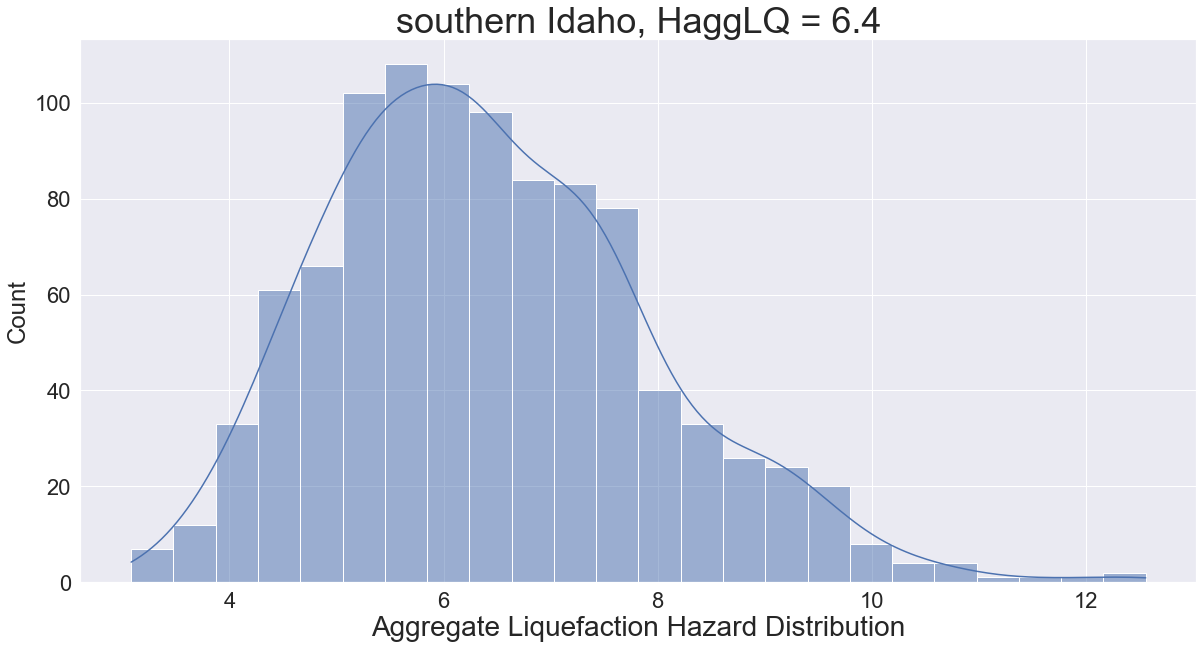

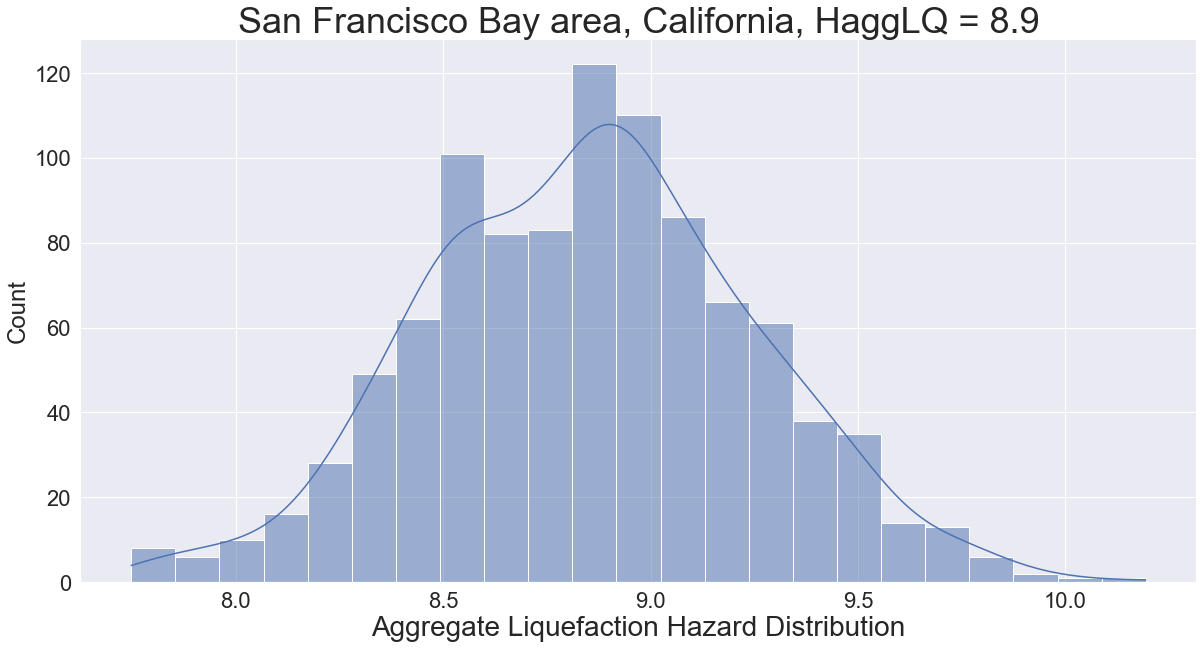

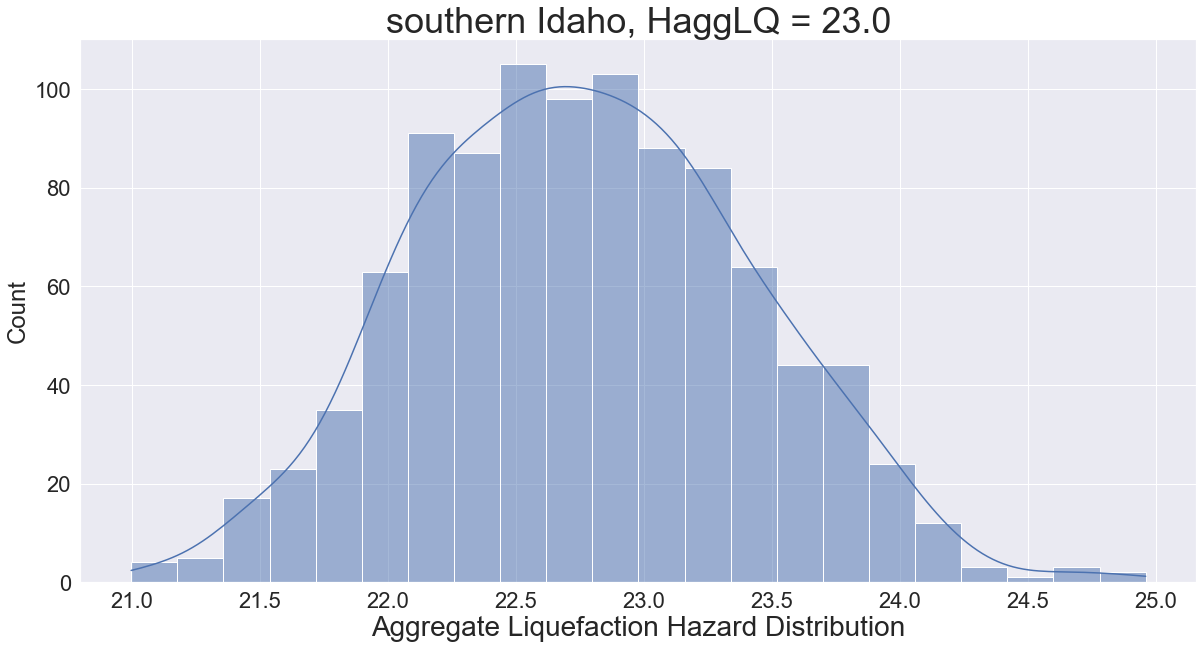

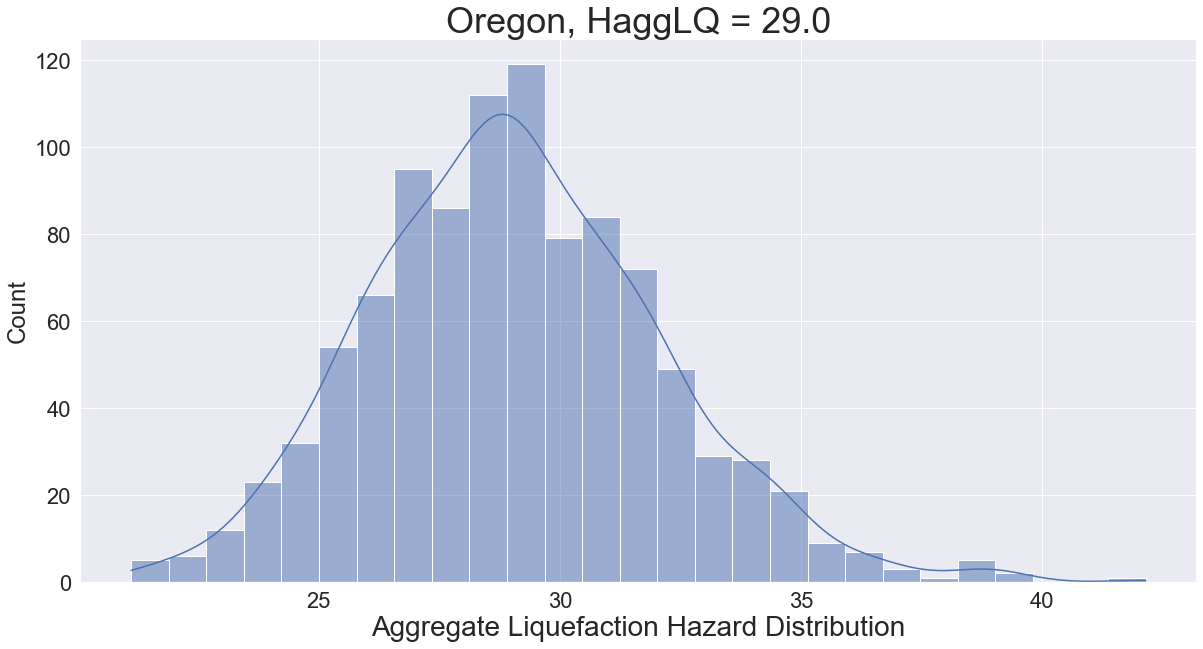

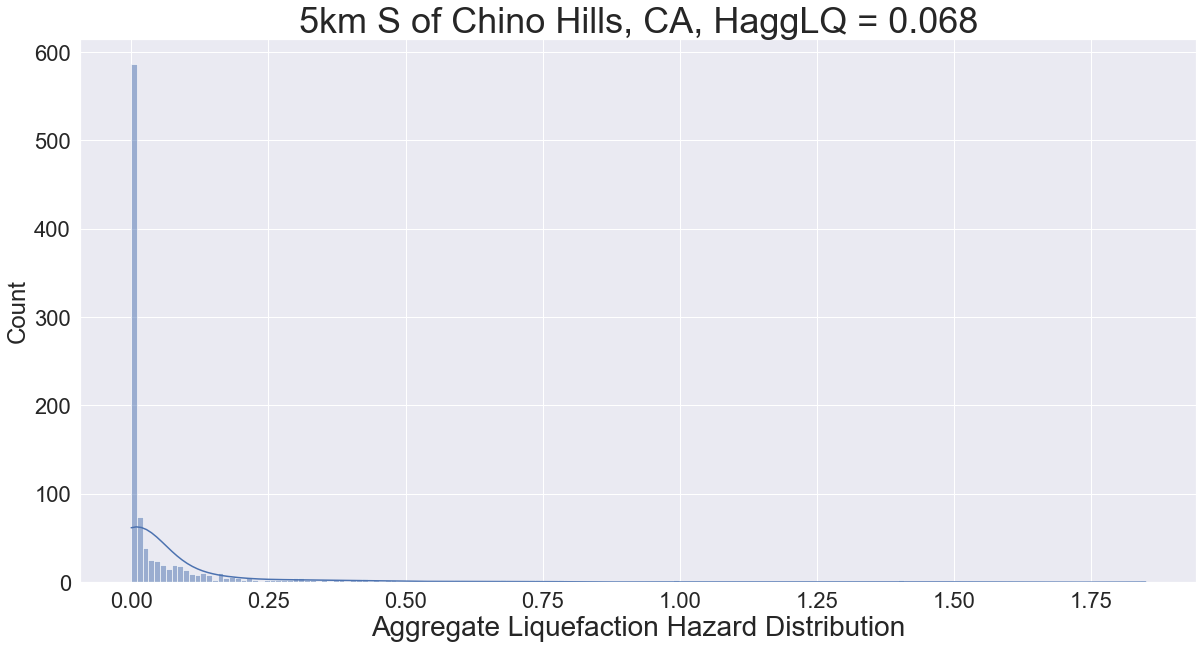

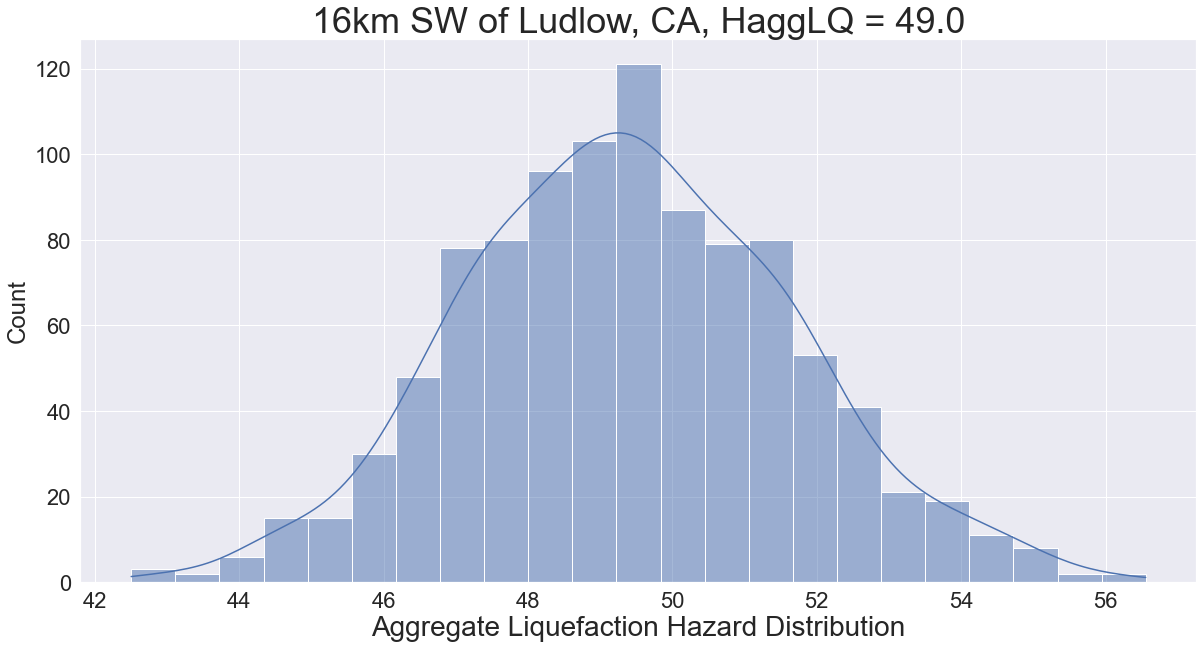

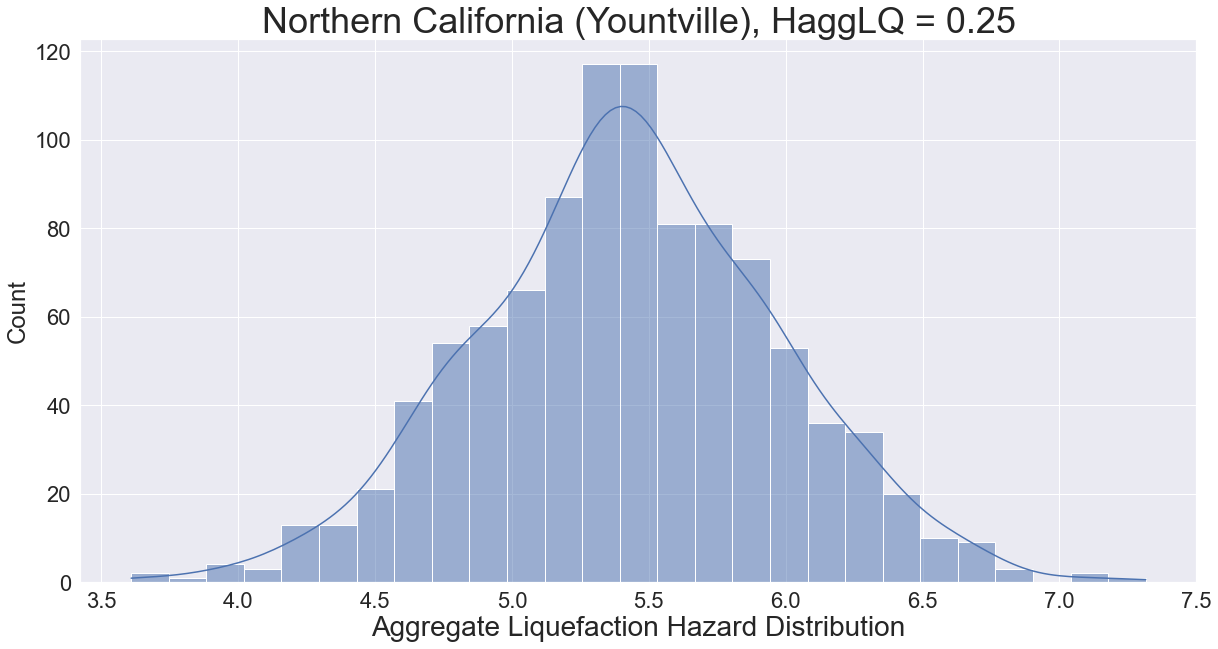

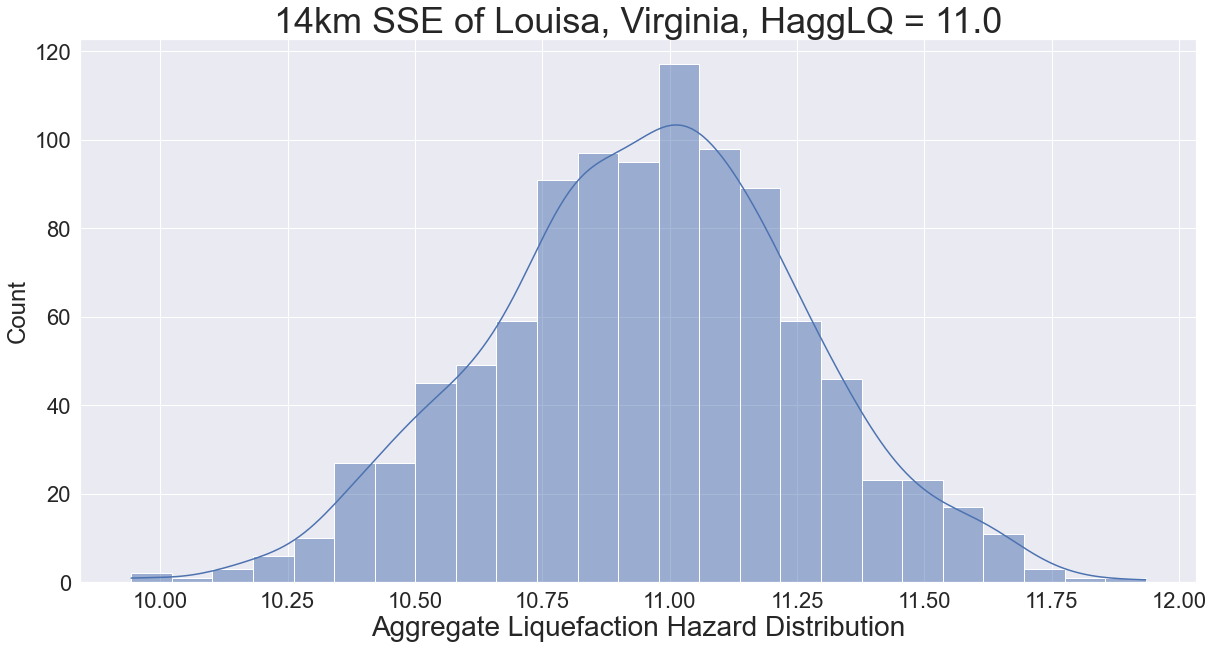

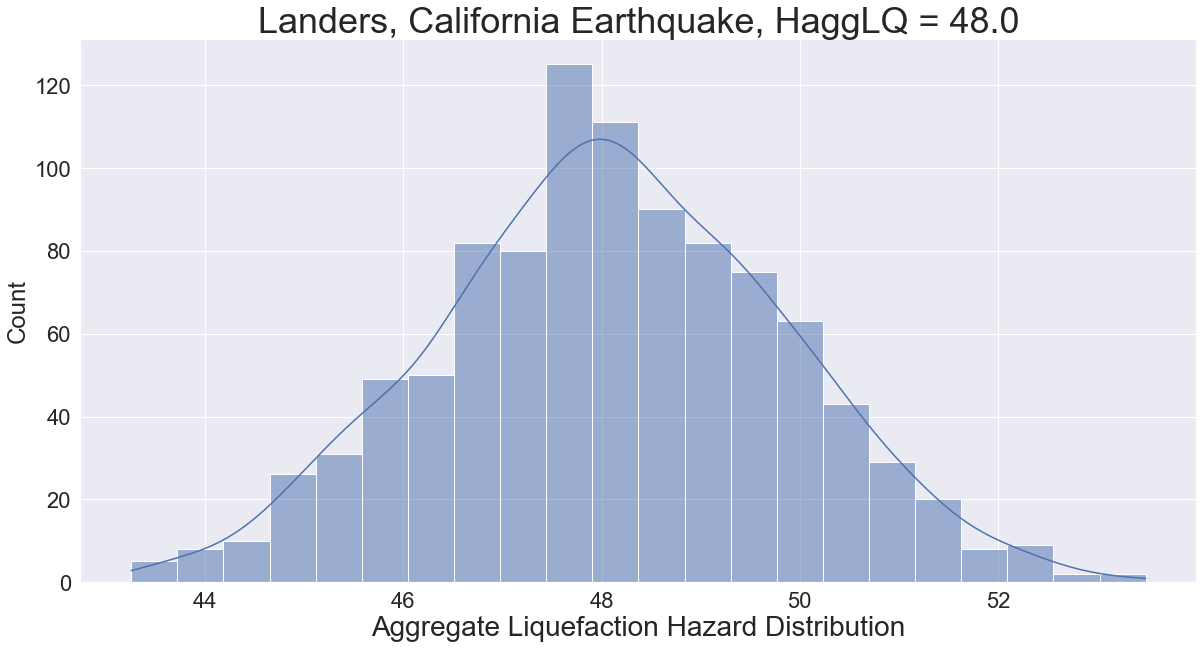

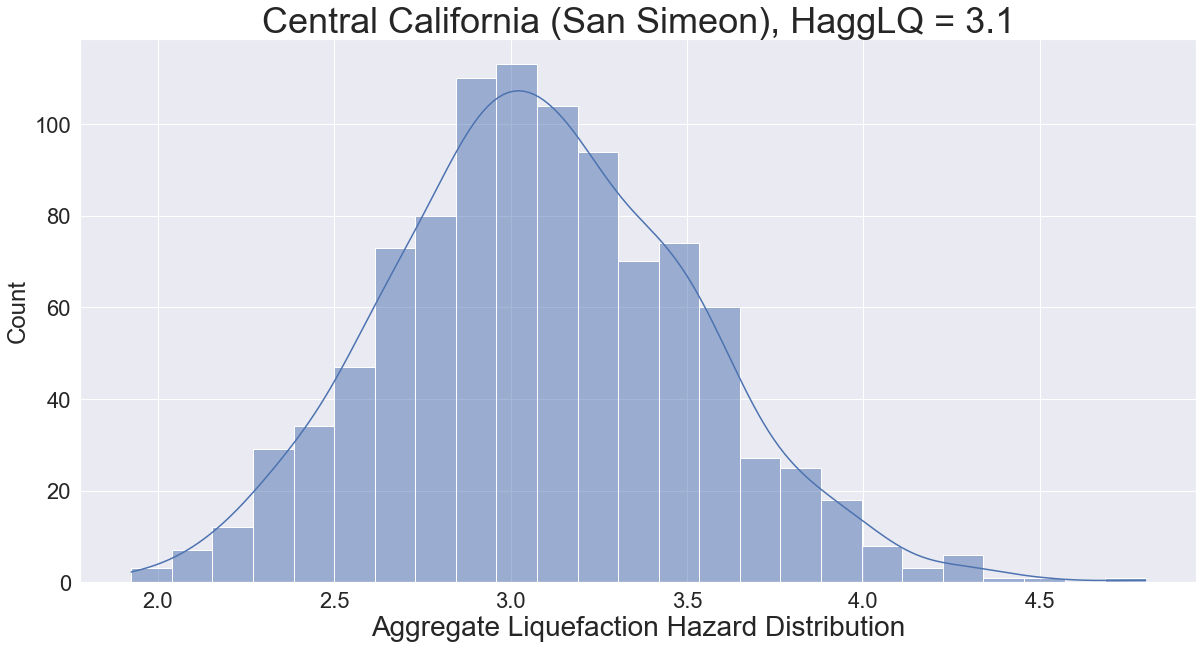

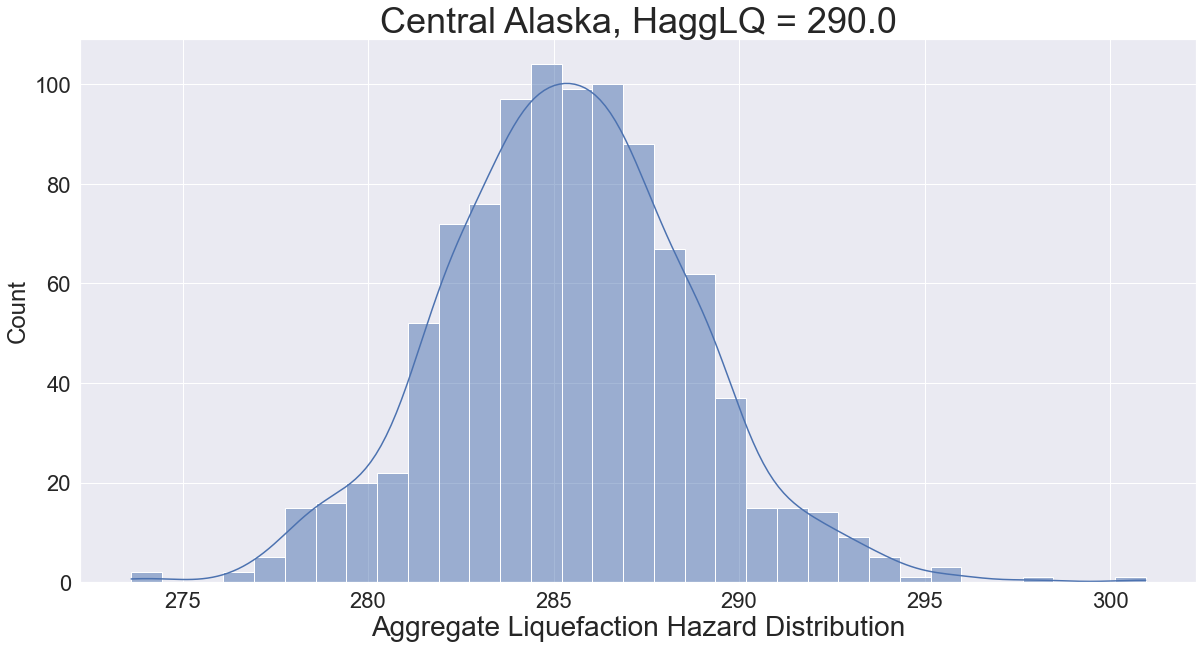

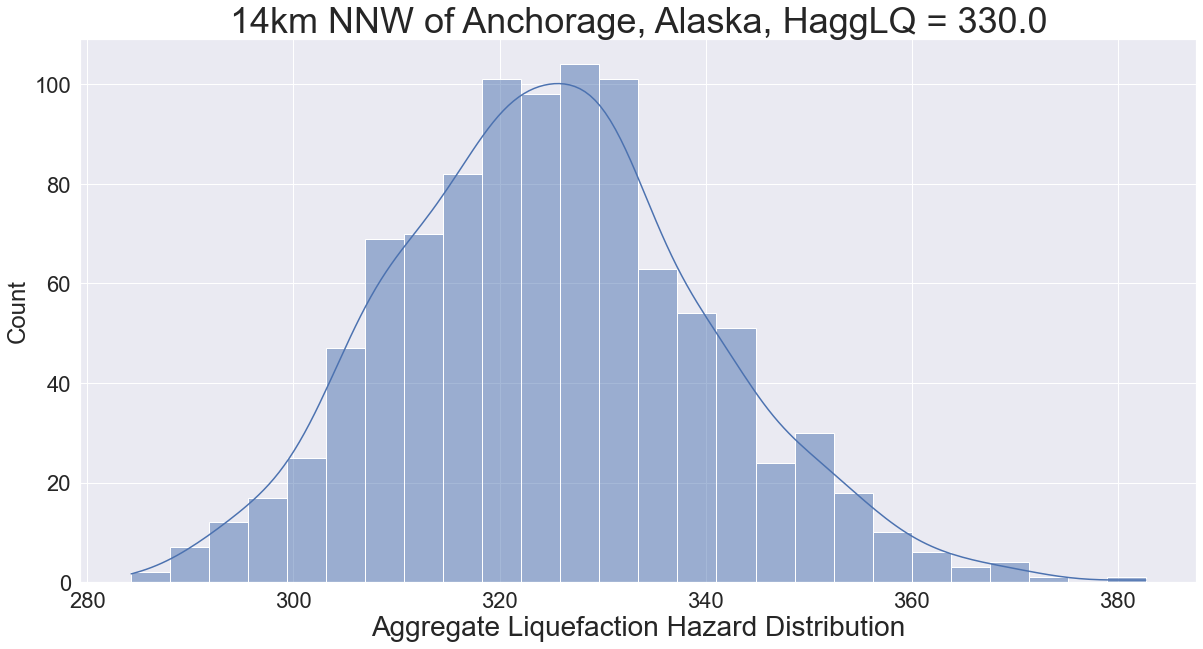

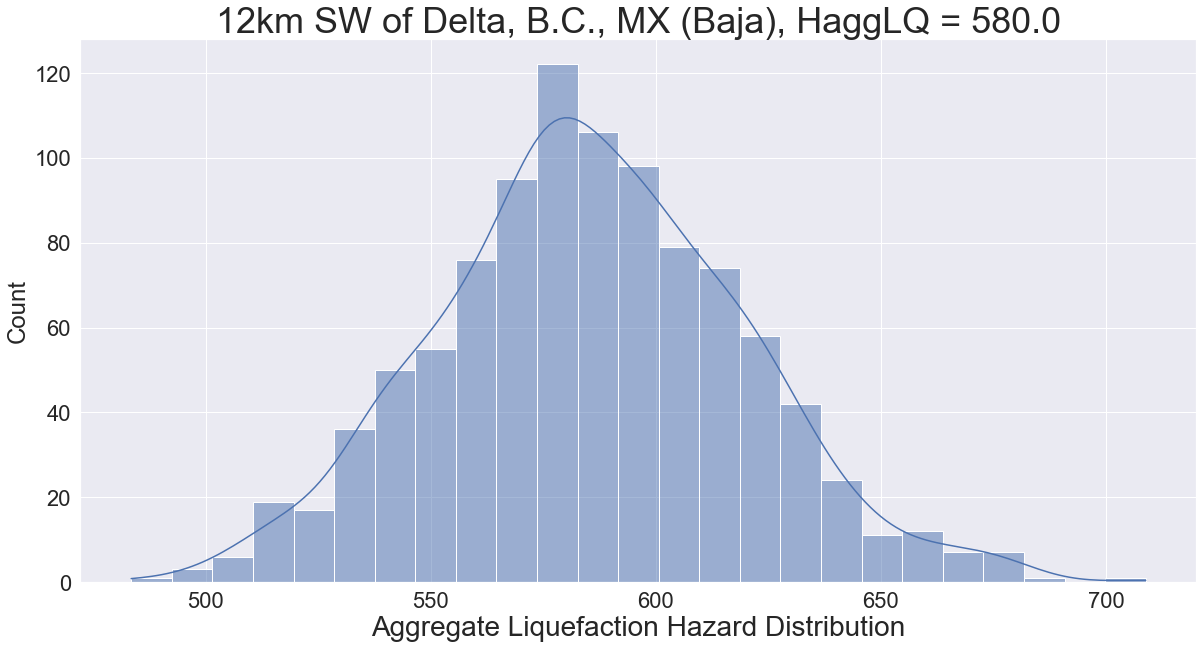

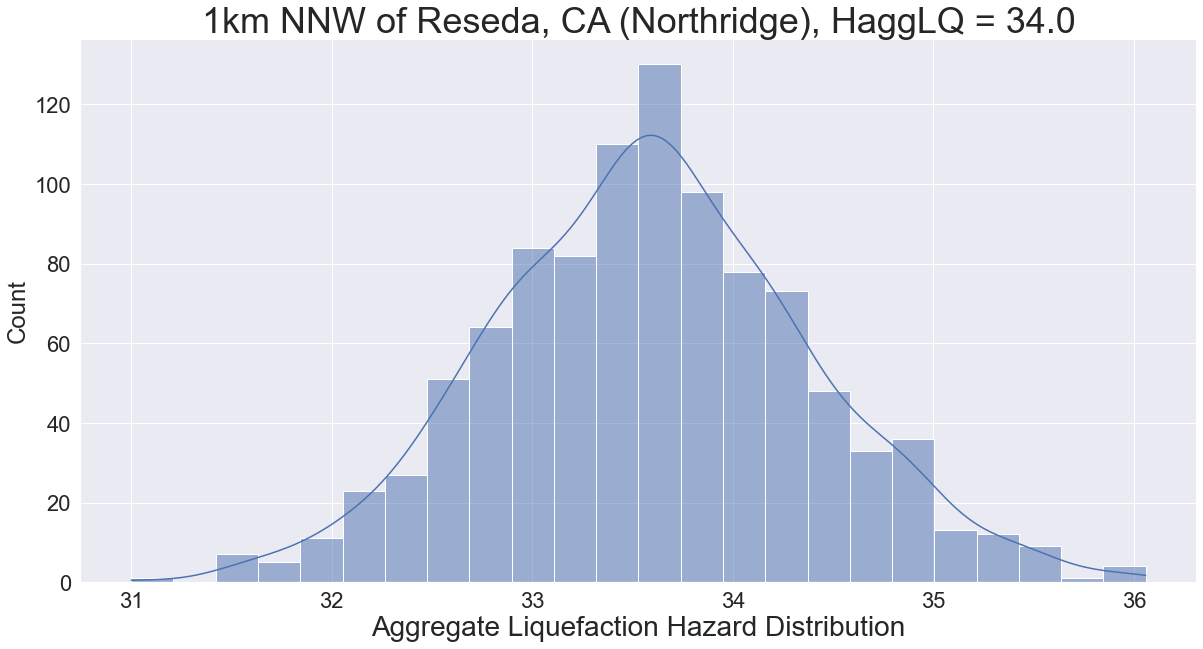

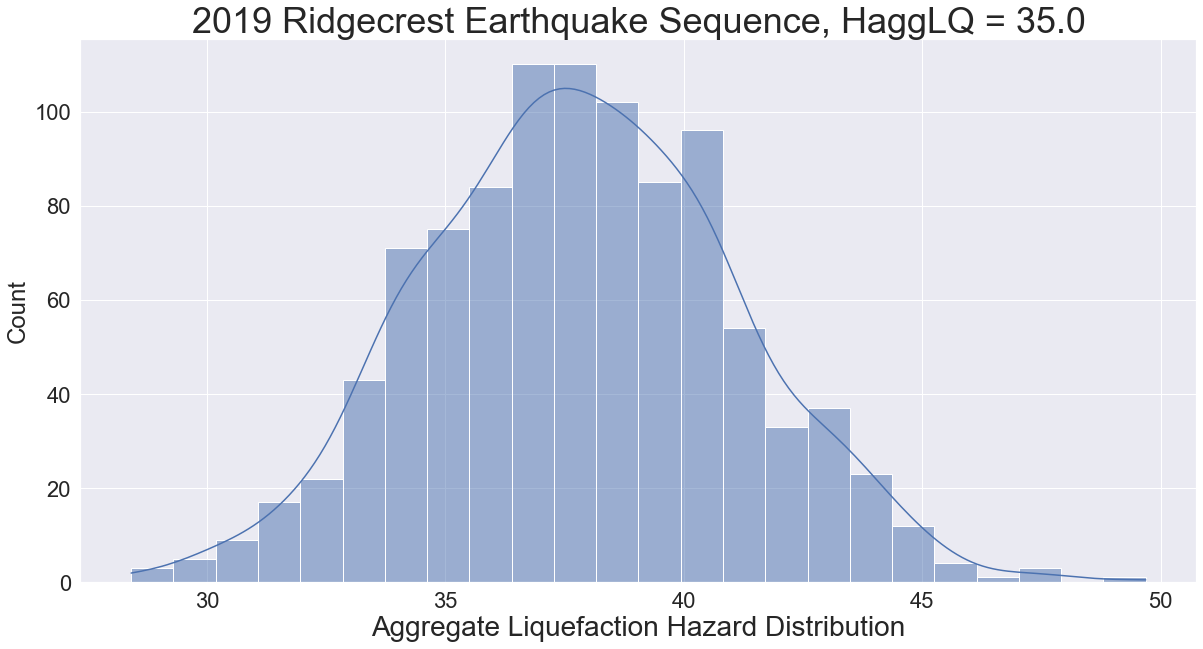

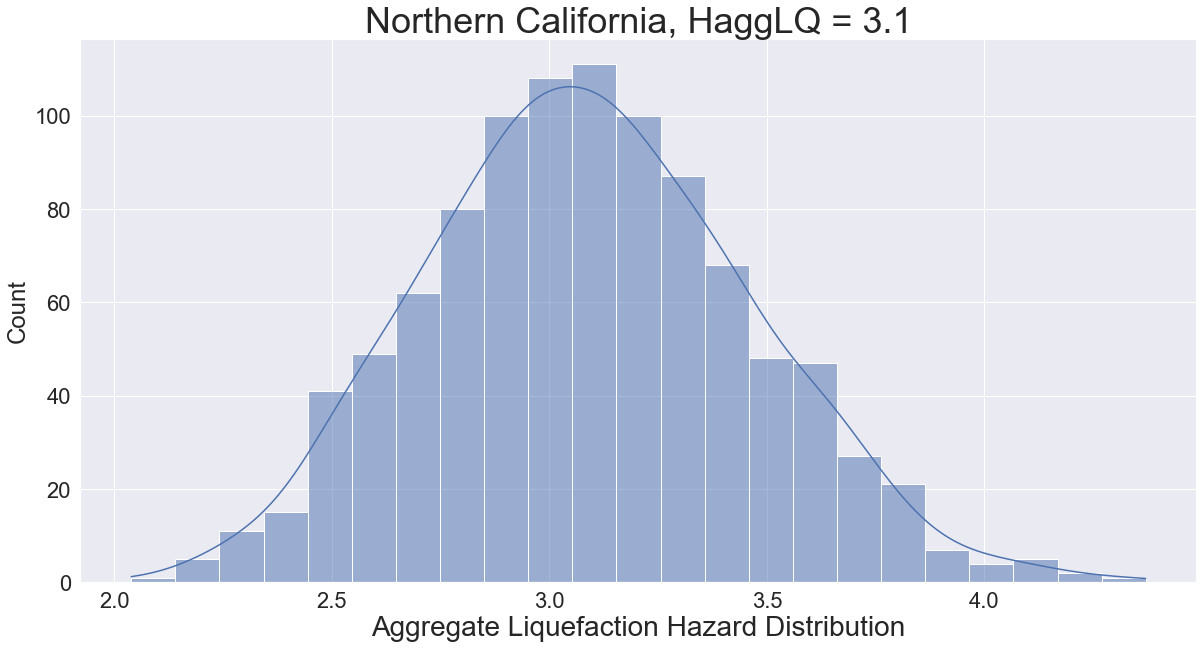

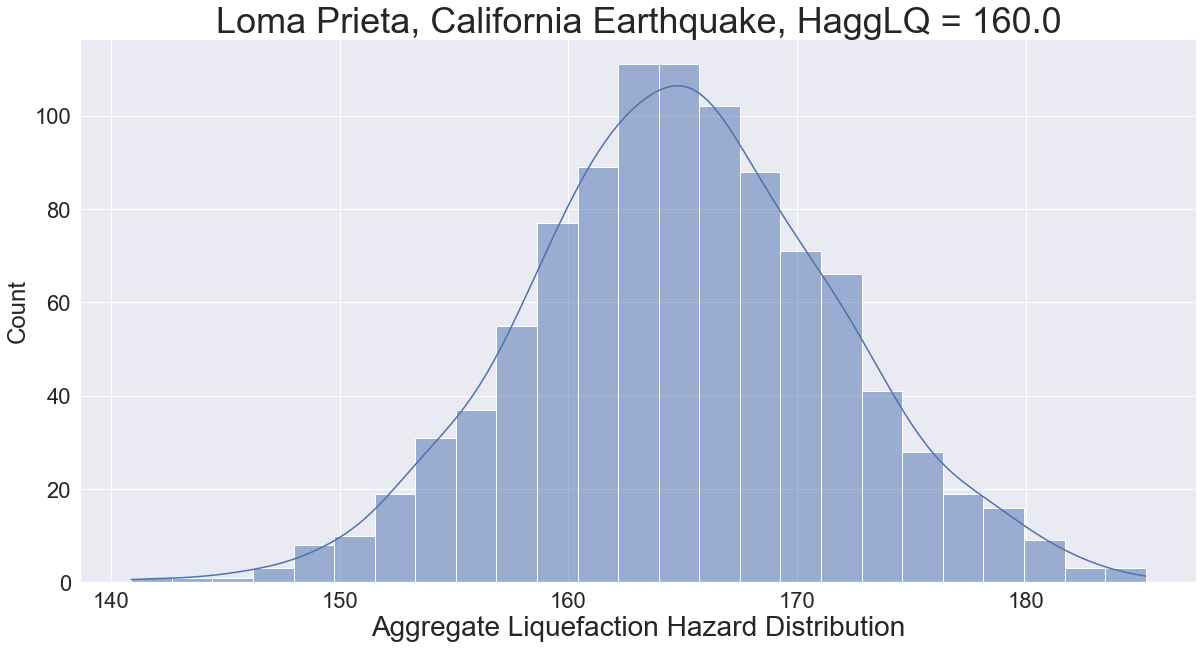

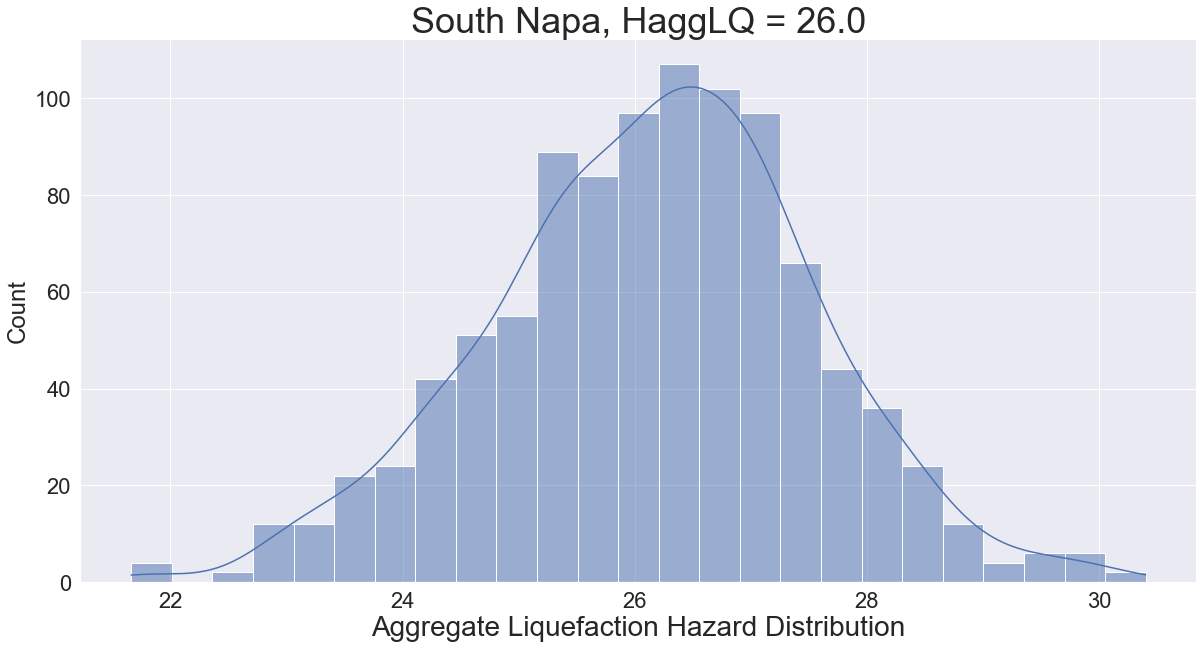

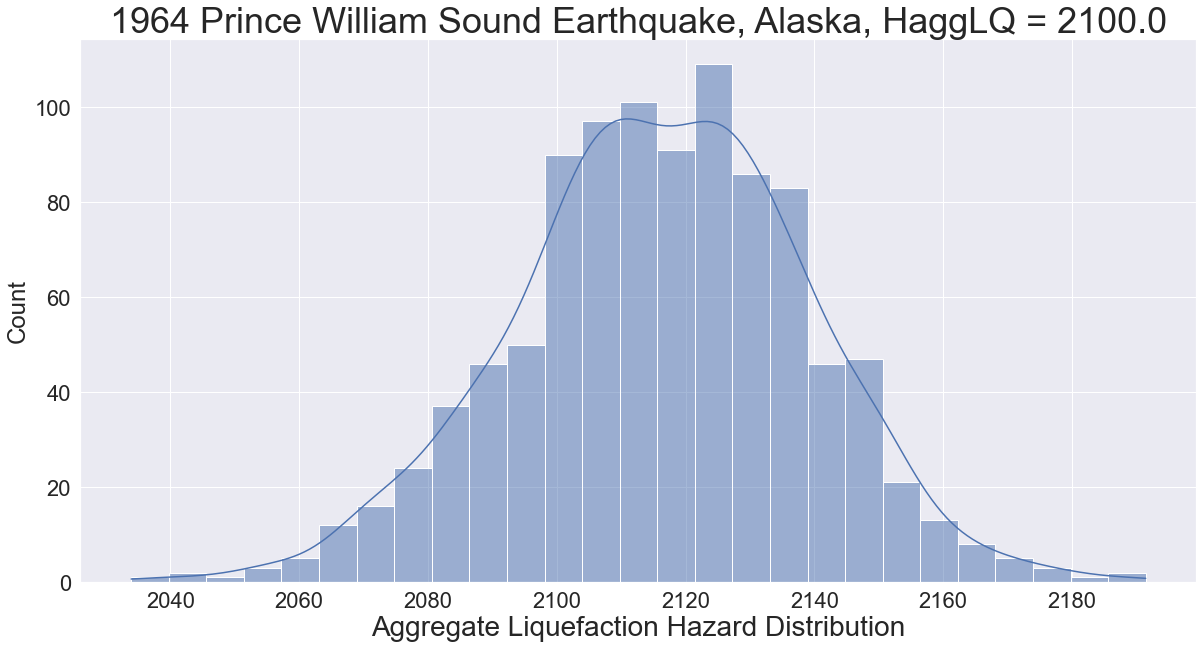

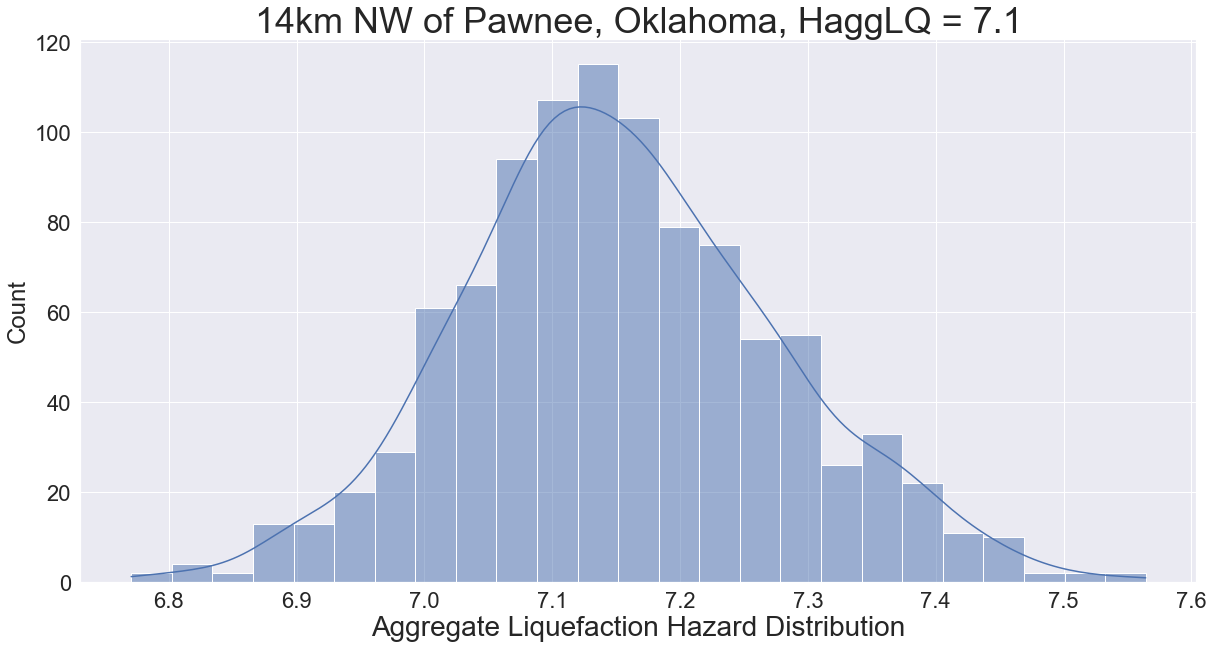

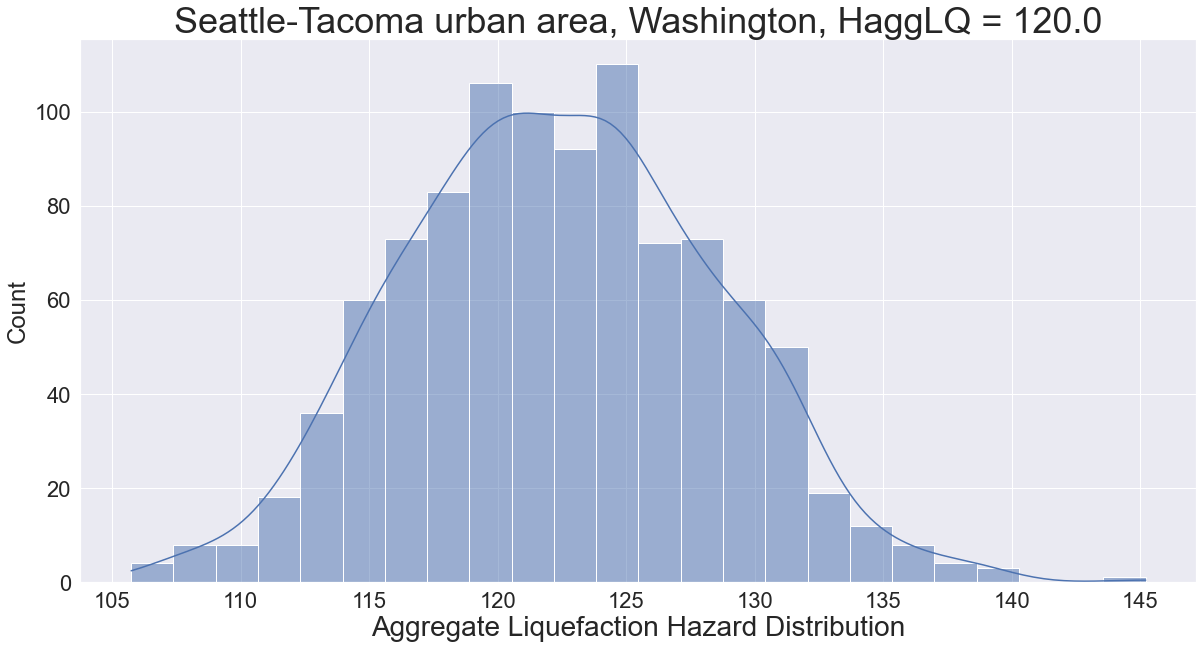

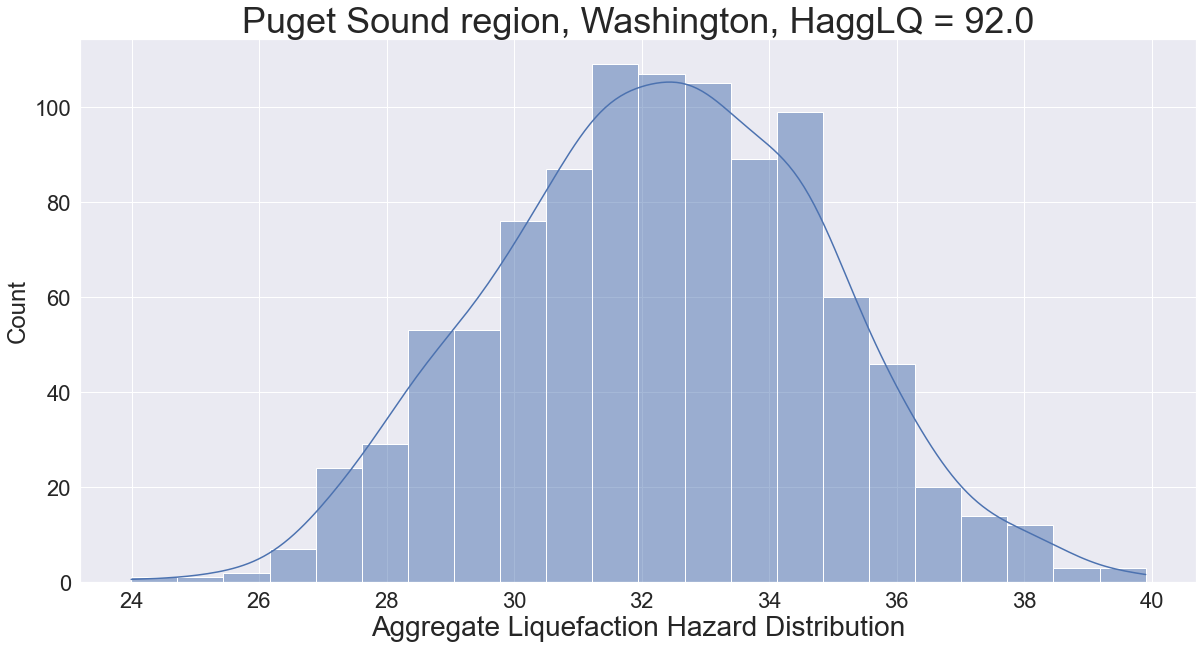

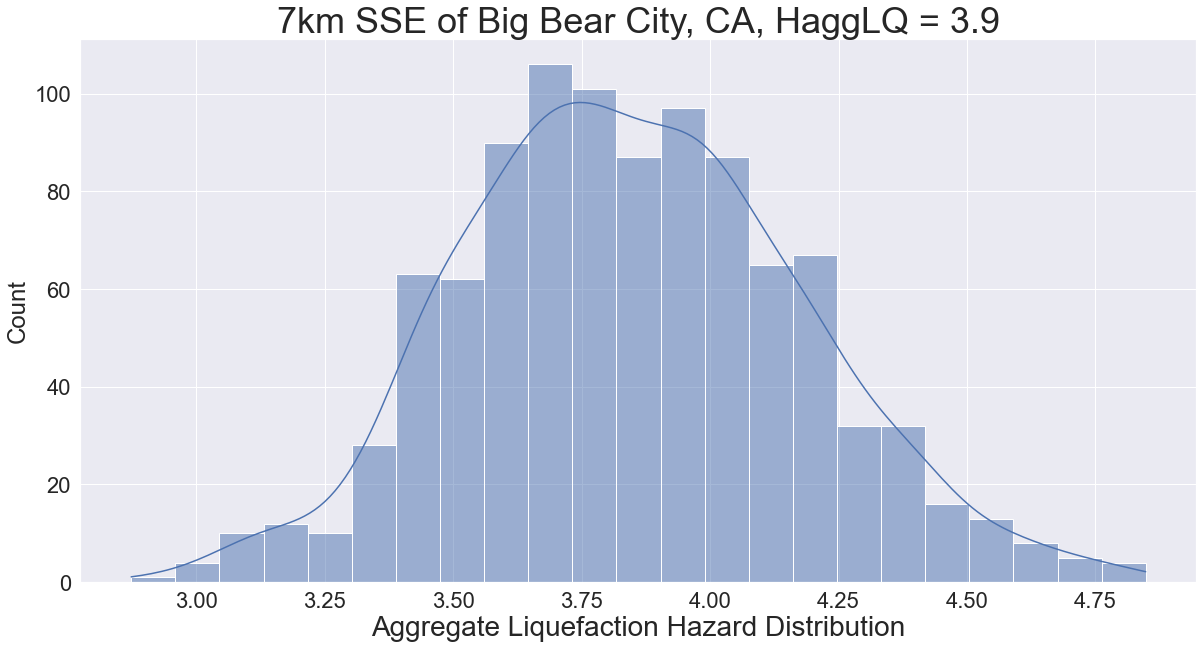

In [25]:
for iii in range(0,df7.shape[0]):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sns.histplot(x=df7.iloc[iii,:], kde=True) # Plots histogram and associated PDF
    
    plt.xlabel('Aggregate Liquefaction Hazard Distribution', fontsize=28)
    #plt.ylabel('Aggregate Liquefaction Hazard Mean', fontsize=28)
    plt.title(str(df.iloc[iii,4])+', HaggLQ = '+str(df.iloc[iii,5]), fontsize=36) # Setting the title as the location where event occurred

# Intermediate Plot 2

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


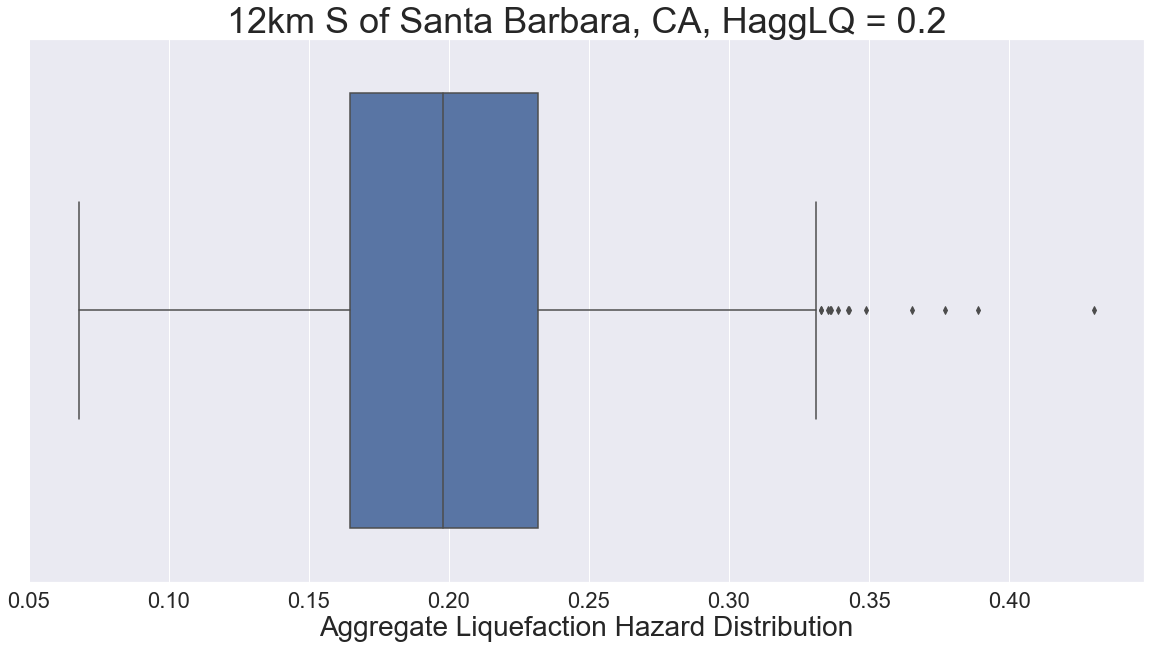

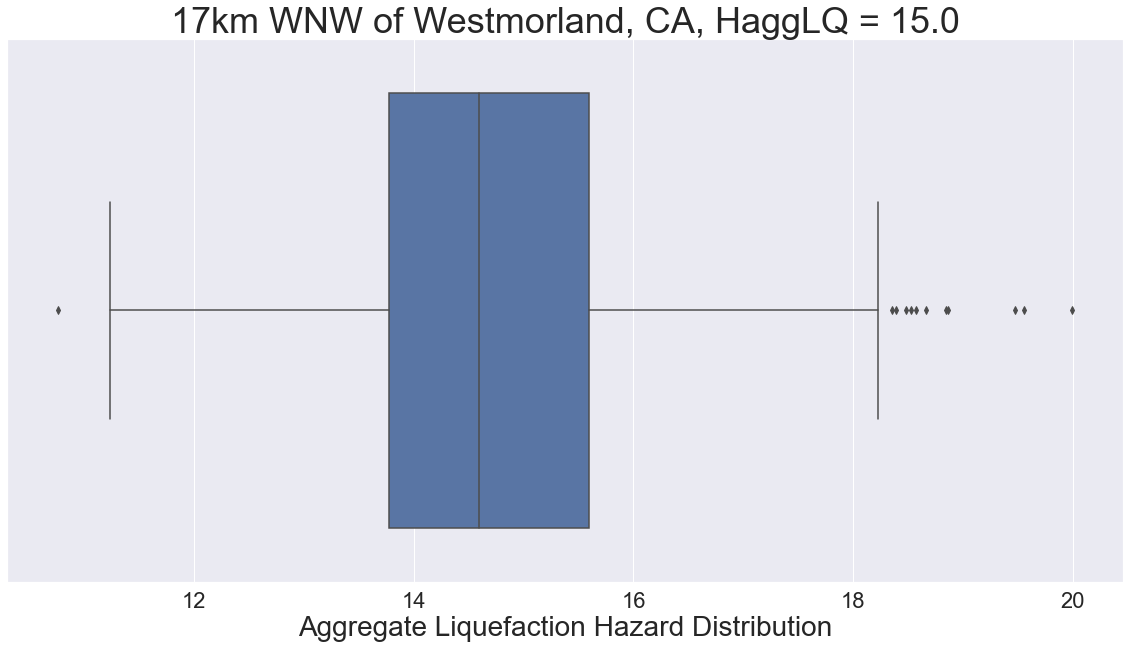

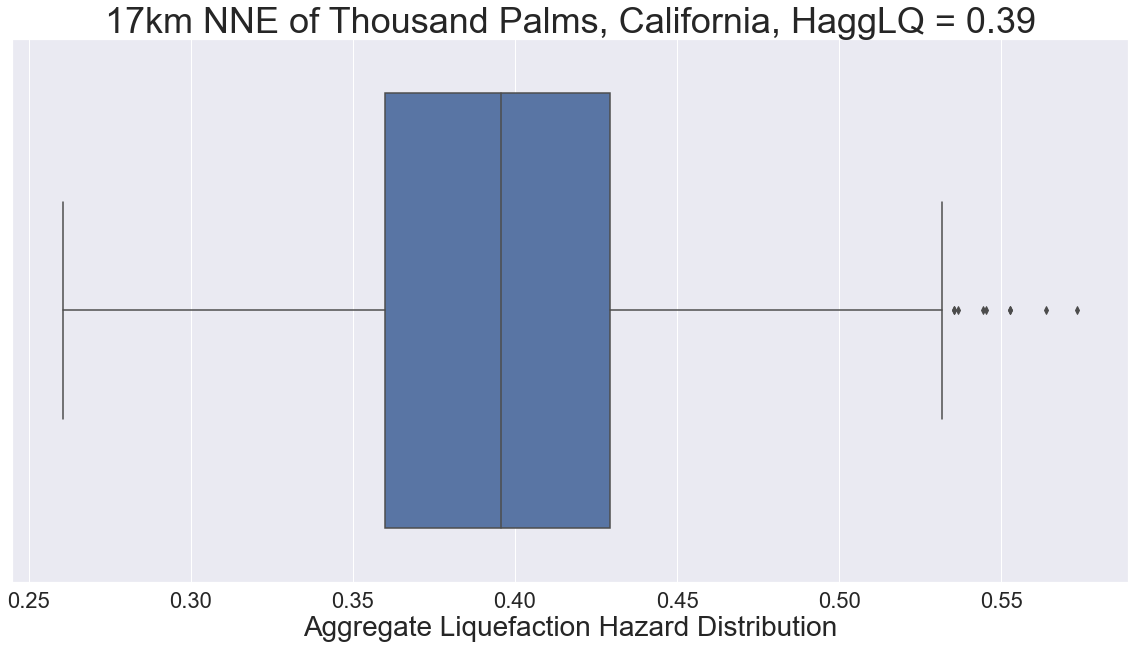

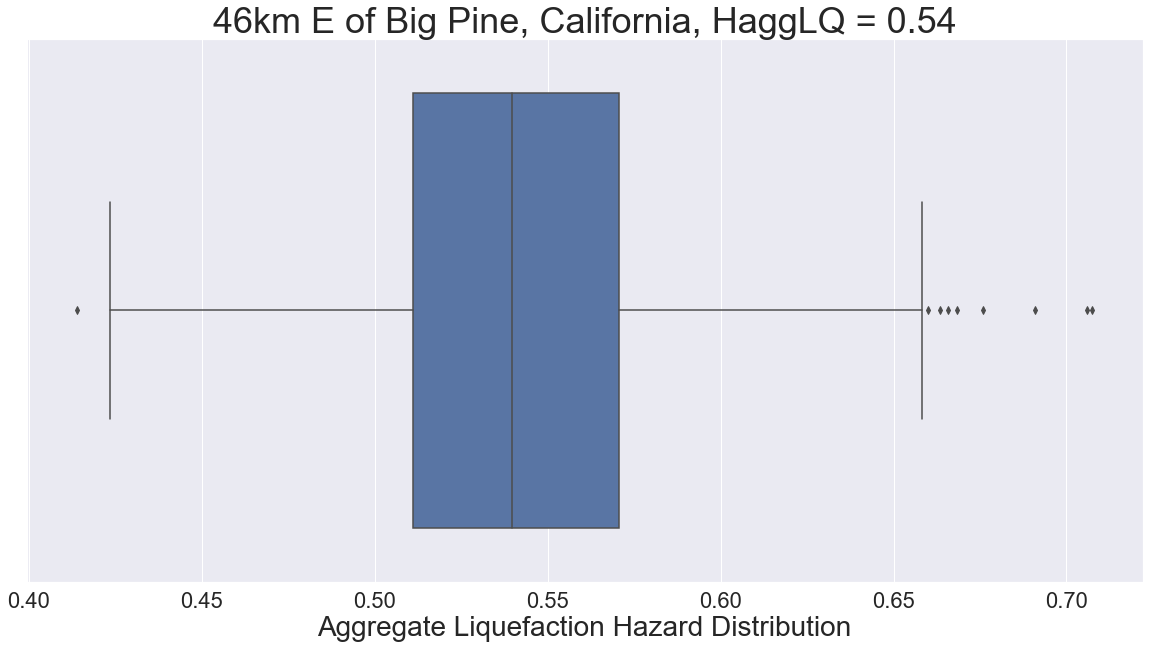

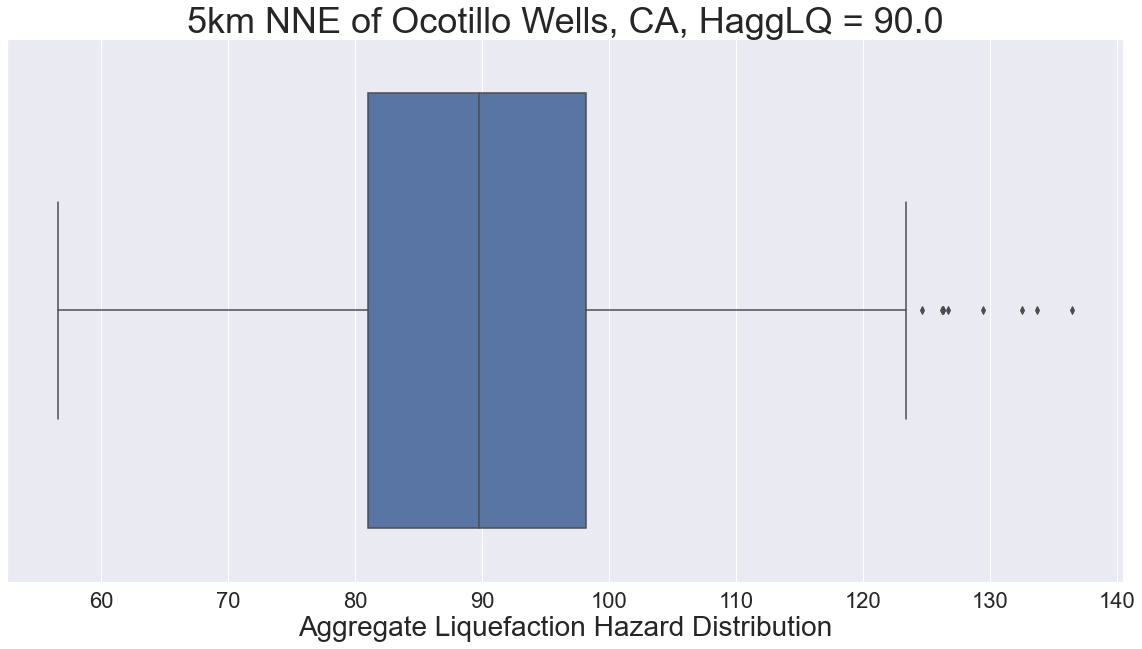

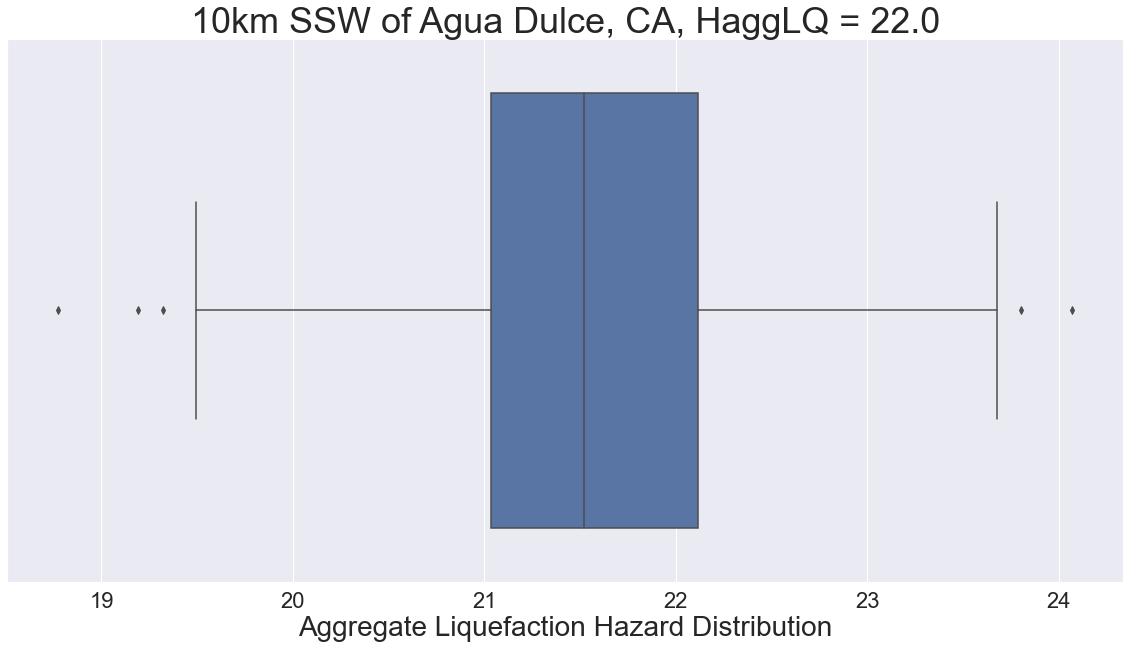

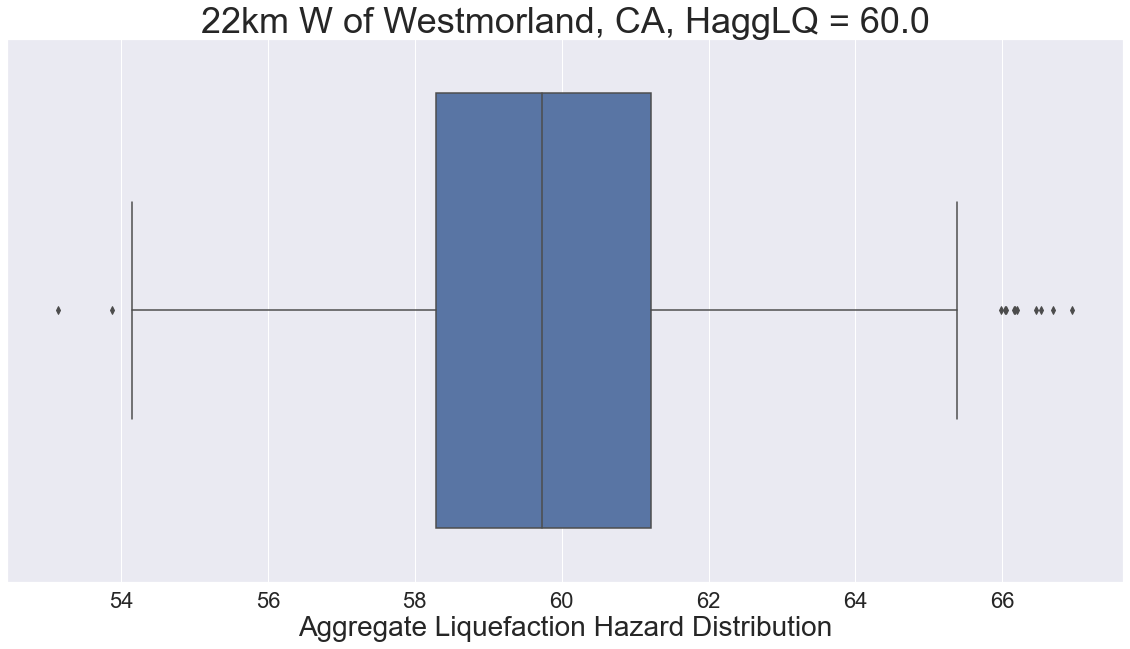

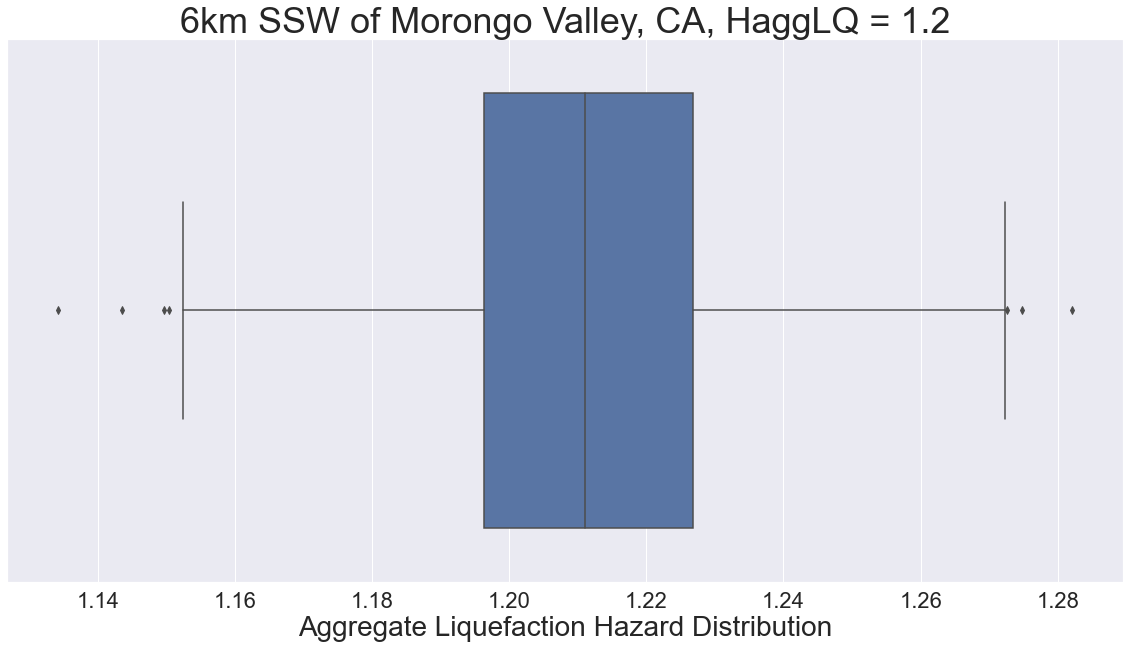

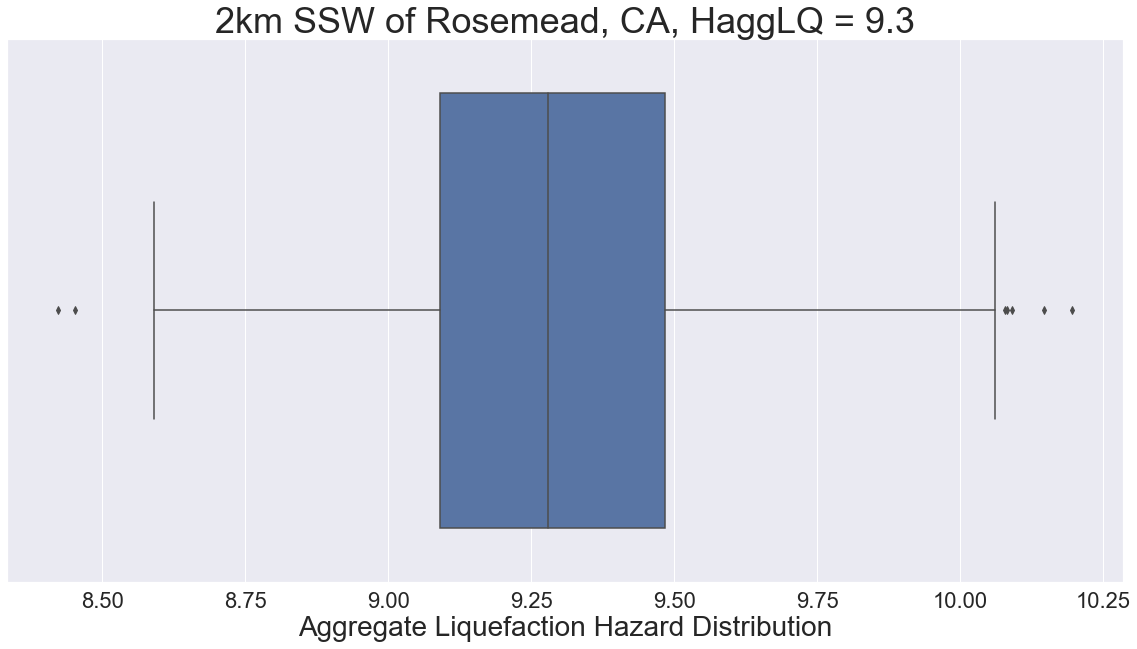

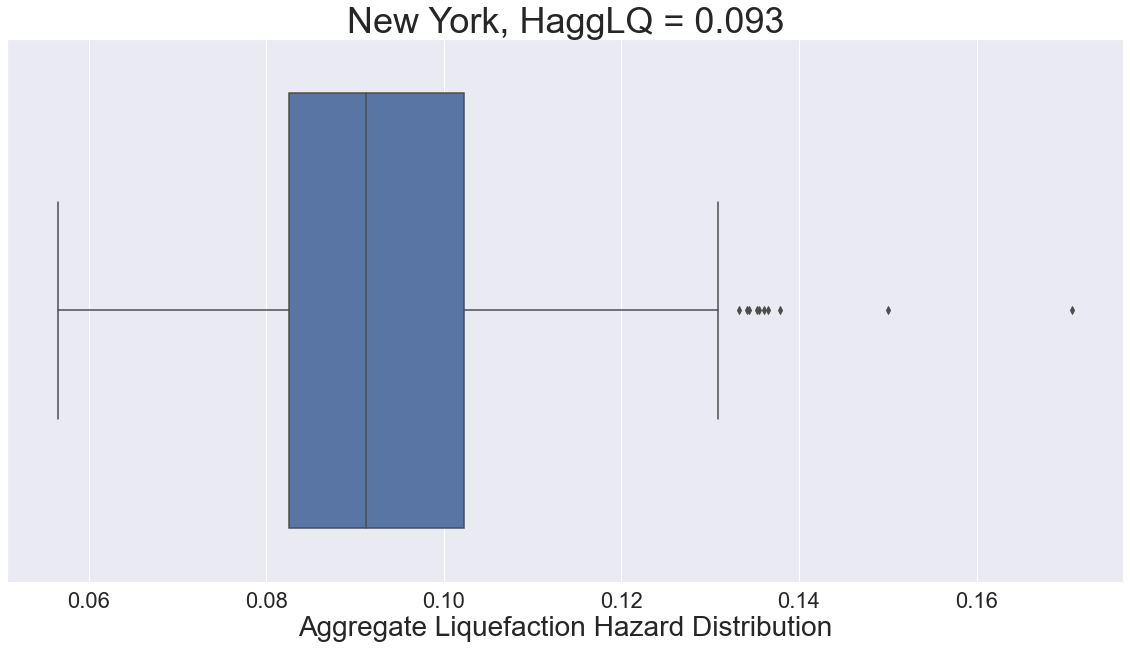

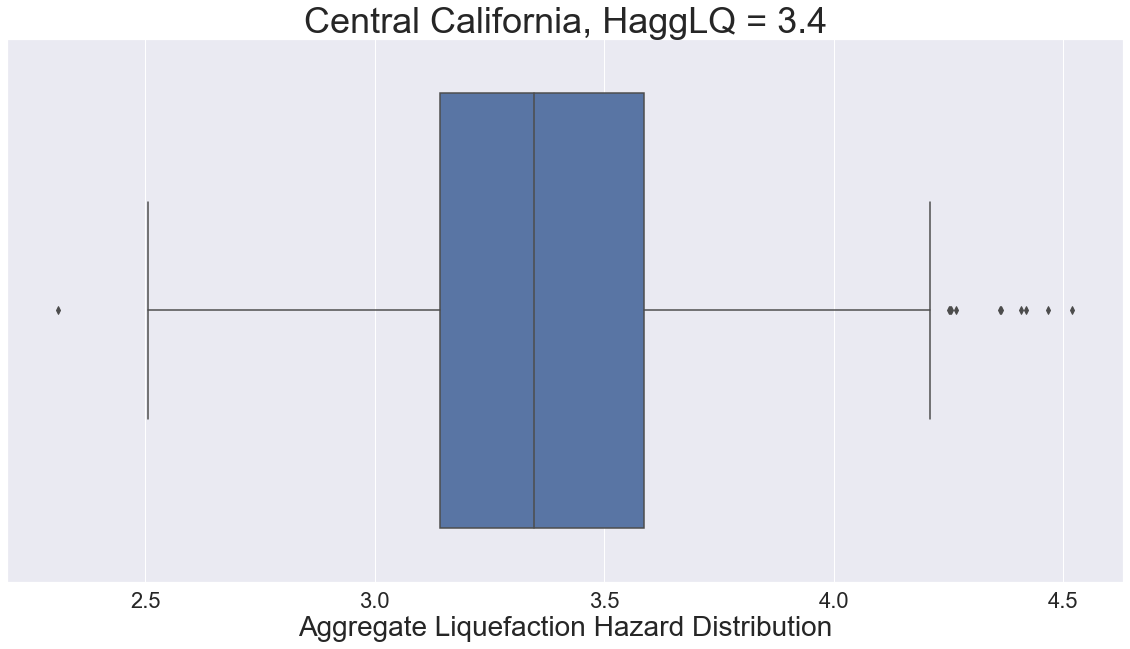

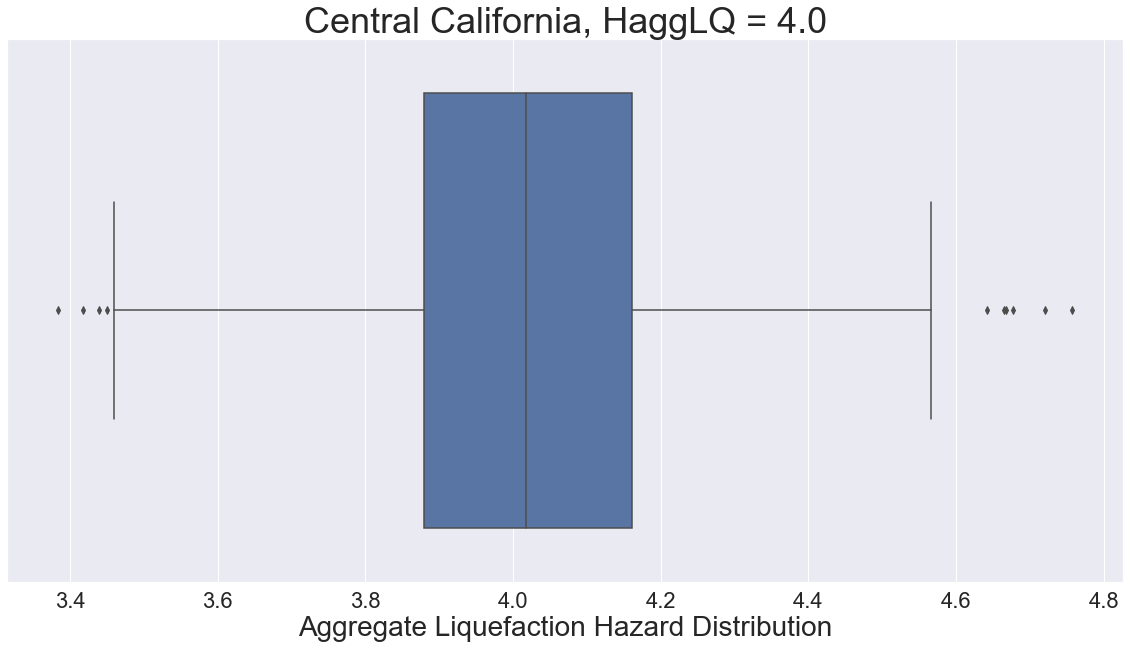

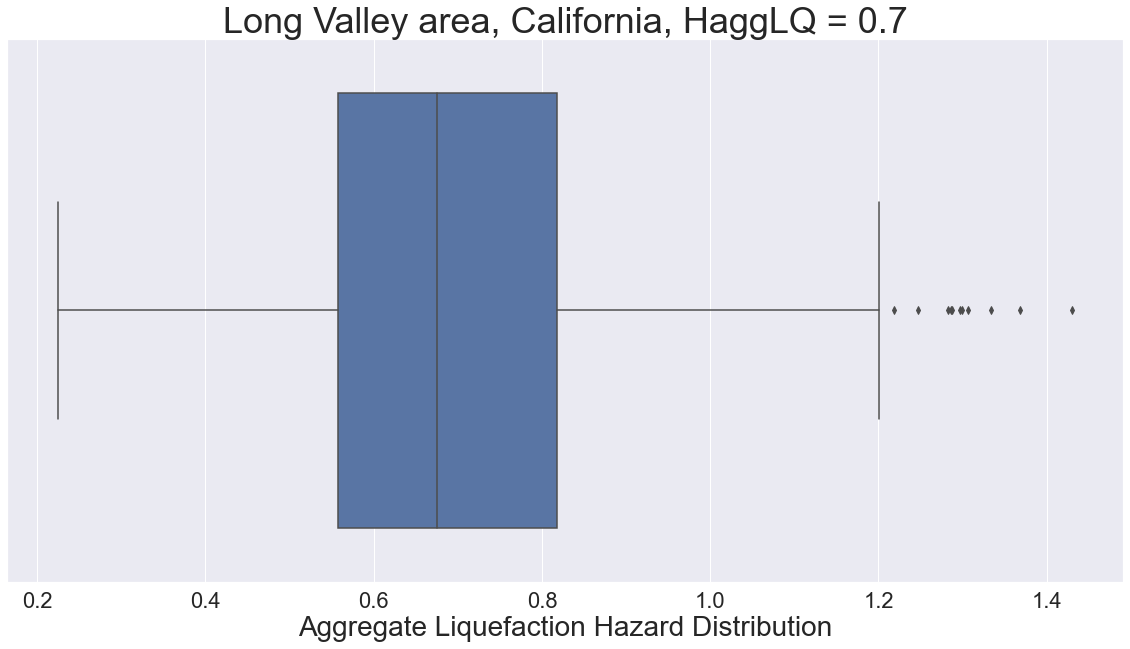

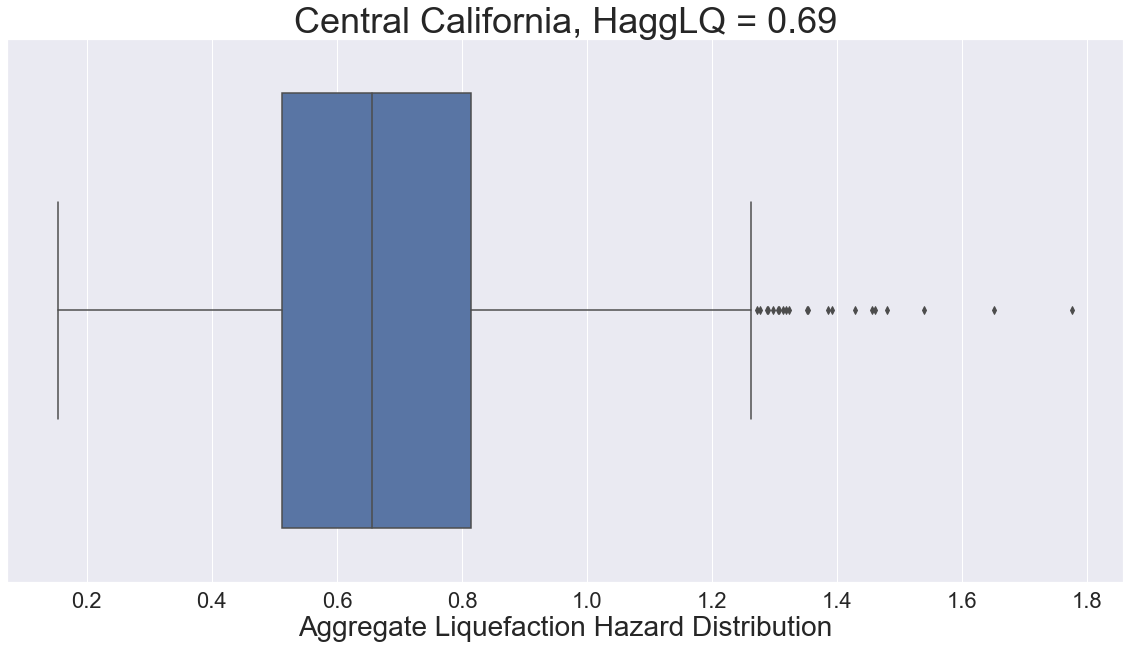

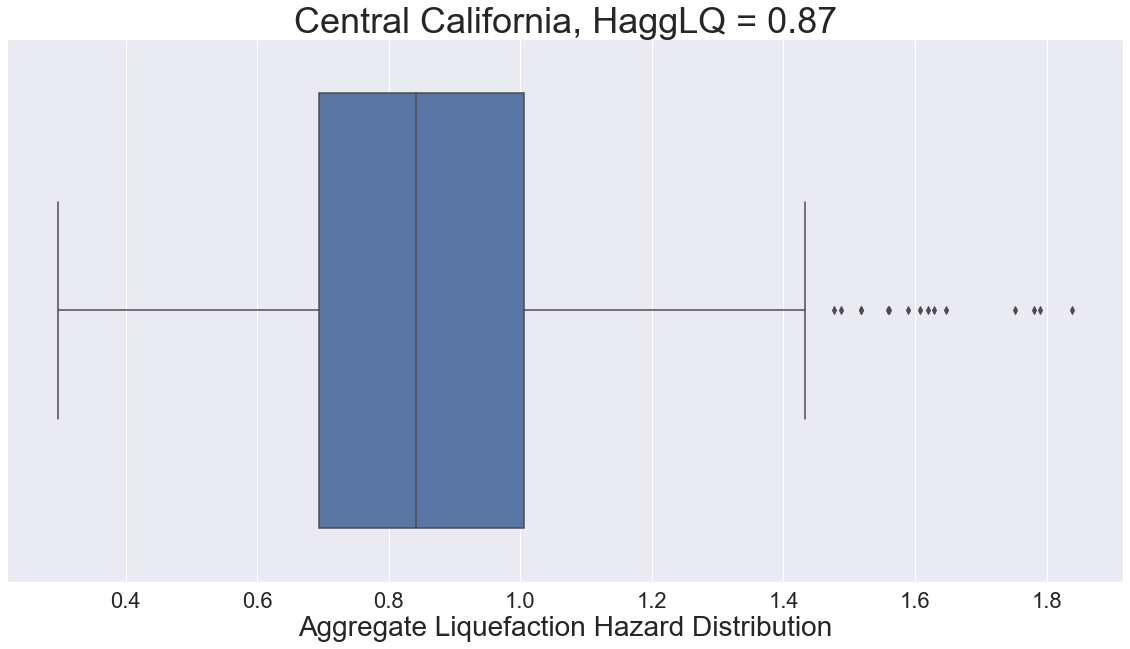

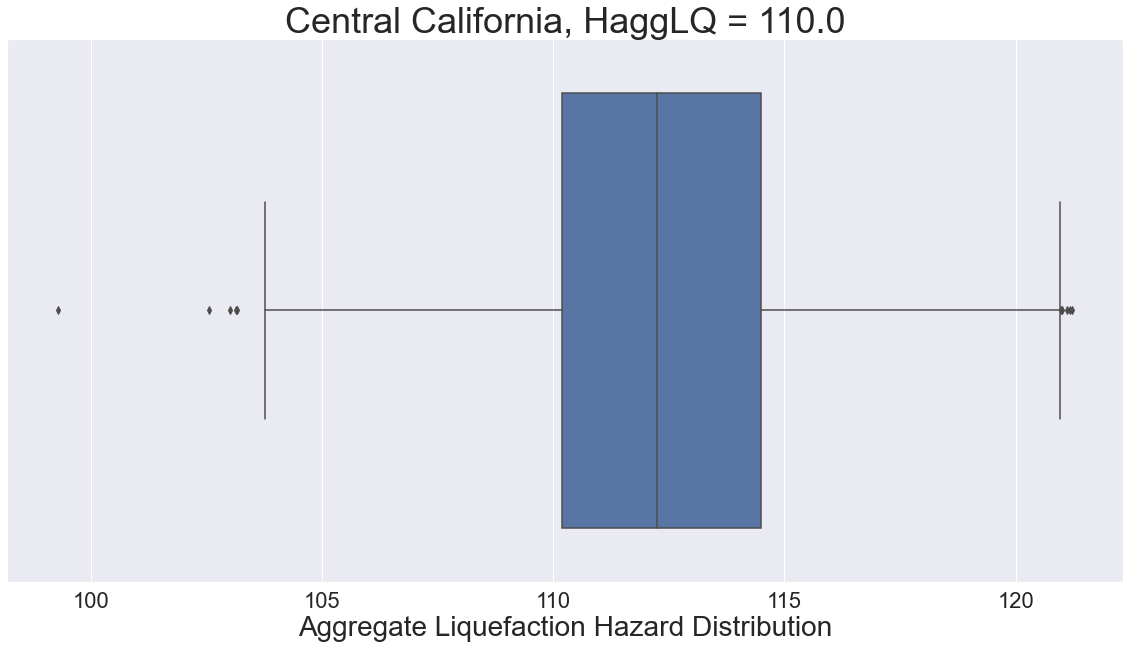

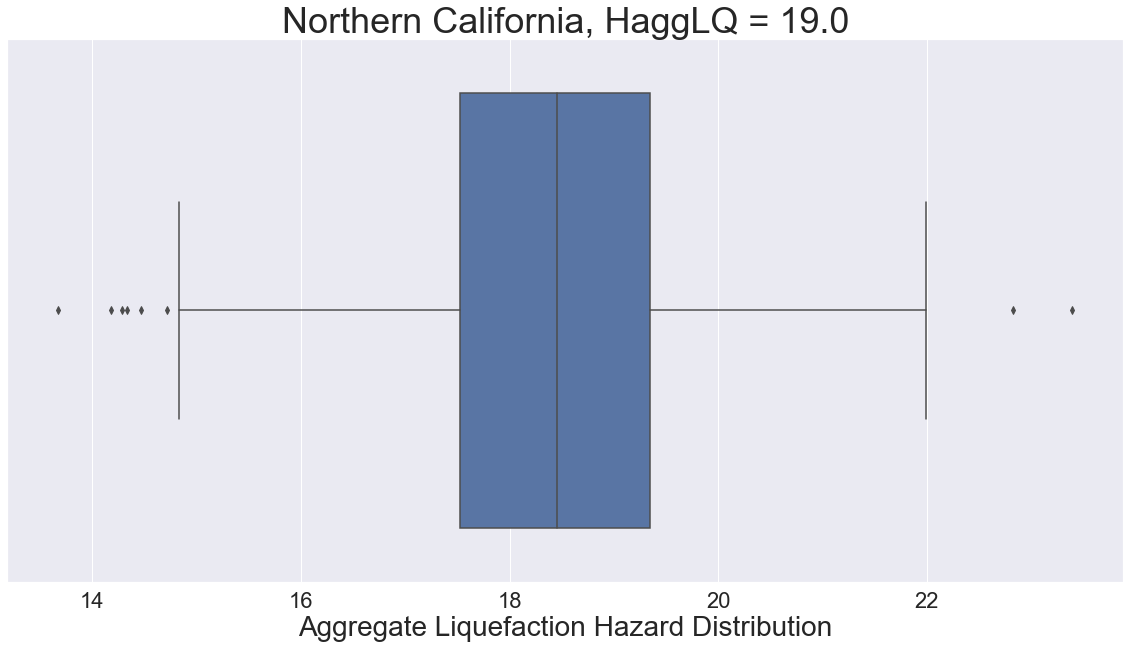

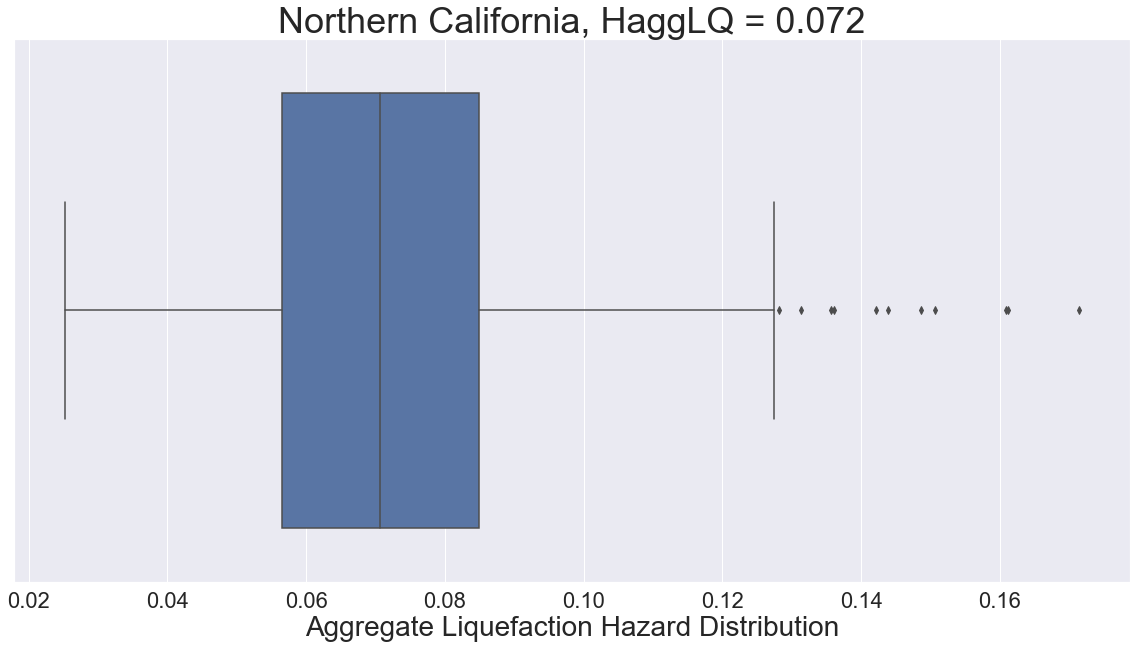

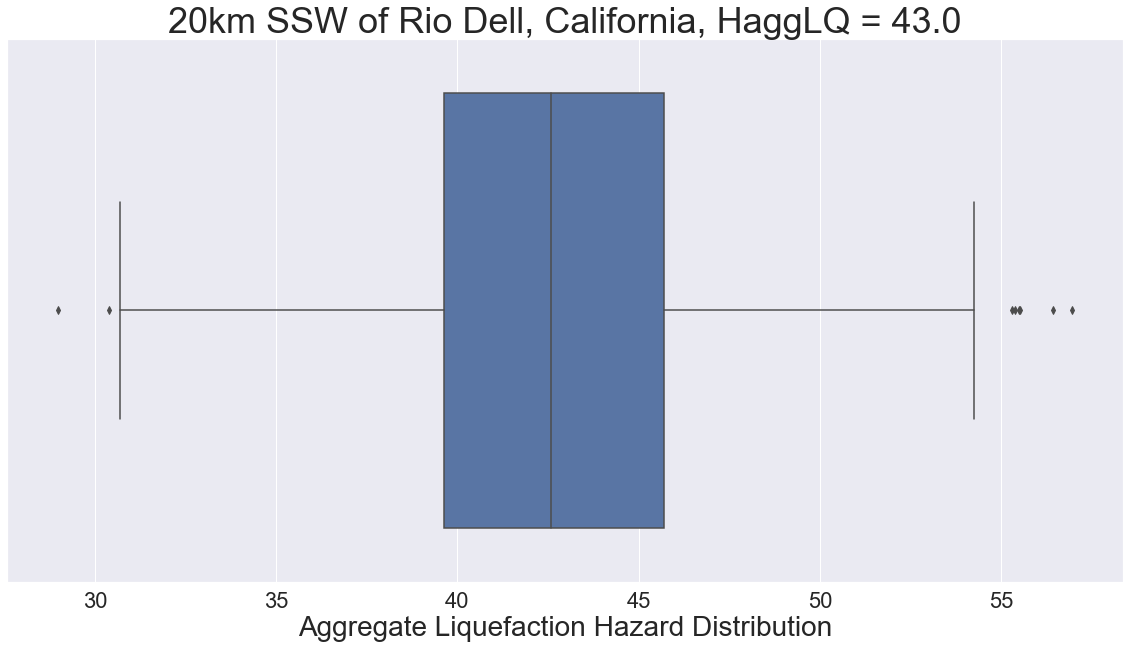

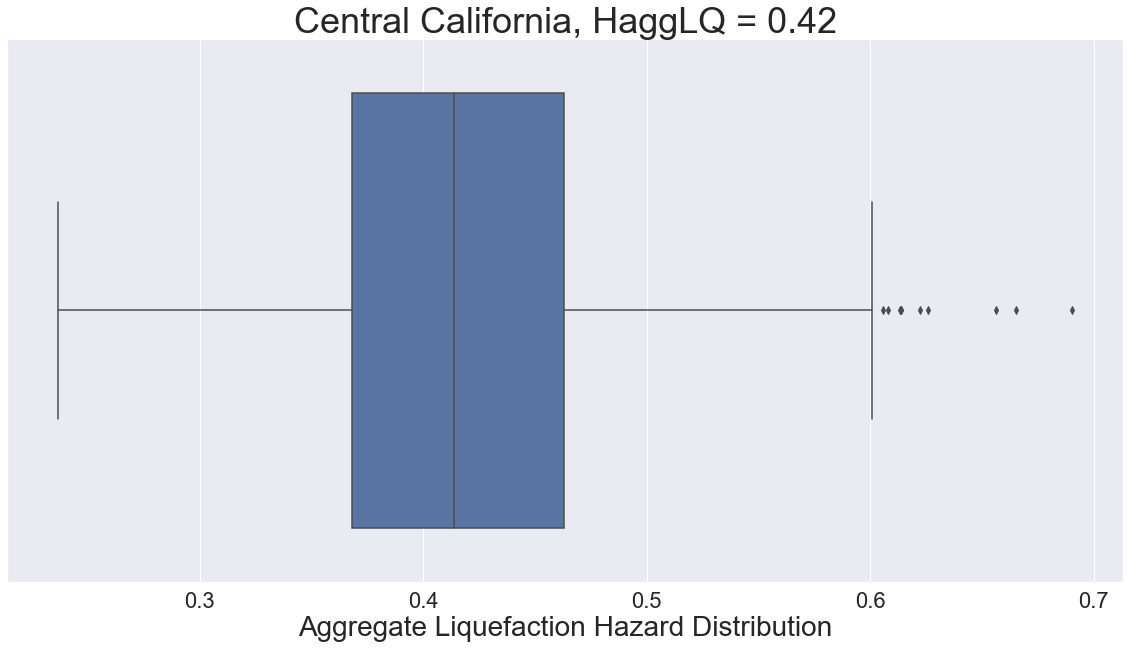

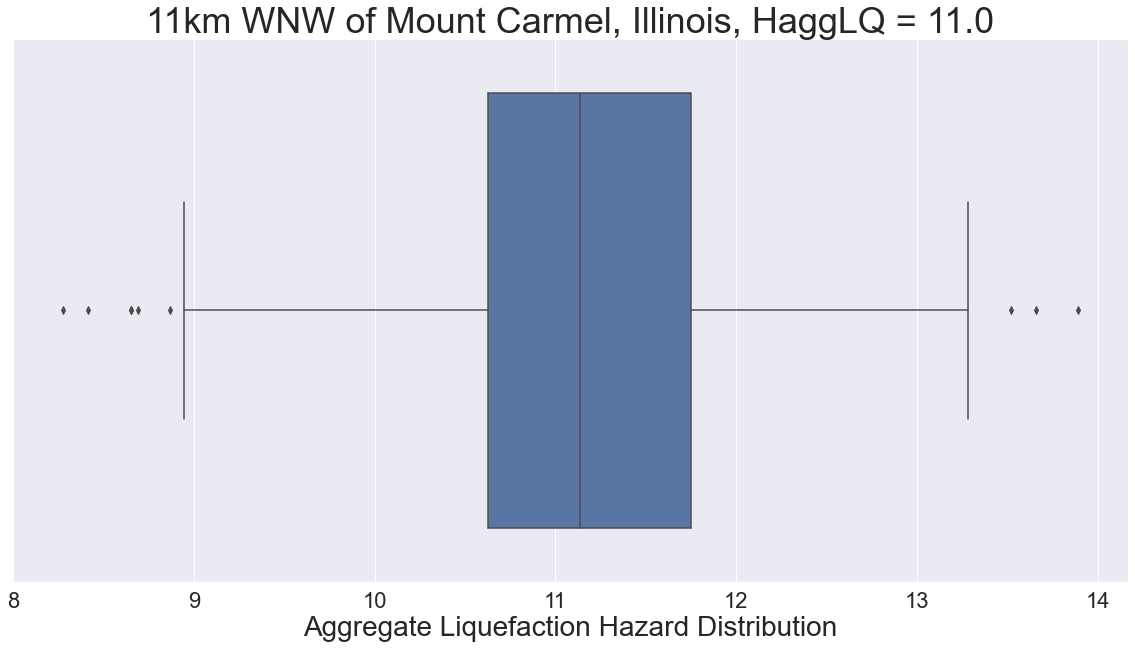

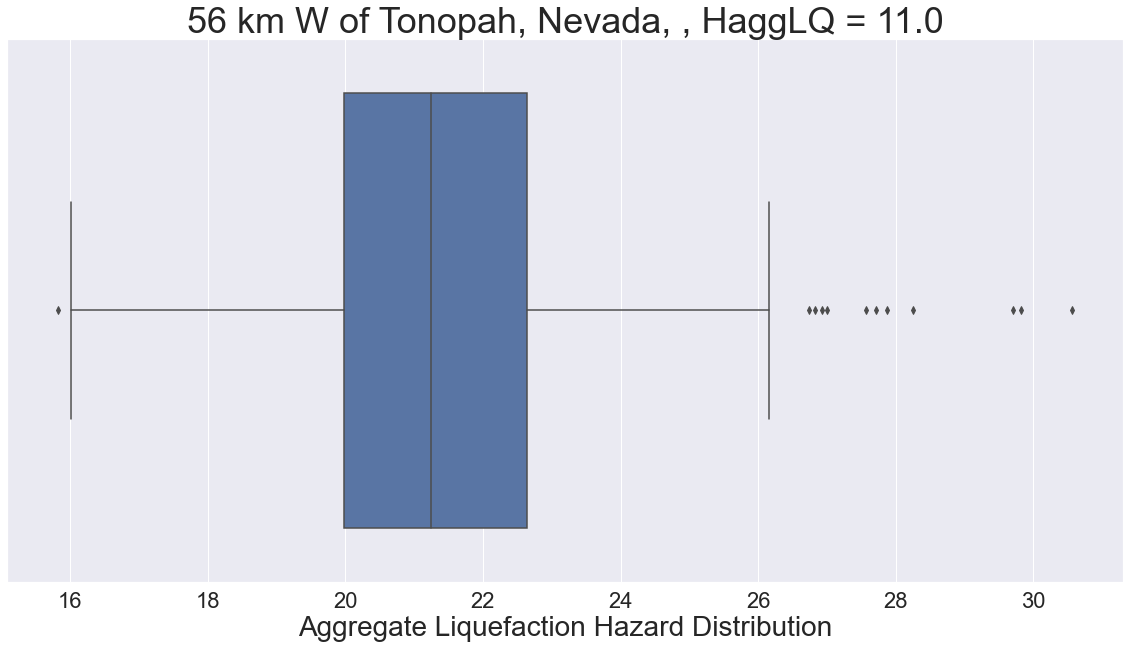

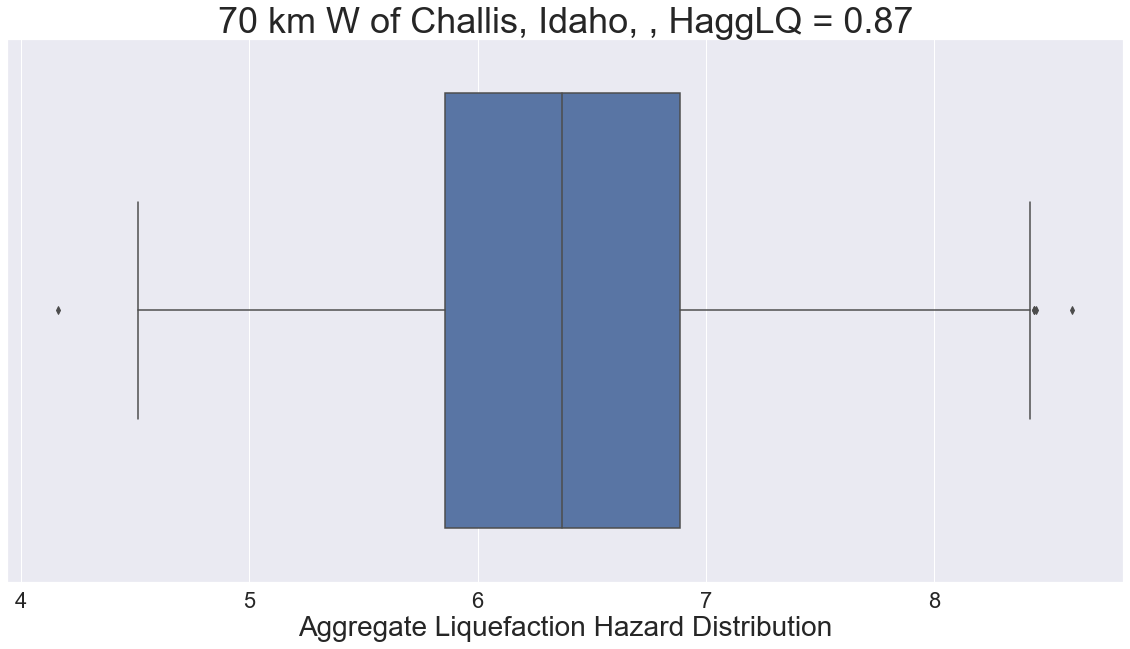

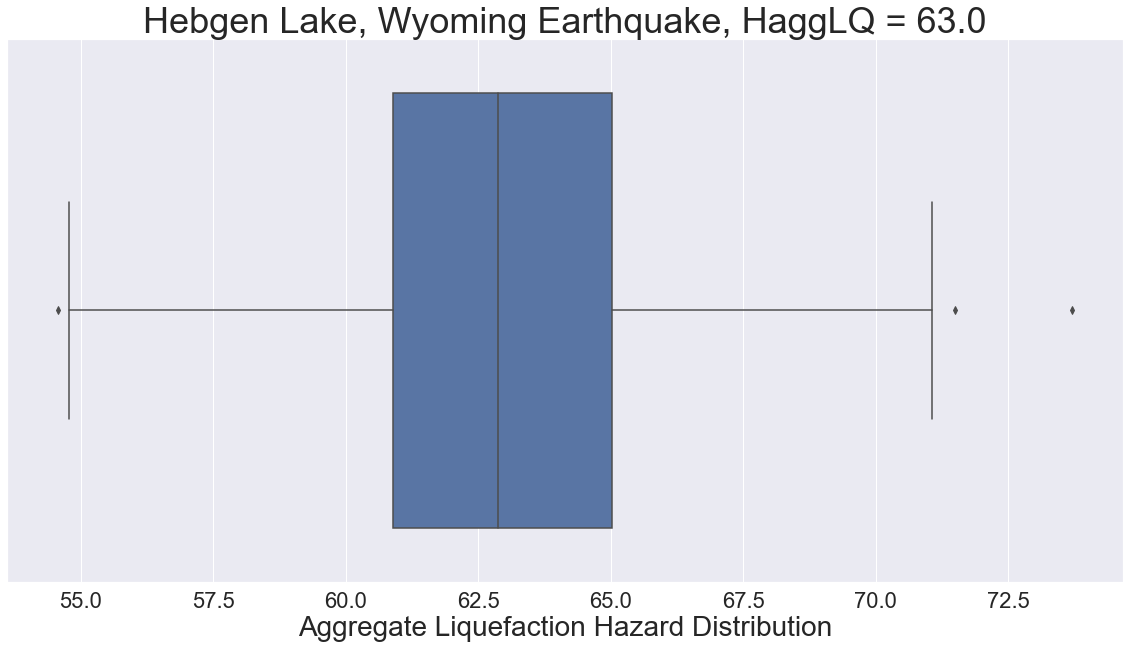

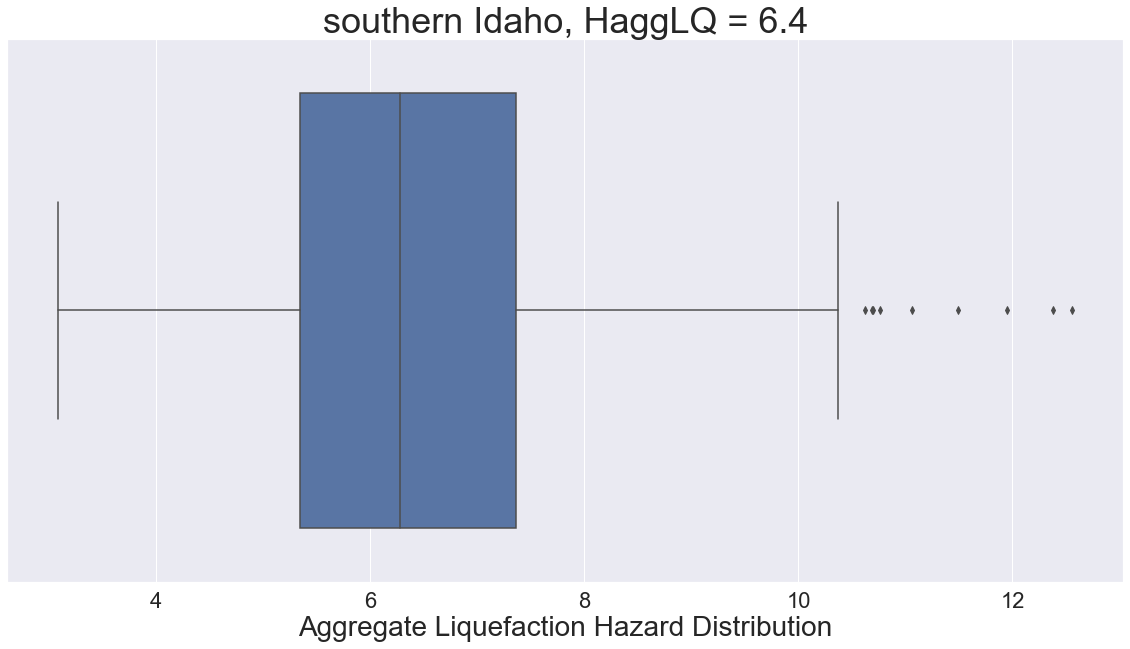

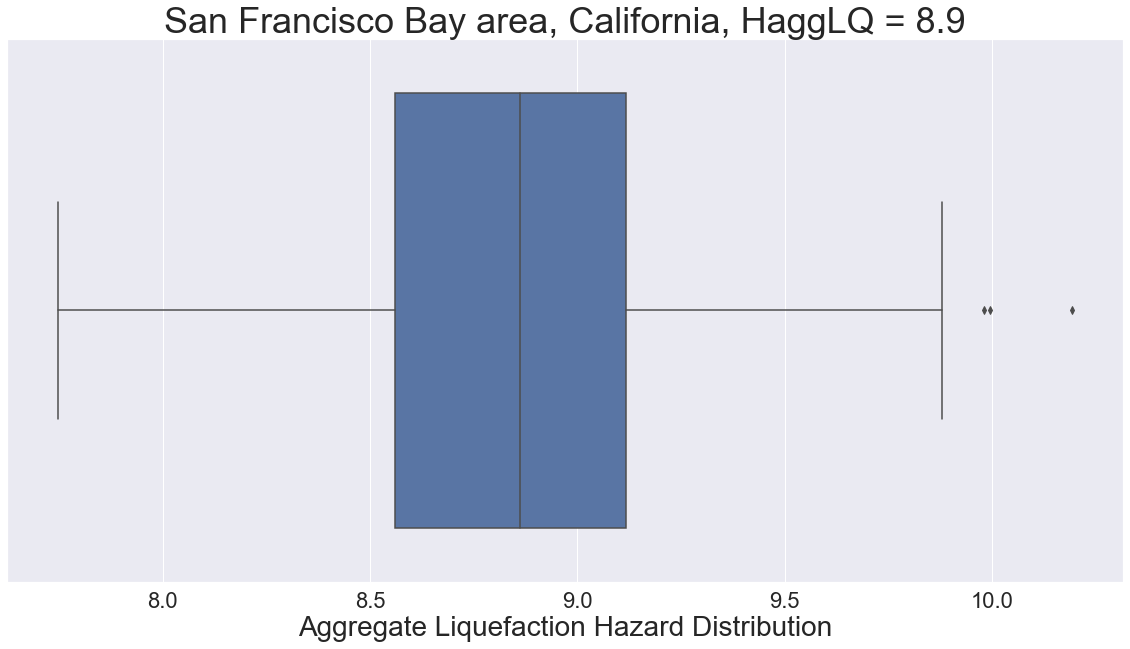

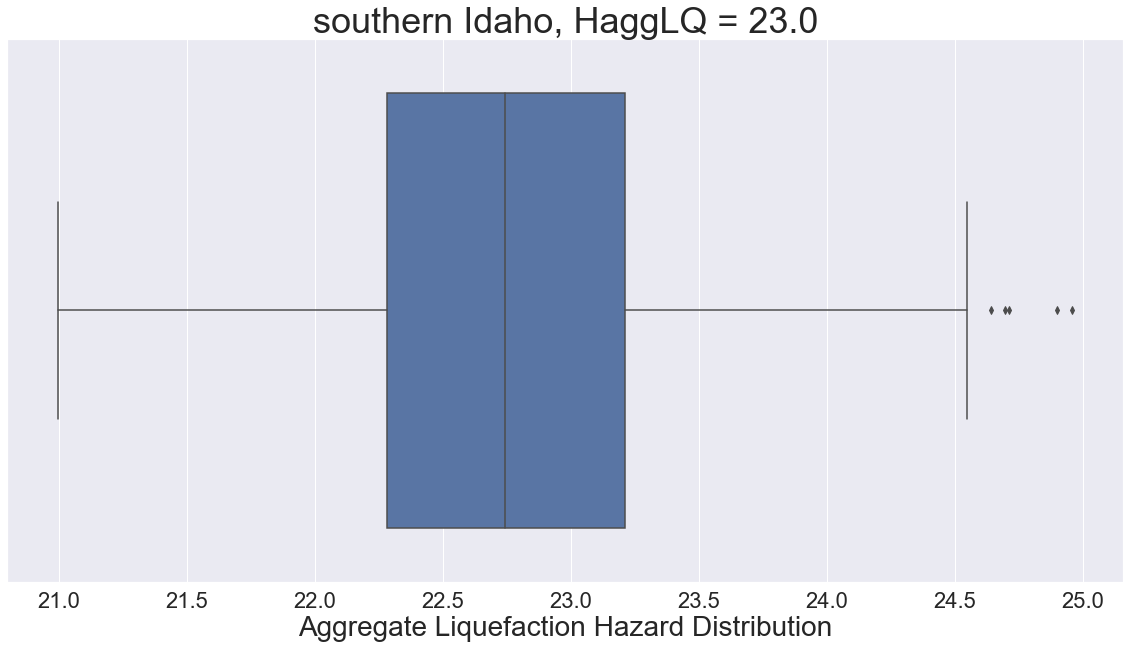

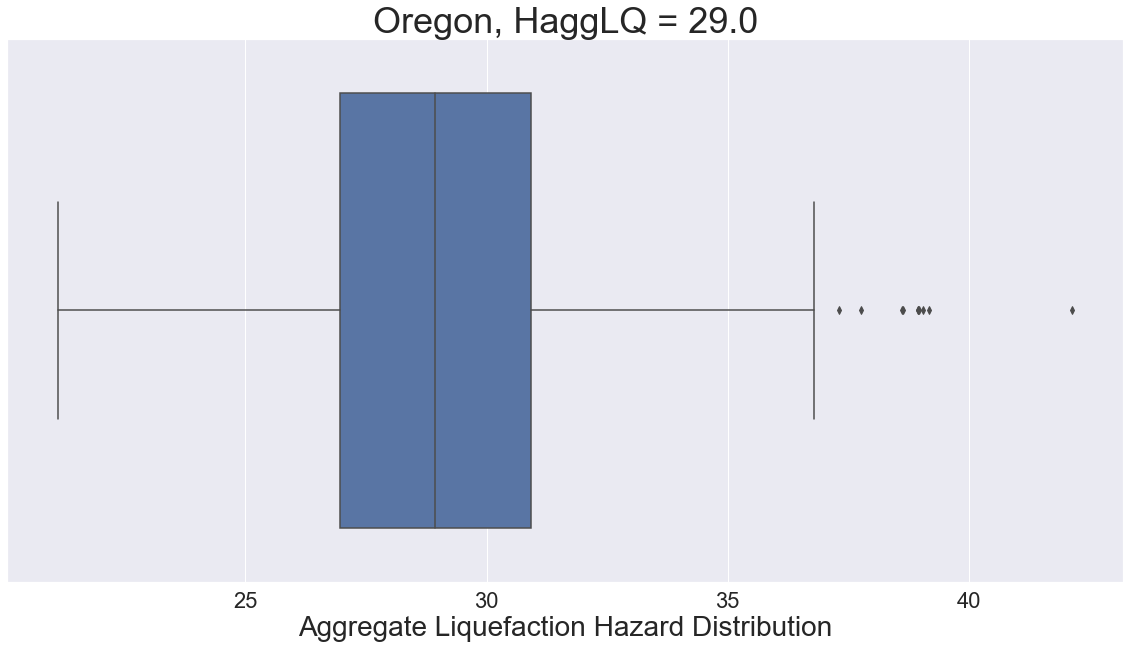

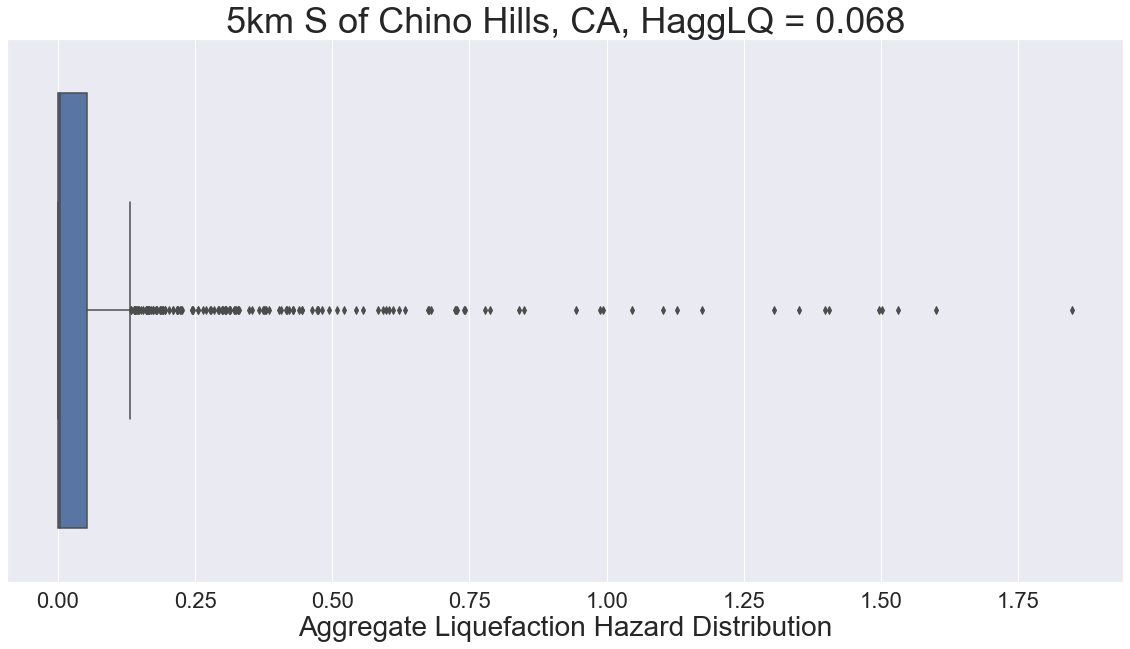

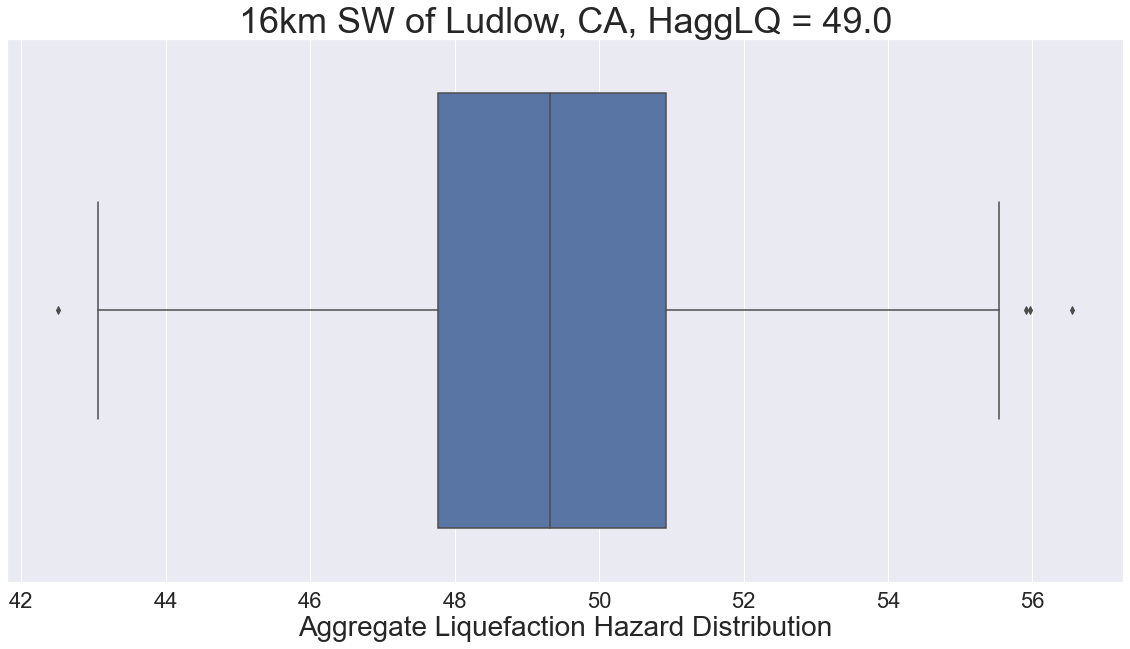

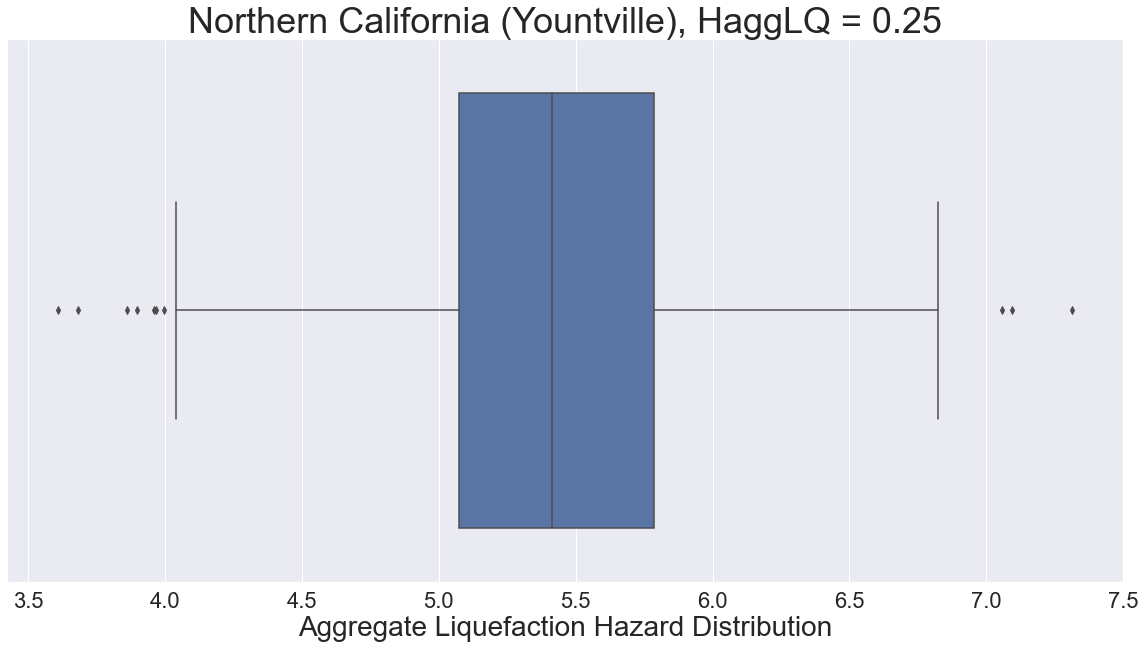

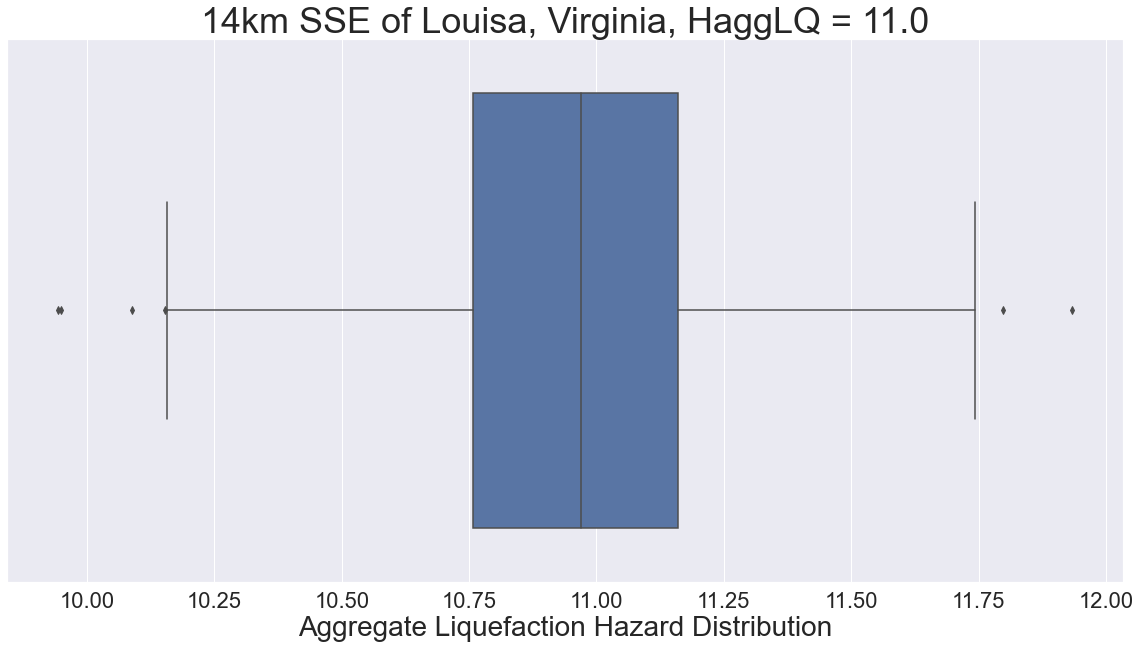

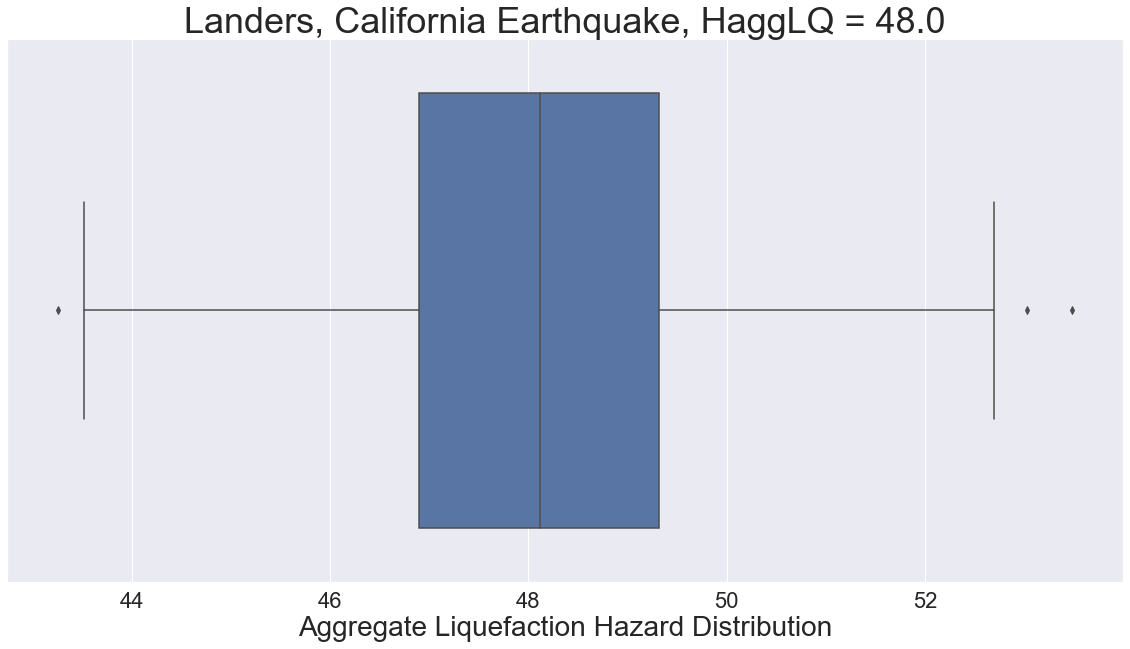

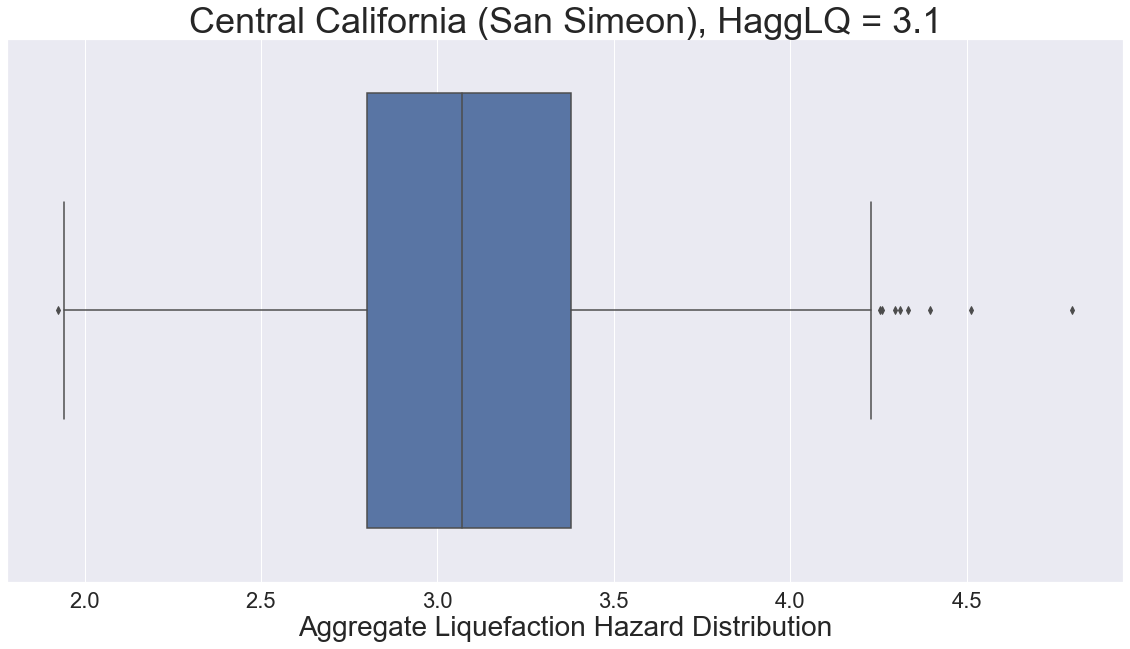

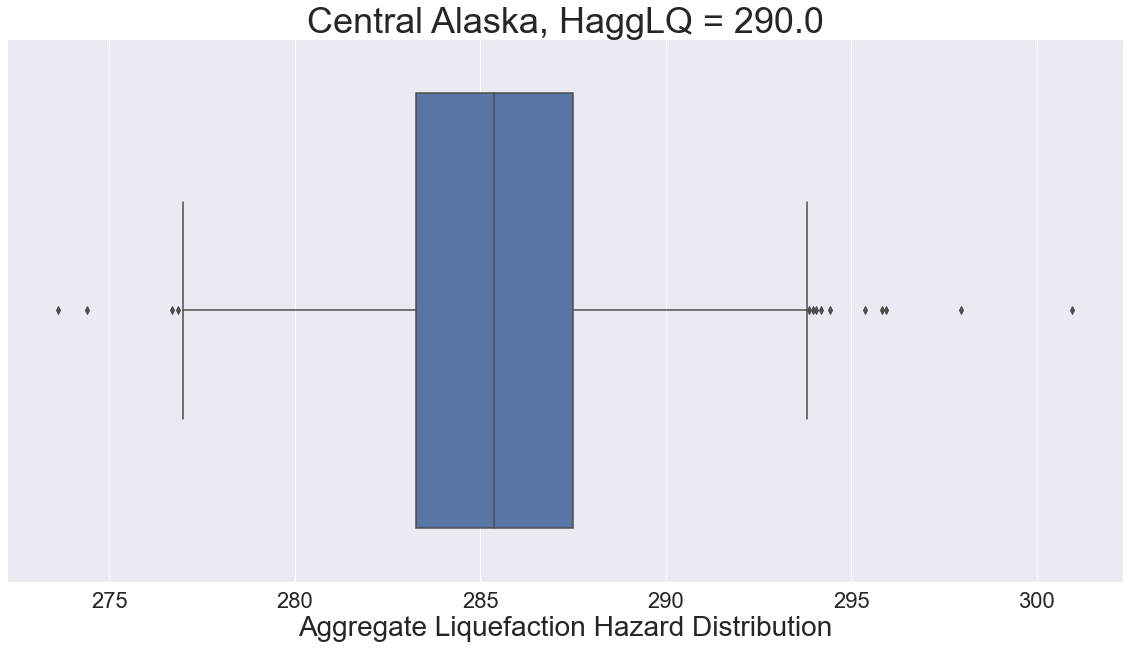

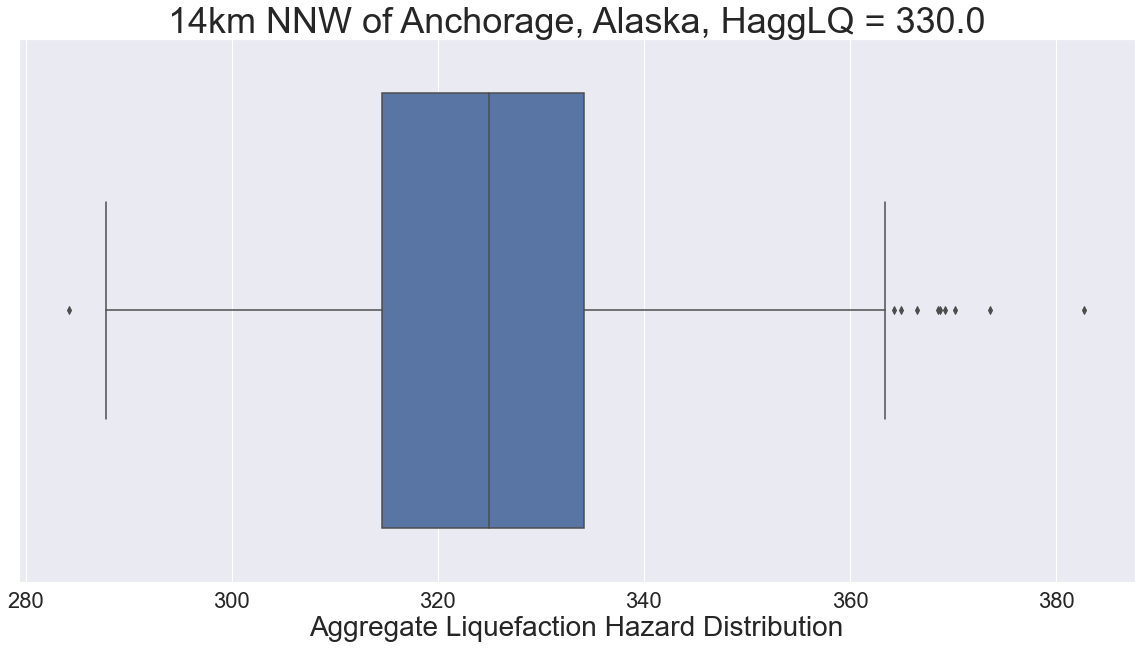

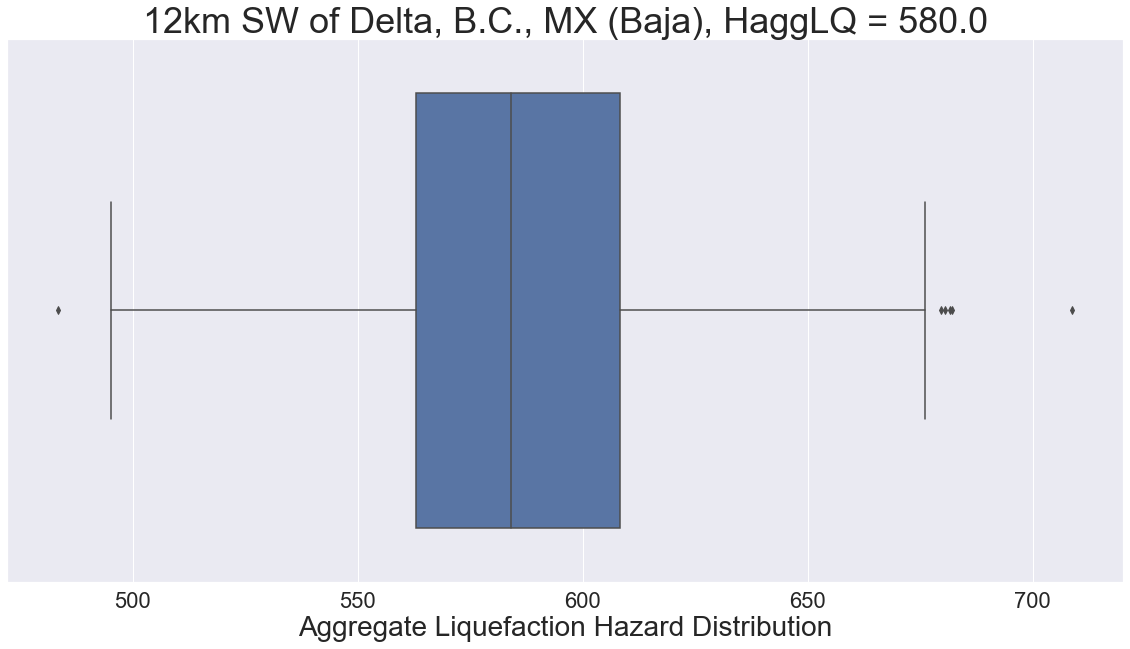

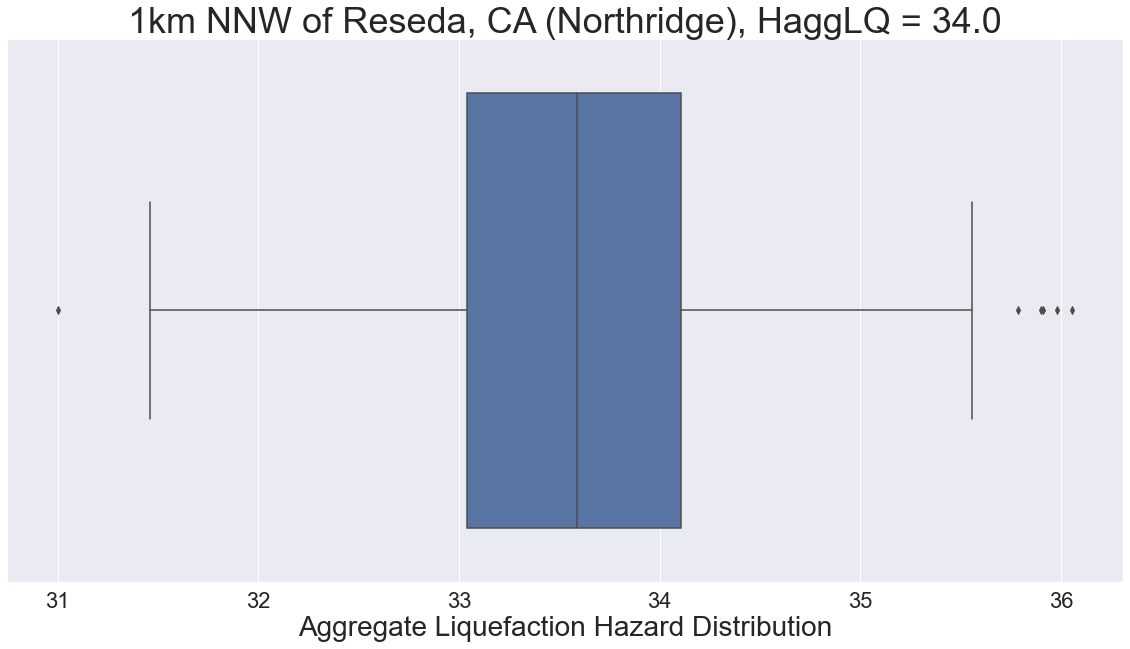

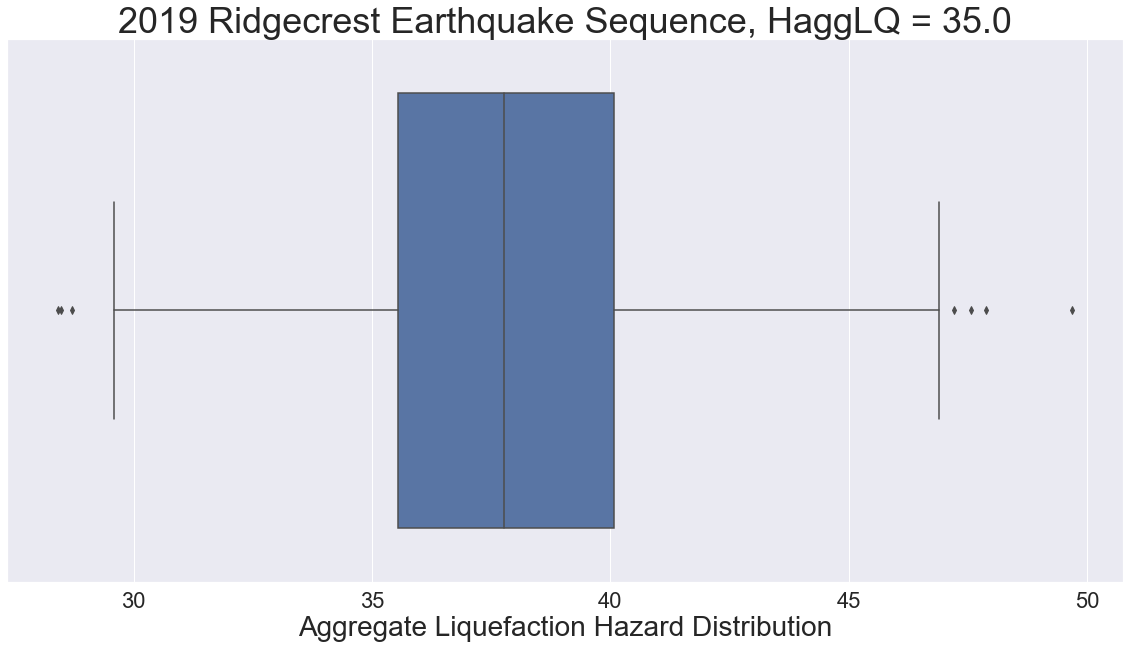

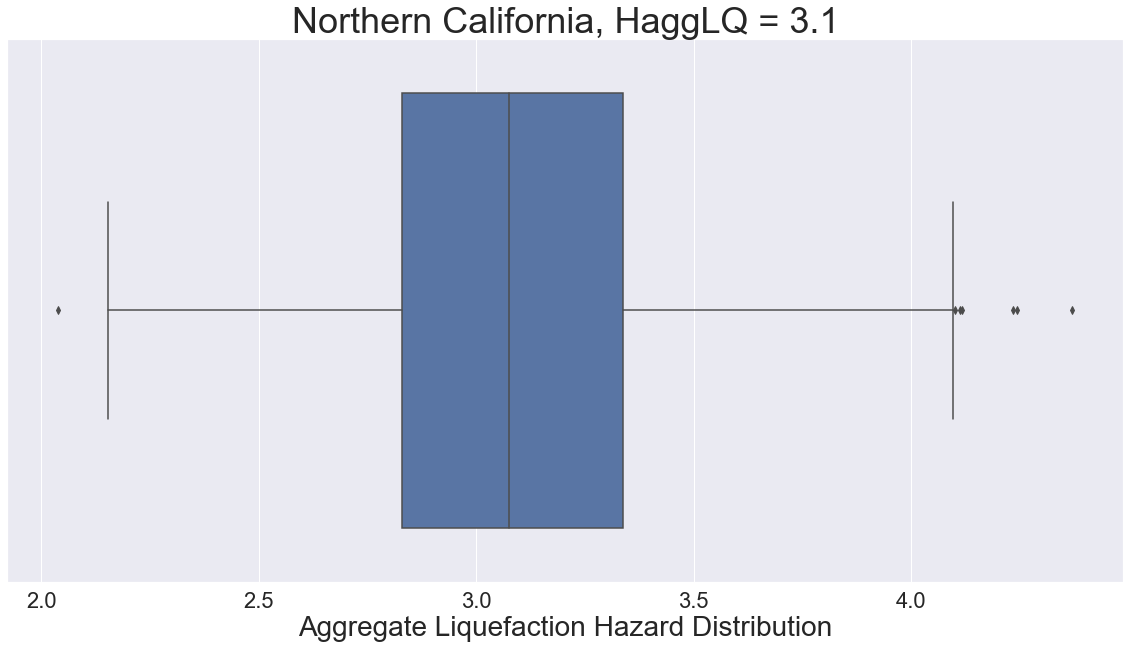

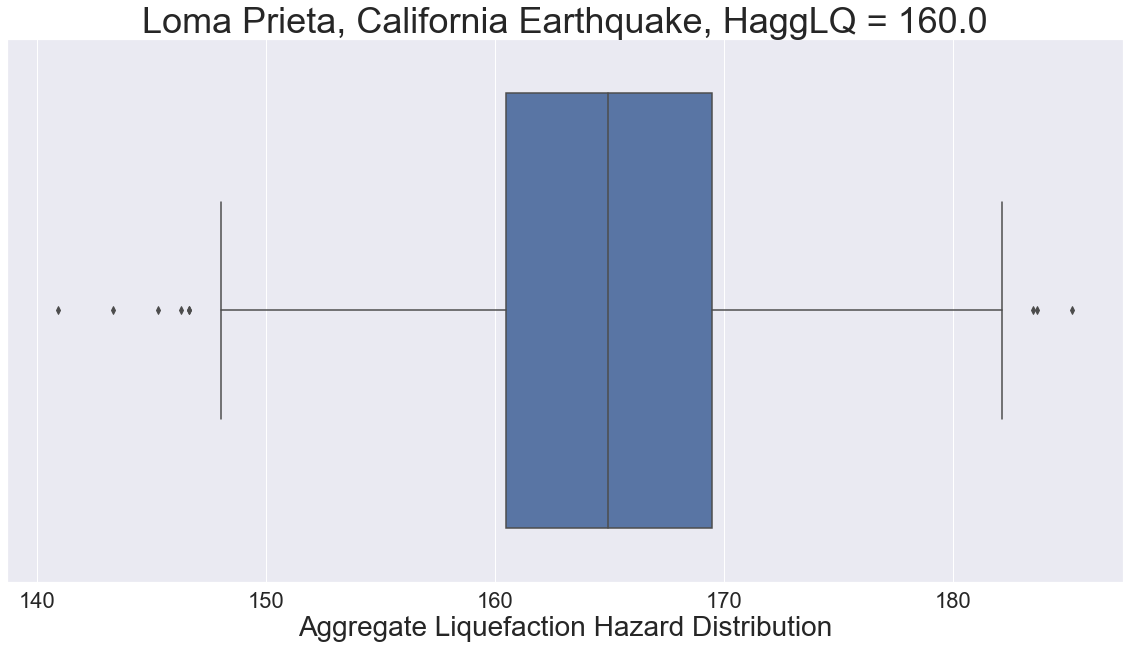

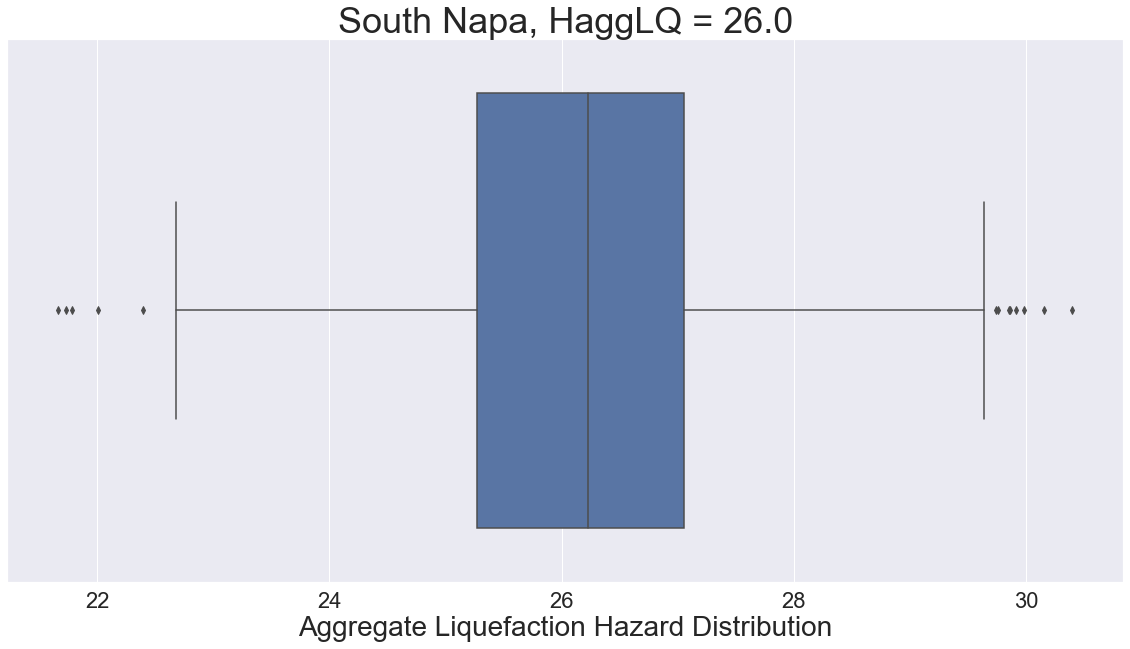

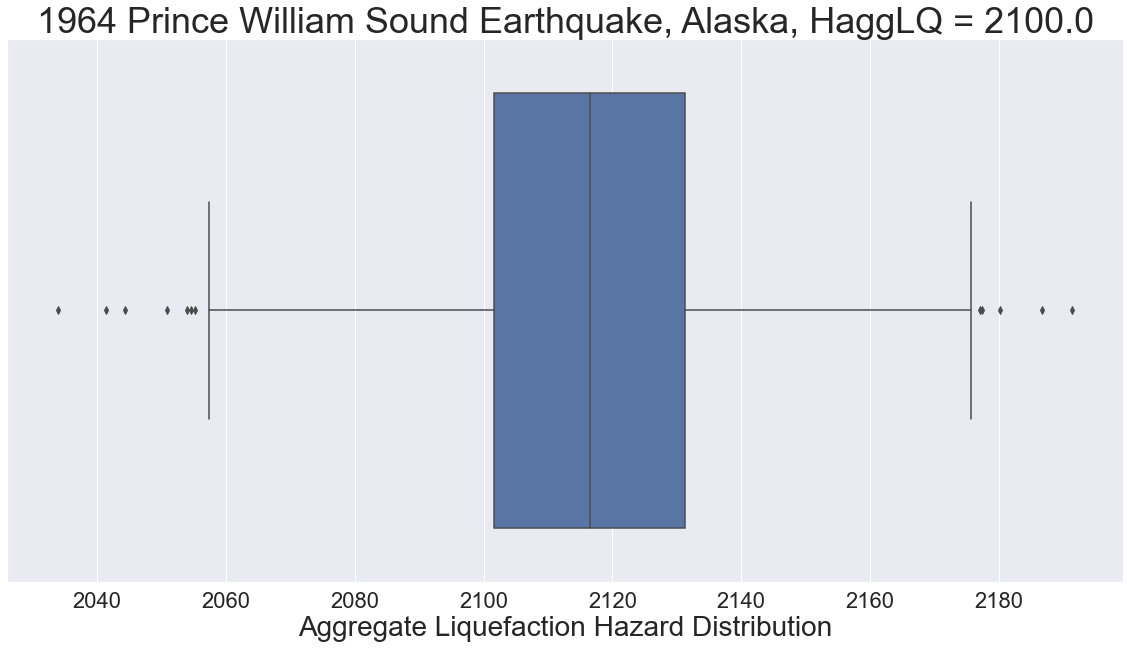

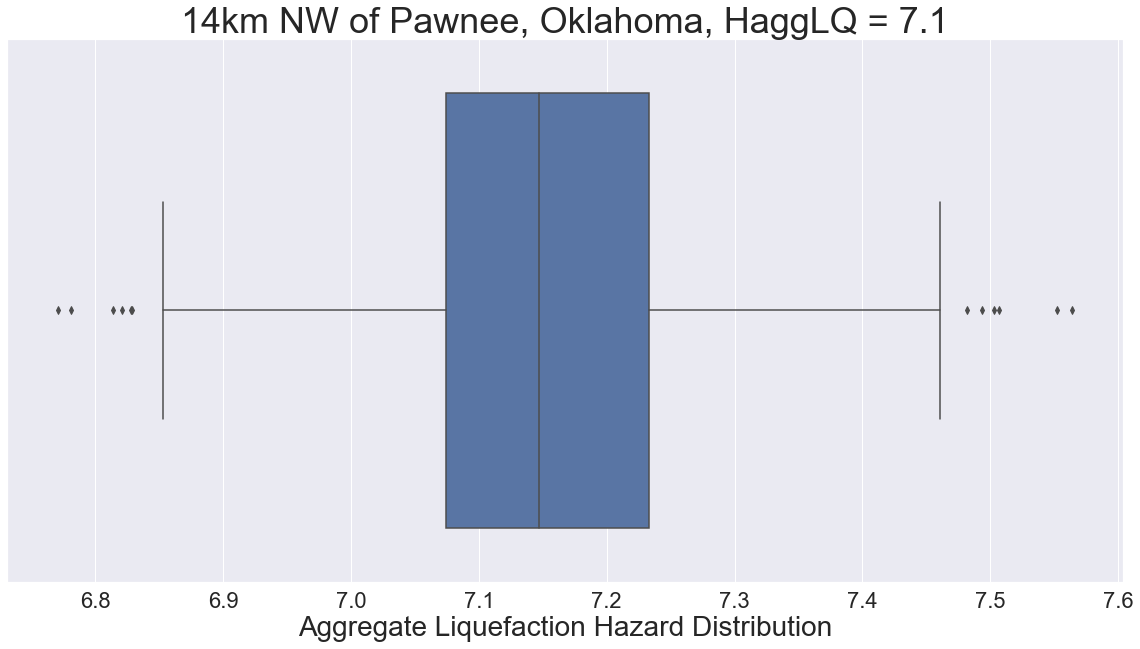

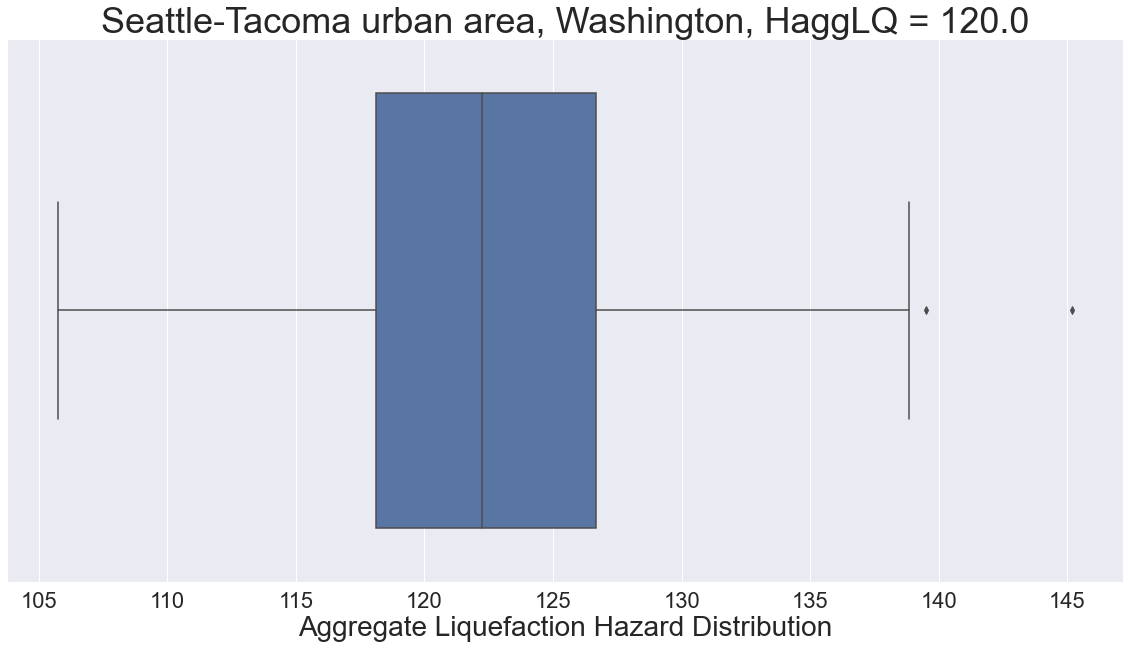

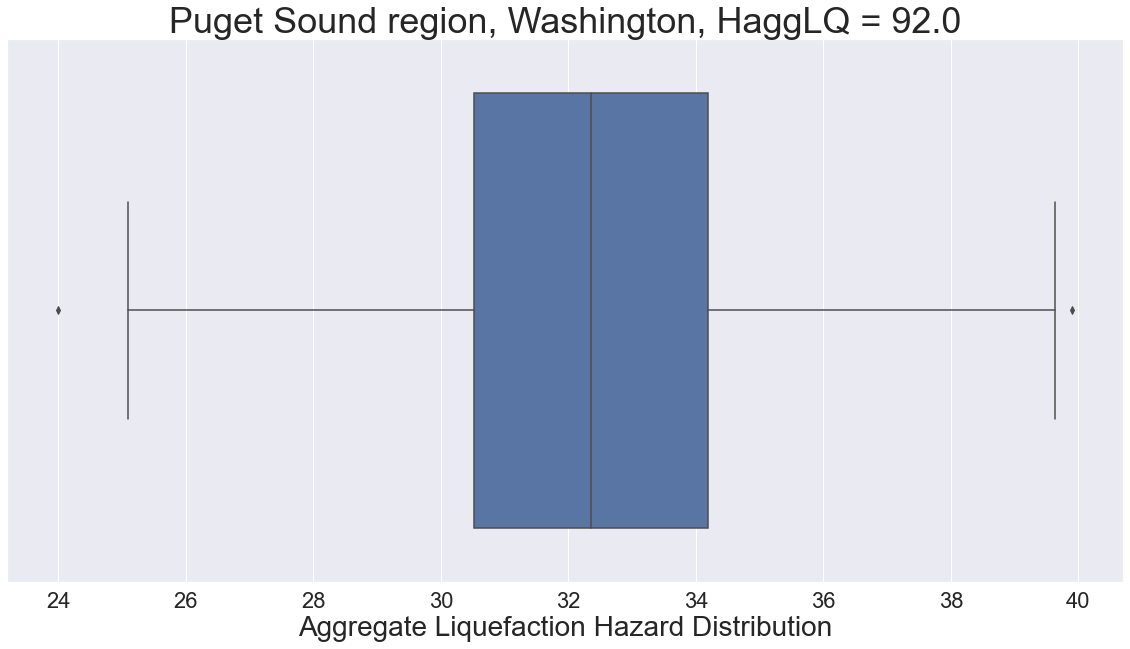

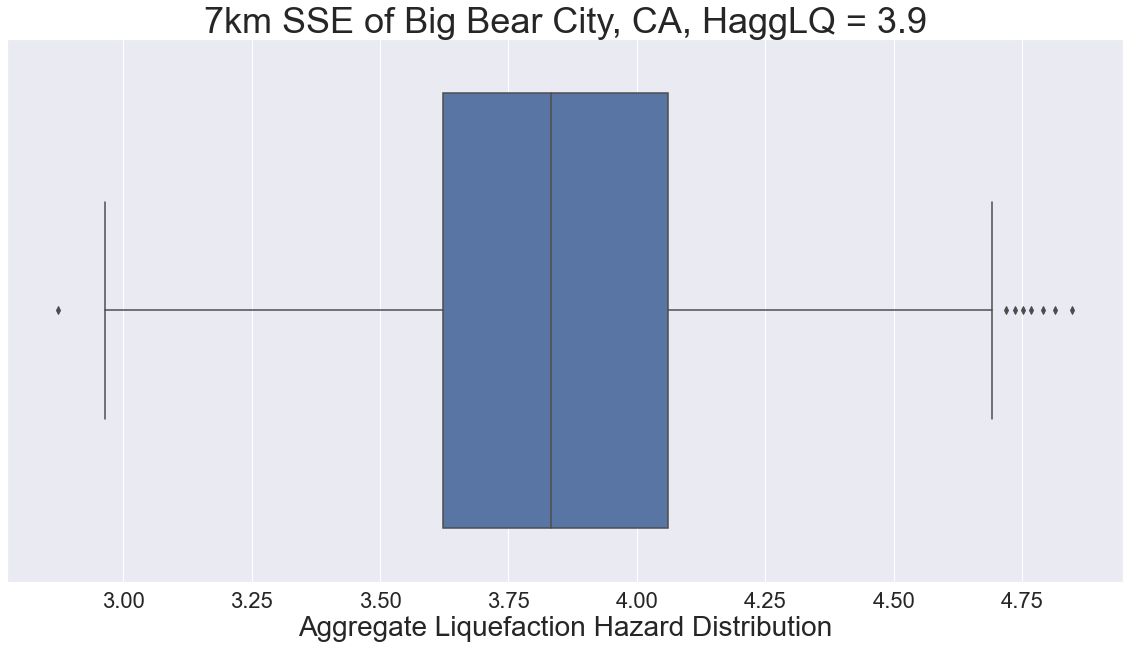

In [26]:
for iii in range(0,df7.shape[0]):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = sns.boxplot(x=df7.iloc[iii,:])
    
    plt.xlabel('Aggregate Liquefaction Hazard Distribution', fontsize=28)
    #lt.ylabel('Aggregate Liquefaction Hazard Mean', fontsize=28)
    plt.title(str(df.iloc[iii,4])+', HaggLQ = '+str(df.iloc[iii,5]), fontsize=36) #etting the title as the location where event occurred

Placing many box and whisker plots on same grid